In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from numpy import mean
from math import sqrt,acos,cos,sin,pi,exp,log,isnan,atan2
from numpy import asarray
from root_pandas import read_root
from matplotlib import gridspec
from scipy import stats,signal
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from textwrap import wrap
import seaborn as sns

from mpl_toolkits.axes_grid1 import make_axes_locatable

import os

from PlottingScripts import CV, Spline, Tune1, distVar, distplot_wratio, StackedHisto, SimpleHisto, mcplot, DrawMatrix

from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

Welcome to JupyROOT 6.22/02


In [2]:
datafolder = '../../rootFiles/1mu1p_selection'
auxfolder = '../aux'
tag = '2021-04-02'
plotfolder = '../outputs/PlotDumpsComb'+tag
covfolder = '../outputs/covMatrixComb'+tag
covtag = 'frac_covar_run3_%s'%tag



RSE  = ['run','subrun','event']

# RUN 3 

In [3]:
run = 'run3'
f_scaleslist = []
s_detsyslist = []
names = ['wiremodX','wiremodYZ','recomb','LYdown','LYAtt','LYRayleigh','SCE','wiremodThetaYZ','wiremodThetaXZ']

for name in names:
    s_detsyslist.append(name)

a_df_sys = []

RSE = ['run','subrun','event']
i=0
for sys in s_detsyslist:
#    print('111')
    df_sys = pd.read_parquet('%s/pickles/%s_%s_%s.parquet'%(datafolder,sys,run,tag))
#    print(df_sys.shape[0])
    i+=1
    a_df_sys.append(df_sys)
    print("total %d, cv = %d dv = %d"%(df_sys.shape[0],df_sys.query("isCV==True").shape[0],df_sys.query("isCV==False").shape[0]))
#    print(df_sys.shape[0])

#df_numu_run3_presel = pd.read_parquet('../../data/pickles/numu_run1_nodupesMay1.parquet')
#print((list(a_df_sys[7])))


total 71256, cv = 58791 dv = 12465
total 71341, cv = 58791 dv = 12550
total 12286, cv = 5919 dv = 6367
total 70231, cv = 58791 dv = 11440
total 70238, cv = 58791 dv = 11447
total 71362, cv = 58791 dv = 12571
total 12061, cv = 5919 dv = 6142
total 70893, cv = 58791 dv = 12102
total 70891, cv = 58791 dv = 12100


In [17]:
# Make big list of variables with their accompanying ranges so we can just dump a buttload of plots
#varlistSel = {}

varListSel = {}
varListSel['Xreco'] = distVar('Xreco',(15,241.25),14,'Reco Vertex X',datafolder+'/'+covfolder+'/'+covtag+'__x_reco.txt')


varListSel['sigprobavg'] = distVar('sigprobavg',(0.5,1.0),5,'BDT Average Score',datafolder+'/'+covfolder+'/'+covtag+'__y_reco.txt')
varListSel['Yreco'] = distVar('Yreco',(-101.5,101.5),14,'Reco Vertex Y',datafolder+'/'+covfolder+'/'+covtag+'__y_reco.txt')
varListSel['Zreco'] = distVar('Zreco',(15,1021.8),14,'Reco Vertex Z',datafolder+'/'+covfolder+'/'+covtag+'__z_reco.txt')
varListSel['OpenAng'] = distVar('OpenAng',(.6,2.8),14,'Opening Angle (rads)',datafolder+'/'+covfolder+'/'+covtag+'__openang_reco.txt')
varListSel['Thetas'] = distVar('Thetas',(0,np.pi),14,r'Sum of Thetas ($\theta_{p} + \theta_{\mu}$) (rads)',datafolder+'/'+covfolder+'/'+covtag+'__sum_thetas_reco.txt')
varListSel['Phis'] = distVar('Phis',(1.5,4),14,r'Difference of Phis ($|\phi_{p} - \phi_{\mu}|$)  (rads)',datafolder+'/'+covfolder+'/'+covtag+'__sum_phis_reco.txt')
varListSel['ChargeNearTrunk'] = distVar('ChargeNearTrunk',(0,600),14,'ADC Charge within 5cm of Reco Vertex',datafolder+'/'+covfolder+'/'+covtag+'__charge_near_trunk_reco.txt')
varListSel['Enu_1m1p'] = distVar('Enu_1m1p',(200,1200),20,'Reconstructed Neutrino Energy (MeV)',datafolder+'/'+covfolder+'/'+covtag+'__nu_energy_reco.txt')
varListSel['PhiT_1m1p'] = distVar('PhiT_1m1p',(0,1),14,r'$\phi_T$',datafolder+'/'+covfolder+'/'+covtag+'__phiT_reco.txt')
varListSel['AlphaT_1m1p'] = distVar('AlphaT_1m1p',(0,np.pi),14,r'$\alpha_T$',datafolder+'/'+covfolder+'/'+covtag+'__alphaT_reco.txt')
varListSel['PT_1m1p'] = distVar('PT_1m1p',(0,320),14,r'$p_T$',datafolder+'/'+covfolder+'/'+covtag+'__pT_reco.txt')
varListSel['PTRat_1m1p'] = distVar('PTRat_1m1p',(0,.4),14,r'$p_T/|p|$',datafolder+'/'+covfolder+'/'+covtag+'__pT_ratio_reco.txt')
varListSel['BjXB_1m1p'] = distVar('BjXB_1m1p',(.2,1.8),14,'Bjorken X*',datafolder+'/'+covfolder+'/'+covtag+'__BjxB_reco.txt')
varListSel['BjYB_1m1p'] = distVar('BjYB_1m1p',(0.05,.75),14,'Bjorken Y*',datafolder+'/'+covfolder+'/'+covtag+'__BjyB_reco.txt')
varListSel['Q2_1m1p'] = distVar('Q2_1m1p',(0,6e5),14,r'$Q^2$',datafolder+'/'+covfolder+'/'+covtag+'__Q2_reco.txt')
varListSel['SphB_1m1p'] = distVar('SphB_1m1p',(0,1000),14,'QE Consistency*',datafolder+'/'+covfolder+'/'+covtag+'__sphB_reco.txt')
varListSel['Q0_1m1p'] = distVar('Q0_1m1p',(70,600),14,r'$Q_0$',datafolder+'/'+covfolder+'/'+covtag+'__Q0_reco.txt')
varListSel['Q3_1m1p'] = distVar('Q3_1m1p',(200,1000),14,r'$Q_3$',datafolder+'/'+covfolder+'/'+covtag+'__Q3_reco.txt')
varListSel['Lepton_PhiReco'] = distVar('Lepton_PhiReco',(-np.pi,np.pi),14,r'Muon $\phi$',datafolder+'/'+covfolder+'/'+covtag+'__lepton_phi_reco.txt')
varListSel['Lepton_ThetaReco'] = distVar('Lepton_ThetaReco',(.2,2.8),14,r'Muon $\theta$',datafolder+'/'+covfolder+'/'+covtag+'__lepton_theta_reco.txt')
varListSel['Lepton_TrackLength'] = distVar('Lepton_TrackLength',(20,200),14,'Muon Track Length (cm)',datafolder+'/'+covfolder+'/'+covtag+'__lepton_length_reco.txt')
varListSel['Muon_Edep'] = distVar('Muon_Edep',(50,600),14,'Reco Muon Energy (from range) (MeV)',datafolder+'/'+covfolder+'/'+covtag+'__lepton_KE_reco.txt')
varListSel['Proton_PhiReco'] = distVar('Proton_PhiReco',(-np.pi,np.pi),14,r'Proton $\phi$',datafolder+'/'+covfolder+'/'+covtag+'__proton_phi_reco.txt')
varListSel['Proton_ThetaReco'] = distVar('Proton_ThetaReco',(0,2),14,r'Proton $\theta$',datafolder+'/'+covfolder+'/'+covtag+'__proton_theta_reco.txt')
varListSel['Proton_TrackLength'] = distVar('Proton_TrackLength',(5,100),14,'Proton Track Length',datafolder+'/'+covfolder+'/'+covtag+'__proton_length_reco.txt')
varListSel['Proton_Edep'] = distVar('Proton_Edep',(50,500),14,'Reco Proton Energy (from range) (MeV)',datafolder+'/'+covfolder+'/'+covtag+'__proton_KE_reco.txt')
varListSel['Proton_CosTheta'] = distVar('Proton_CosTheta',(0,1),14,'Proton Cos Theta',datafolder+'/'+covfolder+'/'+covtag+'__proton_cos_theta_reco.txt')
varListSel['Lepton_CosTheta'] = distVar('Lepton_CosTheta',(-1,1),14,'Muon Cos Theta',datafolder+'/'+covfolder+'/'+covtag+'__lepton_cos_theta_reco.txt')
varListSel['MPID_eminus'] = distVar('MPID_eminus',(0,1),14,'Eminus MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_eminus_score.txt')
varListSel['MPID_muon'] = distVar('MPID_muon',(0,1),14,'Muon MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_muon_score.txt')
varListSel['MPID_proton'] = distVar('MPID_proton',(0,1),14,'Proton MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_proton_score.txt')
varListSel['MPID_gamma'] = distVar('MPID_gamma',(0,1),14,'Gamma MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_gamma_score.txt')
varListSel['MPID_pion'] = distVar('MPID_pion',(0,1),14,'Pion MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_pion_score.txt')




# Build Covariance Matrices!

In [5]:
# define cuts
Ecut = 'Enu_1m1p > 200 and Enu_1m1p<=1200'
precuts = 'PassPrecuts1m1p==1'
bdtcuts = ' sigprobavg > .5'
morecuts = 'Proton_CosTheta > 0'
bonuscuts = '(MPID_proton > .9 or Enu_1m1p > 400)'
#bdtcuts = 'bdt_run3_cosmic < .5 and bdt_run3_nu < .5'
s_cuts = bonuscuts + ' and ' + Ecut + ' and ' +  bdtcuts + ' and ' +  morecuts + ' and ' +  'isCV ==False'
s_cuts_cv = bonuscuts + ' and '+ Ecut + ' and ' +  bdtcuts + ' and ' +  morecuts + ' and ' +  'isCV ==True' 



In [6]:
#Bring in the required modules
from scipy import *
from scipy import signal
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from scipy.fftpack import fft, fftfreq
from scipy.signal import lfilter
import scipy.signal
from scipy.optimize import leastsq
import pandas as pd
import scipy.stats as stats
import matplotlib.mlab as mlab
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.utils.fixes import parse_version
from random import random




def smooth(cv_list,dv_list,xmin,xmax,dv_name,cv_weights=1,dv_weights=1,ratio=1,nbin=20):
    
#----------------------------------------------------------------
# This section is the CV
    ext_bin=10
    cv = np.array(cv_list)
    dv = np.array(dv_list)
    cv_w = np.array(cv_weights+0.00000001)
    dv_w = np.array(dv_weights+0.00000001)

    if (cv_w.size==1 or dv_w.size==1):
        cv_w = np.ones(cv.size)
        dv_w = np.ones(dv.size)
    elif (cv.size != cv_w.size or dv.size != dv_w.size):
        print('##############     ERROR weights and lists are not matching sizes ####################')
        return(0,0)
    
             
# throw away the data points outside of the hist limits to fake the real data
#    mask1 = np.logical_and(cv >= xmin, cv <= xmax)
#    cv = cv[mask1]
        
    cv_hist, binedges = np.histogram(cv, bins = nbin, range = (xmin, xmax),weights=cv_w)
    cv_hist= cv_hist+0.000001 # assure no zero bins    


#-------------------------------------------------------------------------------
# look for spikes at edges and remove them.  Smoothing cannot handle these.
    
    # flags for bin drops
    drop0=False
    dropn=False
    
    # throw away the first bin if needed
    # do this if the change is more than 80%
    print('cv[0] =  %f    cv[1] = %f  rat = %f'%(cv[0],cv[1],cv[0]/(cv[0]+cv[1])))

    if ((cv_hist[0]/(cv_hist[0]+cv_hist[1]))>0.80):
        drop0=True

    if ((cv_hist[nbin-1]/(cv_hist[nbin-2]+cv_hist[nbin-1]))>0.80):
        dropn=True


    # throw away the firstand/or last bin if needed
        
    if (drop0):    
        mask1 = np.logical_and(cv >= binedges[1], cv <= xmax)
        cv = cv[mask1]
        cv_w = cv_w[mask1]
        print('----------------------------drop0_cv')
        
    if (dropn):
        mask1 = np.logical_and(cv >= xmin, cv <=  binedges[nbin-1])
        cv = cv[mask1]
        cv_w = cv_w[mask1]

        print('dropn_cv')
    
        
    #-------------------------------------------------------------------------------
# CV smoothing, calculate the bandwidth for use throughout
        
        
# calculate Sheather/Jones bandwidth
    bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
    print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
    print(cv_hist)
    # This smoothing library wants 2d so pad it out
    cv2d=cv [:, np.newaxis]

    
    myrange = (lambda edges: (edges[:-1] + edges[1:])/2.0)(np.linspace(xmin,xmax,(ext_bin*nbin)+1))
    range2d=myrange [:, np.newaxis]
#    print(myrange)

#----------------------------------------------------------------
# This section is the detvar

#
# Create Fake data np.histograms,aiming for about 4000 events in the np.histogram
#
    # This smoothing library wants 2d so pad it out
    dv_hist, binedges = np.histogram(dv, bins = nbin, range = (xmin, xmax),weights=dv_w)
    dv_hist= ratio*dv_hist+0.000001 # assure no zero bins    

    # throw away the firstand/or last bin if needed
        
    if (drop0):    
        mask1 = np.logical_and(dv >= binedges[1], dv <= xmax)
        print('dv length = %d and dv_w length =%d'%(dv.size,dv_w.size))
        dv = dv[mask1]
        print('-----------------------------------drop0_dv')
        print('dv length = %d and dv_w length =%d'%(dv.size,dv_w.size))
        dv_w = dv_w[mask1]
        print('dv length = %d and dv_w length =%d'%(dv.size,dv_w.size))

        
    if (dropn):
        mask1 = np.logical_and(dv >= xmin, dv <=  binedges[nbin-1])
        dv = dv[mask1]
        print('dropn_dv')
        dv_w = dv_w[mask1]

    dv2d=dv [:, np.newaxis]

#----------------------------------------------------------------
# Smooth both CV AND DV, Fix up the edge bins.
         
    #get the CV smoothed case and normalize it

    gkdeCV= KernelDensity(kernel='epanechnikov', bandwidth=bwid).fit(cv2d,sample_weight=cv_w)
    mykdeCV = np.exp(gkdeCV.score_samples(range2d))
    yhatCV=np.zeros(ext_bin*nbin)
#    yhatCV=(mykdeCV)*(cv.shape[0])/sum(mykdeCV)
    yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)

    
    
    
    
    #get the DV smoothed case and normalize it
    gkdeDV= KernelDensity(kernel='epanechnikov', bandwidth=bwid).fit(dv2d,sample_weight=dv_w)
    
    mykdeDV = np.exp(gkdeDV.score_samples(range2d))

    yhatDV=np.zeros(ext_bin*nbin)
#    yhatDV=(mykdeDV)*dv.shape[0]/sum(mykdeDV)
    yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)
    
    # rebin the ratio into the bins we will use by summing the bin...
    smoothrat=np.zeros(nbin)
    smoothCV=np.zeros(nbin)
    smoothDV=np.zeros(nbin)

    k=0
    
    for j in range(nbin):
        ratvalCV=0.
        ratvalDV=0.
        for n in range(ext_bin):
            ratvalCV+=yhatCV[k]
            ratvalDV+=yhatDV[k]
            k+=1
        if ratvalCV==0:
            smoothrat[j]=1
        else:
            smoothrat[j]=ratvalDV/ratvalCV
        smoothCV[j]=ratvalCV
        smoothDV[j]=ratvalDV

    # put the first and/or last bin back if needed
    if (drop0):
        smoothrat[0]=dv_hist[0]/cv_hist[0]
        smoothCV[0]=cv_hist[0]
        smoothDV[0]=dv_hist[0]

    if (dropn):
        smoothrat[nbin-1]=dv_hist[nbin-1]/cv_hist[nbin-1]

    
    offset = (xmax - xmin )/(2*nbin)
    x= np.linspace(xmin+offset,xmax-offset,nbin)
    
    plt.plot(x, cv_hist, linewidth=1, linestyle="-", c="b",label='cv')  # smooth by filter
    plt.plot(x, dv_hist, linewidth=1, linestyle="-", c="g",label='dv')  # smooth by filter

    plt.plot(x, smoothCV, linewidth=1, linestyle="--", c="b",label='cv_smooth')  # smooth by filter

    plt.plot(x, smoothDV, linewidth=1, linestyle="--", c="g",label='dv_smooth')  # smooth by filter
    plt.legend()
    plt.title('%s %s'%(dist.mylabel,dv_name))
    plt.savefig(plotfolder_tmp+'/detsys_%s_%s_%s_full_hists.png'%(dist.myname, run,dv_name),dpi=120,bbox_inches='tight')
    
    plt.show()
    if(dv_hist[0]==0.000001):
        dv_hist[0]=0
    plt.plot(x, dv_hist/cv_hist, linewidth=1, linestyle="-", c="b",label='original')  # smooth by filter
    plt.plot(x,smoothrat , linewidth=1, linestyle="-", c="m",label='smoothed')  # smooth by filter
    plt.legend()
    plt.title('%s %s ratio'%(dist.mylabel,dv_name))

    plt.savefig(plotfolder_tmp+'/detsys_%s_%s_%s_ratio.png'%(dist.myname, run,dv_name),dpi=120,bbox_inches='tight')

    plt.show()

    
    return(smoothCV,smoothDV)



In [7]:
# define cuts
bdtscore=5
Ecut = 'Enu_1m1p > 200 and Enu_1m1p<=1200'
precuts = 'PassPrecuts1m1p==1'
bdtcuts = ' sigprobavg > .%s'%bdtscore
morecuts = 'Proton_CosTheta > 0'
bonuscuts = '(MPID_proton > .9 or Enu_1m1p > 400)'
#bdtcuts = 'bdt_run3_cosmic < .5 and bdt_run3_nu < .5'
s_cuts = bonuscuts + ' and ' + Ecut + ' and ' +  bdtcuts + ' and ' +  morecuts + ' and ' +  'isCV ==False'
s_cuts_cv = bonuscuts + ' and '+ Ecut + ' and ' +  bdtcuts + ' and ' +  morecuts + ' and ' +  'isCV ==True' 



In [13]:
run = 'run3'
f_scaleslist = []
s_detsyslist = []
names = ['wiremodX','wiremodYZ','recomb','LYdown','LYAtt','SCE','wiremodThetaYZ','wiremodThetaXZ','LYRayleigh']
#names = ['wiremodThetaXZ']

for name in names:
    s_detsyslist.append(name)

a_df_sys = []

RSE = ['run','subrun','event']
i=0
for sys in s_detsyslist:
#    print('111')
    df_sys = pd.read_parquet('%s/pickles/%s_%s_%s.parquet'%(datafolder,sys,run,tag))
#    print(df_sys.shape[0])
    i+=1
    a_df_sys.append(df_sys)
    print("total %d, cv = %d dv = %d"%(df_sys.shape[0],df_sys.query("isCV==True").shape[0],df_sys.query("isCV==False").shape[0]))
#    print(df_sys.shape[0])

#df_numu_run3_presel = pd.read_parquet('../../data/pickles/numu_run1_nodupesMay1.parquet')
#print((list(a_df_sys[7])))


total 71256, cv = 58791 dv = 12465
total 71341, cv = 58791 dv = 12550
total 12286, cv = 5919 dv = 6367
total 70231, cv = 58791 dv = 11440
total 70238, cv = 58791 dv = 11447
total 12061, cv = 5919 dv = 6142
total 70893, cv = 58791 dv = 12102
total 70891, cv = 58791 dv = 12100
total 71362, cv = 58791 dv = 12571


9
0
cv = 4796  and dv = 7090
cv POT = 898773223801000034304.000000 dv POT = 1309153192370000101376.000000
---------------------> CV entries = 4796.000000  and dv entries = 7090.000000


<ipython-input-14-460e79ebb1c6>:66: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))


cv[0] =  400.276123    cv[1] = 1013.727722  rat = 0.283080
bwid = 182.611783 xmax-xmin=1000.000000  sum_cv = 5816.775087
[1.00000000e-06 4.17338815e+01 2.08125317e+02 3.28230789e+02
 5.13549325e+02 4.10790571e+02 5.37653889e+02 5.78517937e+02
 5.19049080e+02 4.48160923e+02 3.85687316e+02 3.73949184e+02
 3.27095085e+02 2.87261209e+02 2.47728790e+02 1.61709012e+02
 1.54455869e+02 1.04581472e+02 9.95524972e+01 8.89429395e+01]


<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


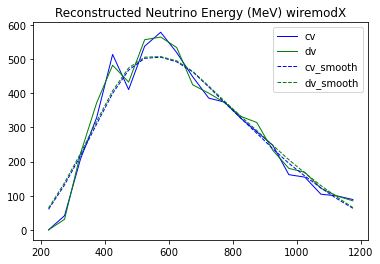

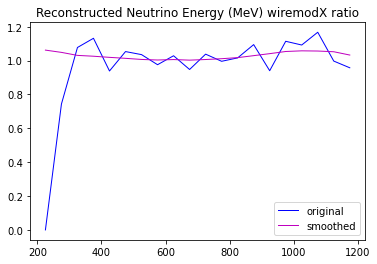

--------------------------  Hi There --------------------
5816.775019183393
5816.775087143396
5928.564524596883
5928.56459327188
Enu_1m1p [3.82792647e-03 2.35018283e-03 9.43705763e-04 6.64904542e-04
 3.64581032e-04 1.77527885e-04 4.53785326e-05 1.19420400e-05
 3.70330849e-05 6.84335600e-06 4.00929230e-05 1.23613000e-04
 3.05496924e-04 8.49933709e-04 1.67854560e-03 2.88382287e-03
 3.31713894e-03 3.18452701e-03 2.73046748e-03 1.07122514e-03]
Enu_1m1p [0.00000000e+00 6.58404196e-02 5.98454069e-03 1.73507360e-02
 3.77275633e-03 2.83529671e-03 1.24341539e-03 5.91319638e-04
 8.15401800e-04 2.76877118e-03 1.44875767e-03 1.74179302e-05
 2.53704001e-04 8.91397839e-03 3.58220807e-03 1.29943367e-02
 8.45946751e-03 2.80209976e-02 8.36699704e-06 1.80671031e-03]


<ipython-input-14-460e79ebb1c6>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-14-460e79ebb1c6>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-14-460e79ebb1c6>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-14-460e79ebb1c6>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


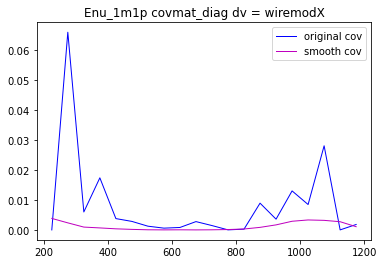

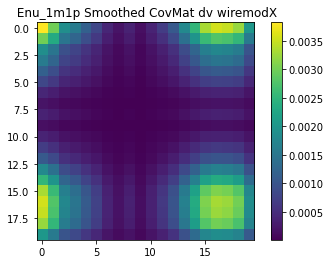

1
cv = 4796  and dv = 7113
cv POT = 898773223801000034304.000000 dv POT = 1310970606080000000000.000000
---------------------> CV entries = 4796.000000  and dv entries = 7113.000000
cv[0] =  400.276123    cv[1] = 1013.727722  rat = 0.283080
bwid = 182.611783 xmax-xmin=1000.000000  sum_cv = 5816.775087
[1.00000000e-06 4.17338815e+01 2.08125317e+02 3.28230789e+02
 5.13549325e+02 4.10790571e+02 5.37653889e+02 5.78517937e+02
 5.19049080e+02 4.48160923e+02 3.85687316e+02 3.73949184e+02
 3.27095085e+02 2.87261209e+02 2.47728790e+02 1.61709012e+02
 1.54455869e+02 1.04581472e+02 9.95524972e+01 8.89429395e+01]


<ipython-input-14-460e79ebb1c6>:66: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

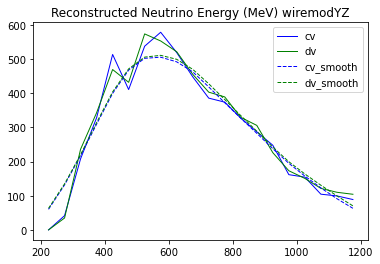

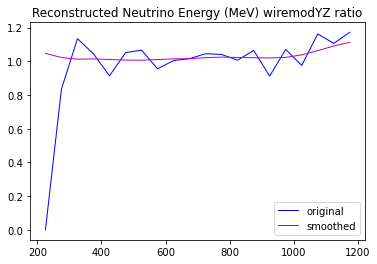

--------------------------  Hi There --------------------
5816.775019183393
5816.775087143396
5932.782778972336
5932.782847737537
Enu_1m1p [2.22330193e-03 5.32683354e-04 1.64379262e-04 2.15068173e-04
 1.23011772e-04 5.69434137e-05 4.98911395e-05 1.14543721e-04
 2.26758083e-04 2.51778801e-04 4.86902151e-04 6.32880933e-04
 5.39247618e-04 4.72942656e-04 4.07627179e-04 5.52843416e-04
 1.50419577e-03 4.04643354e-03 8.30342658e-03 1.27639381e-02]
Enu_1m1p [0.00000000e+00 2.71110069e-02 1.81566802e-02 2.00832832e-03
 7.39668528e-03 2.65843069e-03 4.47987139e-03 1.94808417e-03
 2.24251646e-05 2.70370028e-04 2.05688257e-03 1.66943838e-03
 4.88861151e-05 4.21747468e-03 7.64157609e-03 5.02936163e-03
 5.76141458e-04 2.65094533e-02 1.13760974e-02 2.98589362e-02]


<ipython-input-14-460e79ebb1c6>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-14-460e79ebb1c6>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-14-460e79ebb1c6>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-14-460e79ebb1c6>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


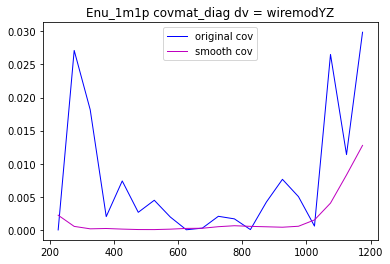

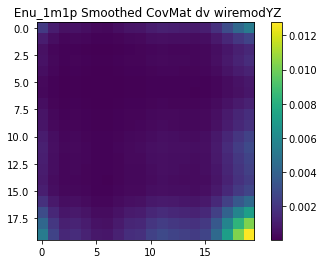

2
cv = 3446  and dv = 3728
cv POT = 579534847420999991296.000000 dv POT = 637062455184000024576.000000
---------------------> CV entries = 3446.000000  and dv entries = 3728.000000
cv[0] =  840.759705    cv[1] = 897.438660  rat = 0.483696
bwid = 193.211647 xmax-xmin=1000.000000  sum_cv = 3918.778630
[1.00000000e-06 3.50007471e+01 1.54002447e+02 2.28083263e+02
 3.29261166e+02 3.30672159e+02 3.63242833e+02 3.46812456e+02
 3.61281682e+02 3.23070993e+02 2.65983068e+02 2.63778637e+02
 2.17115660e+02 1.76464373e+02 1.47913103e+02 1.15719551e+02
 9.10498331e+01 6.92351152e+01 4.78763360e+01 5.22152042e+01]


<ipython-input-14-460e79ebb1c6>:66: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

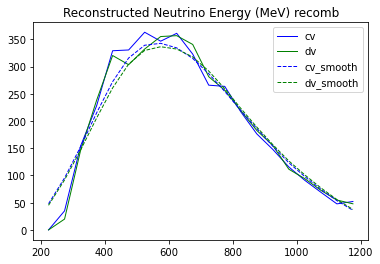

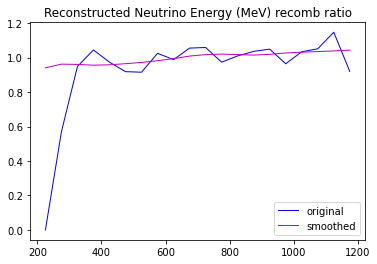

--------------------------  Hi There --------------------
3918.778575316424
3918.7786297764264
3890.5307605490143
3890.5308144625824
Enu_1m1p [3.56143178e-03 1.46404843e-03 1.58799611e-03 1.96031457e-03
 1.77199865e-03 1.26700518e-03 7.94444737e-04 3.34991977e-04
 4.04445344e-05 7.45701085e-05 2.91059031e-04 3.97006062e-04
 2.95525312e-04 2.00954278e-04 3.54874002e-04 7.04980900e-04
 9.80252004e-04 1.21020072e-03 1.47380099e-03 1.86337507e-03]
Enu_1m1p [0.00000000e+00 1.85387588e-01 2.62461510e-03 1.94000802e-03
 7.13845033e-04 6.69910852e-03 7.21599147e-03 6.06255660e-04
 1.42657009e-04 3.01406869e-03 3.40971353e-03 7.07960786e-04
 9.26572050e-05 1.29386783e-03 2.39392673e-03 1.30048626e-03
 1.12349442e-03 2.60176294e-03 2.15686515e-02 6.48699010e-03]


<ipython-input-14-460e79ebb1c6>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-14-460e79ebb1c6>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-14-460e79ebb1c6>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-14-460e79ebb1c6>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


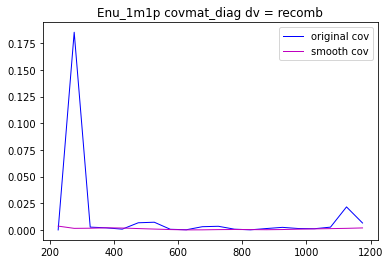

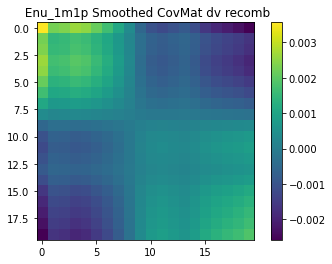

3
cv = 4796  and dv = 6515
cv POT = 898773223801000034304.000000 dv POT = 1218083168320000098304.000000
---------------------> CV entries = 4796.000000  and dv entries = 6515.000000
cv[0] =  400.276123    cv[1] = 1013.727722  rat = 0.283080
bwid = 182.611783 xmax-xmin=1000.000000  sum_cv = 5816.775087
[1.00000000e-06 4.17338815e+01 2.08125317e+02 3.28230789e+02
 5.13549325e+02 4.10790571e+02 5.37653889e+02 5.78517937e+02
 5.19049080e+02 4.48160923e+02 3.85687316e+02 3.73949184e+02
 3.27095085e+02 2.87261209e+02 2.47728790e+02 1.61709012e+02
 1.54455869e+02 1.04581472e+02 9.95524972e+01 8.89429395e+01]


<ipython-input-14-460e79ebb1c6>:66: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

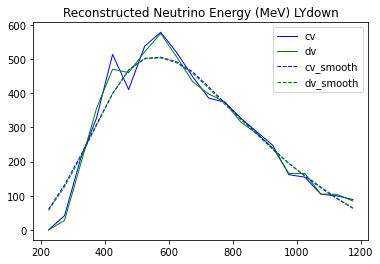

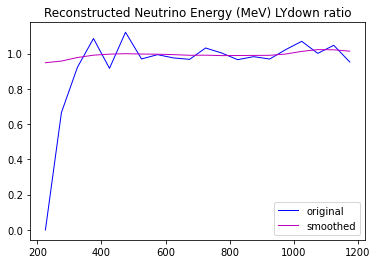

--------------------------  Hi There --------------------
5816.775019183393
5816.775087143396
5777.563742729364
5777.563810800861
Enu_1m1p [2.69345566e-03 1.81409402e-03 5.03802017e-04 8.54241906e-05
 1.10152303e-05 5.80422695e-07 7.32416525e-06 1.42526534e-05
 3.69170378e-05 9.78597602e-05 8.34811721e-05 1.36719441e-04
 1.22651917e-04 1.13605130e-04 9.97952965e-05 6.96708376e-06
 1.48651642e-04 5.04074048e-04 4.48396099e-04 1.88114920e-04]
Enu_1m1p [0.00000000e+00 1.11842438e-01 5.99827085e-03 7.26454929e-03
 7.04599523e-03 1.45969472e-02 9.35803758e-04 3.94121062e-05
 6.16658697e-04 1.08371832e-03 9.94863392e-04 1.03821024e-05
 1.20294092e-03 3.10235291e-04 9.66601201e-04 4.97729651e-04
 4.79715390e-03 1.27372812e-06 2.18588635e-03 2.28770324e-03]


<ipython-input-14-460e79ebb1c6>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-14-460e79ebb1c6>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-14-460e79ebb1c6>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-14-460e79ebb1c6>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


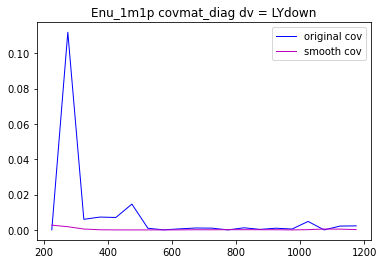

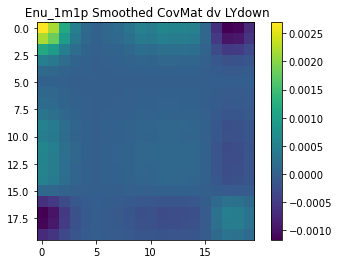

4
cv = 4796  and dv = 6518
cv POT = 898773223801000034304.000000 dv POT = 1212833087030000091136.000000
---------------------> CV entries = 4796.000000  and dv entries = 6518.000000
cv[0] =  400.276123    cv[1] = 1013.727722  rat = 0.283080
bwid = 182.611783 xmax-xmin=1000.000000  sum_cv = 5816.775087
[1.00000000e-06 4.17338815e+01 2.08125317e+02 3.28230789e+02
 5.13549325e+02 4.10790571e+02 5.37653889e+02 5.78517937e+02
 5.19049080e+02 4.48160923e+02 3.85687316e+02 3.73949184e+02
 3.27095085e+02 2.87261209e+02 2.47728790e+02 1.61709012e+02
 1.54455869e+02 1.04581472e+02 9.95524972e+01 8.89429395e+01]


<ipython-input-14-460e79ebb1c6>:66: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

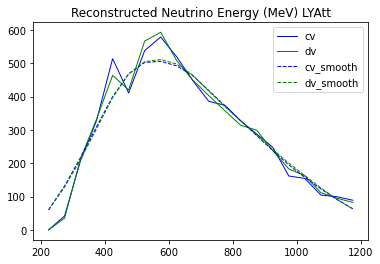

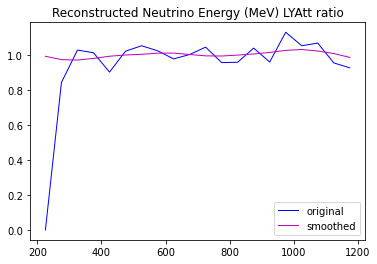

--------------------------  Hi There --------------------
5816.775019183393
5816.775087143396
5827.255245822585
5827.255314124404
Enu_1m1p [4.86041882e-05 6.79644364e-04 8.11360137e-04 3.62487205e-04
 4.58189122e-05 1.08438670e-07 1.75529193e-05 1.19910068e-04
 1.26378066e-04 1.05028726e-05 2.06522341e-05 3.03752884e-05
 2.40842208e-08 3.76316799e-05 2.23543750e-04 7.12771038e-04
 1.01090707e-03 5.38149948e-04 7.57706062e-05 1.79437596e-04]
Enu_1m1p [0.00000000e+00 2.46482081e-02 8.06534190e-04 1.75632721e-04
 9.49809883e-03 4.83215256e-04 2.83579625e-03 6.08793235e-04
 4.77351826e-04 7.94955378e-06 2.05537243e-03 1.86122927e-03
 1.69787310e-03 1.58536672e-03 1.59843643e-03 1.70204390e-02
 2.86041552e-03 4.68124168e-03 2.01109270e-03 5.33119960e-03]


<ipython-input-14-460e79ebb1c6>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-14-460e79ebb1c6>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-14-460e79ebb1c6>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-14-460e79ebb1c6>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


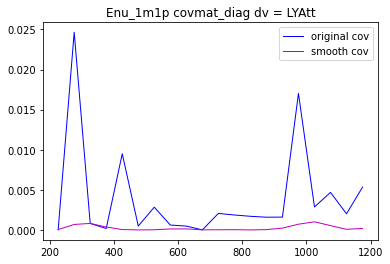

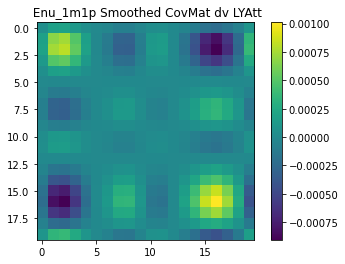

5
cv = 3446  and dv = 3593
cv POT = 579534847420999991296.000000 dv POT = 589862945463999987712.000000
---------------------> CV entries = 3446.000000  and dv entries = 3593.000000
cv[0] =  840.759705    cv[1] = 897.438660  rat = 0.483696
bwid = 193.211647 xmax-xmin=1000.000000  sum_cv = 3918.778630
[1.00000000e-06 3.50007471e+01 1.54002447e+02 2.28083263e+02
 3.29261166e+02 3.30672159e+02 3.63242833e+02 3.46812456e+02
 3.61281682e+02 3.23070993e+02 2.65983068e+02 2.63778637e+02
 2.17115660e+02 1.76464373e+02 1.47913103e+02 1.15719551e+02
 9.10498331e+01 6.92351152e+01 4.78763360e+01 5.22152042e+01]


<ipython-input-14-460e79ebb1c6>:66: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

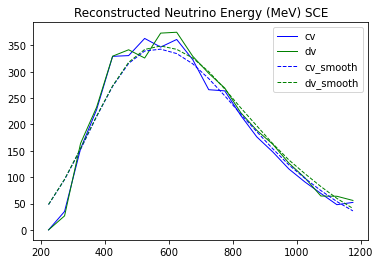

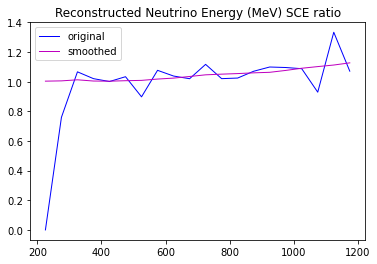

--------------------------  Hi There --------------------
3918.7785753164235
3918.7786297764274
4048.584897096435
4048.584952397326
Enu_1m1p [1.19461141e-05 2.87525495e-05 1.57055232e-04 1.82676072e-05
 1.03771488e-05 4.21901111e-05 7.52612757e-05 3.10699646e-04
 5.77326671e-04 1.21669370e-03 2.12985050e-03 2.56974465e-03
 2.97273773e-03 3.54518751e-03 3.98277117e-03 5.74617173e-03
 8.18509053e-03 1.03406404e-02 1.25957542e-02 1.60912528e-02]
Enu_1m1p [0.00000000e+00 5.77781818e-02 4.39112951e-03 4.12707720e-04
 8.63723385e-07 1.12008021e-03 1.04611400e-02 5.85535671e-03
 1.43960521e-03 3.94260957e-04 1.36234306e-02 4.14252728e-04
 5.94224455e-04 4.93672329e-03 9.77756922e-03 9.11533877e-03
 7.65350213e-03 5.01866731e-03 1.11131617e-01 5.01880951e-03]


<ipython-input-14-460e79ebb1c6>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-14-460e79ebb1c6>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-14-460e79ebb1c6>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-14-460e79ebb1c6>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


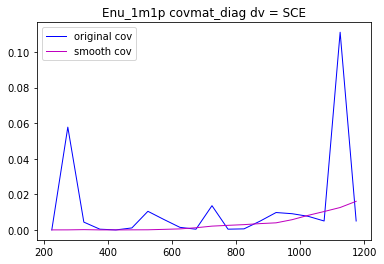

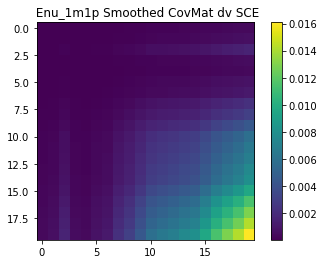

6
cv = 4796  and dv = 6885
cv POT = 898773223801000034304.000000 dv POT = 1264027045189999919104.000000
---------------------> CV entries = 4796.000000  and dv entries = 6885.000000
cv[0] =  400.276123    cv[1] = 1013.727722  rat = 0.283080
bwid = 182.611783 xmax-xmin=1000.000000  sum_cv = 5816.775087
[1.00000000e-06 4.17338815e+01 2.08125317e+02 3.28230789e+02
 5.13549325e+02 4.10790571e+02 5.37653889e+02 5.78517937e+02
 5.19049080e+02 4.48160923e+02 3.85687316e+02 3.73949184e+02
 3.27095085e+02 2.87261209e+02 2.47728790e+02 1.61709012e+02
 1.54455869e+02 1.04581472e+02 9.95524972e+01 8.89429395e+01]


<ipython-input-14-460e79ebb1c6>:66: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

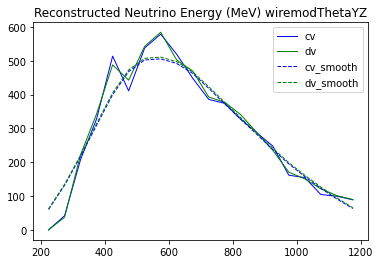

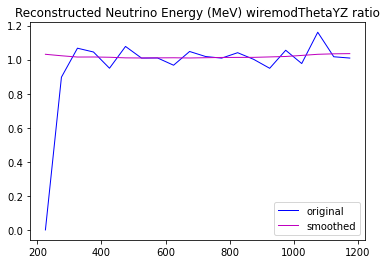

--------------------------  Hi There --------------------
5816.775019183393
5816.775087143396
5897.895686186869
5897.895755141947
Enu_1m1p [9.80069374e-04 5.13148776e-04 2.29598997e-04 2.38562839e-04
 1.93070894e-04 1.06598984e-04 9.38783159e-05 1.06117330e-04
 1.18293912e-04 9.38634845e-05 1.26277661e-04 1.60967994e-04
 1.69803021e-04 1.77213000e-04 2.50764840e-04 3.40175871e-04
 6.09368728e-04 9.75457242e-04 1.16276354e-03 1.24321918e-03]
Enu_1m1p [0.00000000e+00 1.06276373e-02 4.49769025e-03 2.00293683e-03
 2.55134455e-03 5.98303446e-03 8.17472705e-05 9.44101490e-05
 1.08115296e-03 2.28261820e-03 3.32196250e-04 7.75263723e-05
 1.65172738e-03 2.64851126e-06 2.59110206e-03 3.02587585e-03
 5.31065229e-04 2.58472468e-02 2.82009689e-04 8.47541677e-05]


<ipython-input-14-460e79ebb1c6>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-14-460e79ebb1c6>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-14-460e79ebb1c6>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-14-460e79ebb1c6>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


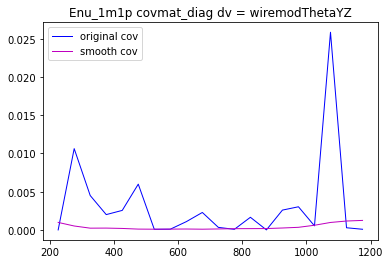

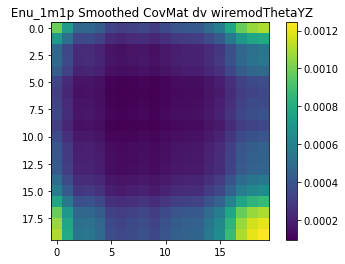

7
cv = 4796  and dv = 6945
cv POT = 898773223801000034304.000000 dv POT = 1296977725840000024576.000000


<ipython-input-14-460e79ebb1c6>:66: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))


---------------------> CV entries = 4796.000000  and dv entries = 6945.000000
cv[0] =  400.276123    cv[1] = 1013.727722  rat = 0.283080
bwid = 182.611783 xmax-xmin=1000.000000  sum_cv = 5816.775087
[1.00000000e-06 4.17338815e+01 2.08125317e+02 3.28230789e+02
 5.13549325e+02 4.10790571e+02 5.37653889e+02 5.78517937e+02
 5.19049080e+02 4.48160923e+02 3.85687316e+02 3.73949184e+02
 3.27095085e+02 2.87261209e+02 2.47728790e+02 1.61709012e+02
 1.54455869e+02 1.04581472e+02 9.95524972e+01 8.89429395e+01]


<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


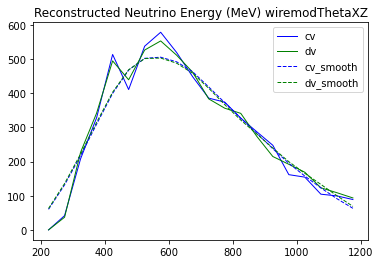

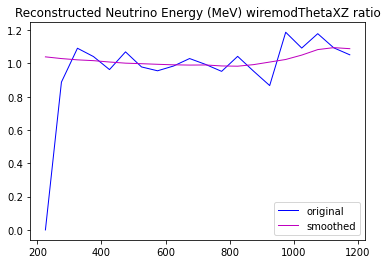

--------------------------  Hi There --------------------
5816.775019183393
5816.775087143396
5848.17287457793
5848.172942705052
Enu_1m1p [1.57656779e-03 8.65616353e-04 4.70272472e-04 2.86312517e-04
 7.61434090e-05 3.44317711e-06 1.94101098e-06 2.52173558e-05
 6.58426405e-05 9.40957188e-05 8.10702534e-05 2.21983818e-04
 2.68967474e-04 4.80355399e-05 7.17691364e-05 5.74437810e-04
 2.52928721e-03 6.94417578e-03 9.04628528e-03 7.89444563e-03]
Enu_1m1p [0.00000000e+00 1.25417334e-02 8.37181137e-03 1.71771402e-03
 1.35307938e-03 4.86210088e-03 4.35267473e-04 1.93597005e-03
 2.32341231e-04 8.75786272e-04 3.36136383e-05 2.25058740e-03
 1.82452488e-03 2.18400981e-03 1.76255374e-02 3.51828367e-02
 8.56214217e-03 3.20290492e-02 8.80843288e-03 2.70581679e-03]


<ipython-input-14-460e79ebb1c6>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-14-460e79ebb1c6>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-14-460e79ebb1c6>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-14-460e79ebb1c6>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


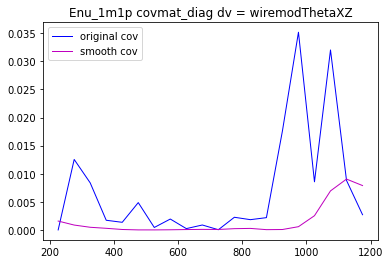

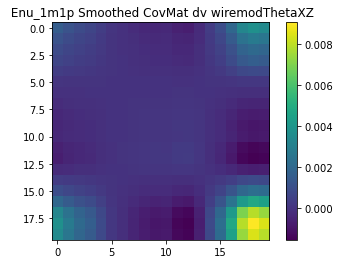

8
cv = 4796  and dv = 7138
cv POT = 898773223801000034304.000000 dv POT = 1308303170610000035840.000000
---------------------> CV entries = 4796.000000  and dv entries = 7138.000000
cv[0] =  400.276123    cv[1] = 1013.727722  rat = 0.283080
bwid = 182.611783 xmax-xmin=1000.000000  sum_cv = 5816.775087
[1.00000000e-06 4.17338815e+01 2.08125317e+02 3.28230789e+02
 5.13549325e+02 4.10790571e+02 5.37653889e+02 5.78517937e+02
 5.19049080e+02 4.48160923e+02 3.85687316e+02 3.73949184e+02
 3.27095085e+02 2.87261209e+02 2.47728790e+02 1.61709012e+02
 1.54455869e+02 1.04581472e+02 9.95524972e+01 8.89429395e+01]


<ipython-input-14-460e79ebb1c6>:66: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV

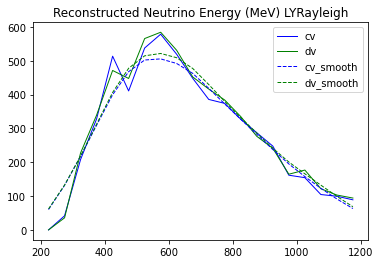

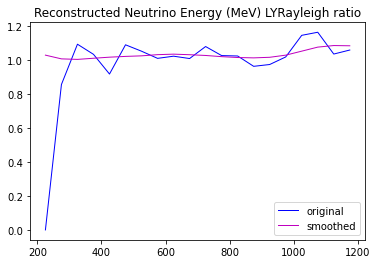

--------------------------  Hi There --------------------
5816.775019183393
5816.775087143396
5967.834338187138
5967.834407223508
Enu_1m1p [8.35654294e-04 4.79781984e-05 1.50955882e-05 1.11101973e-04
 2.85857382e-04 4.59968683e-04 6.13508329e-04 1.00470177e-03
 1.20356728e-03 9.87090686e-04 7.26304049e-04 4.00889150e-04
 2.24130780e-04 1.64246594e-04 2.62737772e-04 8.30792043e-04
 2.74132899e-03 5.79009958e-03 7.28762734e-03 7.05696304e-03]
Enu_1m1p [0.00000000e+00 2.06898242e-02 8.68984960e-03 1.13213357e-03
 6.78074948e-03 8.05595524e-03 2.71101750e-03 9.89619357e-05
 5.14650334e-04 7.94020493e-05 6.32910219e-03 6.91780170e-04
 5.73024273e-04 1.36596365e-03 6.91051735e-04 3.32397823e-04
 2.11686275e-02 2.67885765e-02 1.24607885e-03 3.47751277e-03]


<ipython-input-14-460e79ebb1c6>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-14-460e79ebb1c6>:85: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-14-460e79ebb1c6>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-14-460e79ebb1c6>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


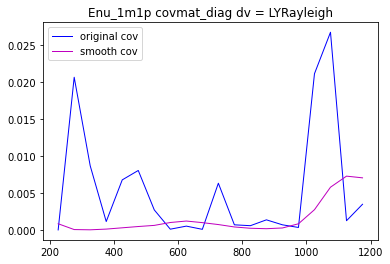

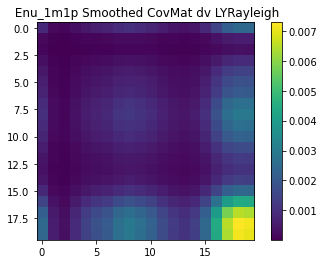

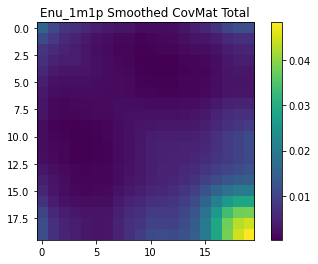

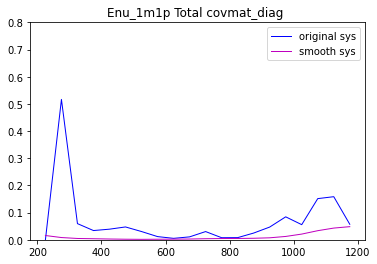

In [14]:
tag = '2021-04-02'
nbins = 20

if not os.path.exists(plotfolder):
    os.makedirs(plotfolder)
if not os.path.exists(covfolder):
    os.makedirs(covfolder)

histOut = '/home/itran/SLAC_Work/ML/covmat_studies/HistsForCov/numu/%s/mu0%d'%(tag,bdtscore)
if not os.path.exists(histOut):
    os.makedirs(histOut)

#for dist in varListSel: #[9:10]
#for _,dist in varListSel.items(): # loop over all variables 
#    var = dist.myname

#for i in range():
for var in (['Enu_1m1p']):#,'Q3_1m1p','Q0_1m1p','Q2_1m1p']):
    plotfolder_tmp = plotfolder+'/'+var
    if not os.path.exists(plotfolder_tmp):
        os.makedirs(plotfolder_tmp)
    
    covfolder_tmp = covfolder+'/'+var
    if not os.path.exists(covfolder_tmp):
        os.makedirs(covfolder_tmp)
#    dist = varListSel['Enu_1m1p']
    
    dist = varListSel[var]
    nbins = dist.nbins

    cov = np.zeros((nbins,nbins))
    cov_smooth = np.zeros((nbins,nbins))


    print(len(a_df_sys))
    for sysi in range(len(a_df_sys)): # loop over all detvars
#    for sysi in range(1):
#        sysi = 3
#        myvardf = a_df_sys[sysi].query('Enu_1m1p > 0 and Enu_1m1p_cv > 0')
        print(sysi)
        myvardf = a_df_sys[sysi].query('Enu_1m1p > 0')
        
        var_sys = myvardf.query(s_cuts)[dist.myname]
        var_cv = myvardf.query(s_cuts_cv)[dist.myname]
        print('cv = %d  and dv = %d'%(var_cv.shape[0],var_sys.shape[0]))

        pot_cv=myvardf.query("isCV==True").iloc[0]["POT"]
        pot_dv=myvardf.query("isCV==False").iloc[0]["POT"]
        print("cv POT = %f dv POT = %f"%(pot_cv,pot_dv))

        
        # get cv and detvar lists and apply weights
        var_cv_list = np.array(var_cv.astype(float).values.tolist())
        var_sys_list = np.array(var_sys.astype(float).values.tolist())
        cv_weights = np.array(myvardf.query(s_cuts_cv)['xsec_corr_weight'].astype(float).values.tolist())
        dv_weights = np.array(myvardf.query(s_cuts)['xsec_corr_weight'].astype(float).values.tolist())
        ratio = pot_cv / pot_dv

#        var_cv_list = var_cv_list * cv_weights 

#        var_sys_list = var_sys_list * sys_weights 
        
        
        hCV,binedges = np.histogram(var_cv_list,bins=nbins,range=dist.myrange)
        h0,_ = np.histogram(var_sys_list,bins=nbins,range=dist.myrange)#cv_scale)
        print('---------------------> CV entries = %f  and dv entries = %f'%(sum(hCV),sum(h0)))
        CV_smooth,DV_smooth = smooth(var_cv_list,var_sys_list,dist.myrange[0],dist.myrange[1],names[sysi],cv_weights=cv_weights,dv_weights=dv_weights,nbin=nbins,ratio=ratio)
        #CV_smooth,DV_smooth = smooth(var_cv_list,var_sys_list,dist.myrange[0],dist.myrange[1],names[sysi],cv_weights=1,dv_weights=1,nbin=nbins,ratio=ratio)
        np.save('%s/1Dhist_Enu_1m1p_run3_%s_CV_smooth.npy'%(histOut,names[sysi]), CV_smooth)
        np.save('%s/1Dhist_Enu_1m1p_run3_%s_DV_smooth.npy'%(histOut,names[sysi]), DV_smooth)


        
#        print(cv_weights)
        hCV,binedges = np.histogram(var_cv_list,bins=nbins,range=dist.myrange,weights= cv_weights)#cv_scale)
        h0,_ = np.histogram(var_sys_list,bins=nbins,range=dist.myrange,weights=dv_weights)#cv_scale)
        bincenters = np.diff(binedges)/2 + binedges[:-1] 
        h0 = h0 *ratio
        np.save('%s/1Dhist_Enu_1m1p_run3_%s_CV_reg.npy'%(histOut,names[sysi]), hCV)
        np.save('%s/1Dhist_Enu_1m1p_run3_%s_DV_reg.npy'%(histOut,names[sysi]),h0)
        
        
        print('--------------------------  Hi There --------------------')
        print(sum(hCV))
        print(sum(CV_smooth))
        print(sum(h0))
        print(sum(DV_smooth))
    

        cov_tmp = np.zeros((nbins,nbins))
        cov_smooth_tmp = np.zeros((nbins,nbins))            
        for i in range(nbins):
            for j in range(nbins):
                if (hCV[i]*hCV[j])<1e-5:
                    cov_tmp[i][j]=0
                else:
    #               print('%d,%d'%(h0[i],hCV[j]))
                    cov_tmp[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(hCV[i]*hCV[j])
    #               print('result is: %d*%d/%d'%(h0[i]-hCV[i],h0[j]-hCV[j],hCV[i]*hCV[j]))
    #    print(dist.myname,cov.diagonal())
        for i in range(nbins):
            for j in range(nbins):
                if (CV_smooth[i]*CV_smooth[j])<1e-5:
                    cov_smooth_tmp[i][j]=0
                else:
    #               print('%d,%d'%(h0[i],hCV[j]))
                    cov_smooth_tmp[i][j] += (DV_smooth[i]-CV_smooth[i])*(DV_smooth[j]-CV_smooth[j])/(CV_smooth[i]*CV_smooth[j])
    #               print('result is: %d*%d/%d'%(h0[i]-hCV[i],h0[j]-hCV[j],hCV[i]*hCV[j]))
        print(dist.myname,cov_smooth_tmp.diagonal())
        print(dist.myname,cov_tmp.diagonal())
        
        offset = (dist.myrange[1] - dist.myrange[0] )/(2*nbins)
        x= np.linspace(dist.myrange[0]+offset,dist.myrange[1]-offset,nbins)
        
        plt.plot(x,cov_tmp.diagonal(),linewidth=1, linestyle="-", c="b",label='original cov')
        plt.plot(x,cov_smooth_tmp.diagonal(),linewidth=1, linestyle="-", c="m",label='smooth cov')
        plt.legend()
        plt.title('%s covmat_diag dv = %s'%(dist.myname,names[sysi]))
        plt.savefig(plotfolder_tmp+'/detsys_%s_%s_%s_cov_diag.png'%(dist.myname, run,names[sysi]),dpi=120,bbox_inches='tight')
        
        plt.show()
        
        plt.imshow(cov_smooth_tmp, interpolation='none')
        plt.colorbar(orientation='vertical')
        plt.title(' %s Smoothed CovMat dv %s'%(dist.myname,names[sysi]))

        plt.savefig(plotfolder_tmp+'/detsys_%s_%s_%s_cov.png'%(dist.myname, run,names[sysi]), dpi=120,bbox_inches='tight')
        plt.show()

        cov = cov+ cov_tmp
        cov_smooth = cov_smooth + cov_smooth_tmp
        np.savetxt(covfolder_tmp+'/detsys_%s_%s_%s_cov.csv'%(dist.myname, run,names[sysi]),cov_smooth_tmp, delimiter=',')
        np.savetxt(covfolder_tmp+'/CV_smooth_%s_%s_%s_cov.csv'%(dist.myname, run,names[sysi]),CV_smooth, delimiter=',')
        np.savetxt(covfolder_tmp+'/DV_smooth_%s_%s_%s_cov.csv'%(dist.myname, run,names[sysi]),DV_smooth, delimiter=',')

    plt.imshow(cov_smooth, interpolation='none')
    plt.colorbar(orientation='vertical')
    plt.title('%s Smoothed CovMat Total'%dist.myname)

    plt.savefig(plotfolder_tmp+'/detsys_%s_%s_cov.png'%(dist.myname, run),dpi=120,bbox_inches='tight')

    plt.show()
    np.savetxt(covfolder_tmp+'/detsys_%s_%s_cov.csv'%(dist.myname, run),cov_smooth, delimiter=',')
    

    
    plt.plot(x,cov.diagonal(),linewidth=1, linestyle="-", c="b",label='original sys')
    plt.plot(x,cov_smooth.diagonal(),linewidth=1, linestyle="-", c="m",label='smooth sys')
    plt.legend()
    plt.ylim([0,0.8])
    plt.title('%s Total covmat_diag '%dist.myname)
    plt.savefig(plotfolder_tmp+'/Tot_sys_%s_%s_diag.png'%(dist.myname,run),dpi=120,bbox_inches='tight')
    plt.show()


[0.06664059 0.03048728 0.00940441 0.00352994 0.00271378 0.00287624
 0.00302329 0.0031952  0.0027538  0.00243731 0.00273801 0.00415321
 0.00572506 0.00765063 0.01073149 0.01816791 0.02779047 0.0410838
 0.04732678 0.04233229]


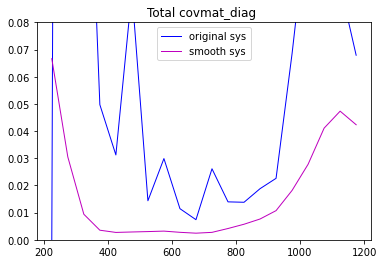

In [32]:
plt.plot(x,cov.diagonal(),linewidth=1, linestyle="-", c="b",label='original sys')
plt.plot(x,cov_smooth.diagonal(),linewidth=1, linestyle="-", c="m",label='smooth sys')
plt.legend()
plt.ylim([0,0.08])
plt.title('Total covmat_diag ')
print(cov_smooth.diagonal())

# Run 1

In [11]:
run = 'run1'
f_scaleslist = []
s_detsyslist = []
names = ['wiremodX','wiremodYZ','recomb','LYdown','SCE','wiremodThetaYZ','wiremodThetaXZ']#,'LYRayleigh']

for name in names:
    s_detsyslist.append(name)

#df_cv = pd.read_parquet('../../data/pickles/detsys_CV_run3_nodupesMay1.parquet')
#scaleCV = 9.65858292241e+19 

a_df_sys = []

i=0
for sys in s_detsyslist:
#    print('111')
    df_sys = pd.read_parquet('%s/pickles/%s_%s_%s.parquet'%(datafolder,sys,run,tag))
    print(df_sys.shape[0])
    i+=1
    a_df_sys.append(df_sys)
    print("total %d, cv = %d dv = %d"%(df_sys.shape[0],df_sys.query("isCV==True").shape[0],df_sys.query("isCV==False").shape[0]))
#    print(df_sys.shape[0])


#####################################################
# For now add the run3 LYR###########################
#####################################################


names.append('LYRayleigh')
df_sys = pd.read_parquet('%s/pickles/LYRayleigh_run3_%s.parquet'%(datafolder,tag))

a_df_sys.append(df_sys)
print("total %d, cv = %d dv = %d"%(df_sys.shape[0],df_sys.query("isCV==True").shape[0],df_sys.query("isCV==False").shape[0]))

#df_numu_run3_presel = pd.read_parquet('../../data/pickles/numu_run1_nodupesMay1.parquet')
#print((list(a_df_sys[7])))


71256
total 71256, cv = 58791 dv = 12465
71341
total 71341, cv = 58791 dv = 12550
13548
total 13548, cv = 6823 dv = 6725
13344
total 13344, cv = 6823 dv = 6521
13973
total 13973, cv = 6823 dv = 7150
70893
total 70893, cv = 58791 dv = 12102
70891
total 70891, cv = 58791 dv = 12100
total 71362, cv = 58791 dv = 12571


8
0
cv = 4796  and dv = 7090
cv POT = 898773223801000034304.000000 dv POT = 1309153192370000101376.000000
cv[0] =  400.276123    cv[1] = 1013.727722  rat = 0.283080
bwid = 182.611783 xmax-xmin=1000.000000  sum_cv = 5816.775087
[1.00000000e-06 4.17338815e+01 2.08125317e+02 3.28230789e+02
 5.13549325e+02 4.10790571e+02 5.37653889e+02 5.78517937e+02
 5.19049080e+02 4.48160923e+02 3.85687316e+02 3.73949184e+02
 3.27095085e+02 2.87261209e+02 2.47728790e+02 1.61709012e+02
 1.54455869e+02 1.04581472e+02 9.95524972e+01 8.89429395e+01]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


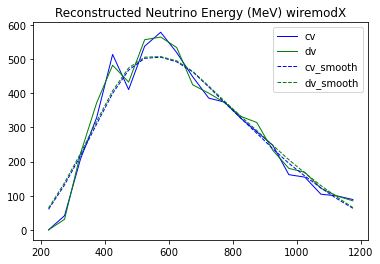

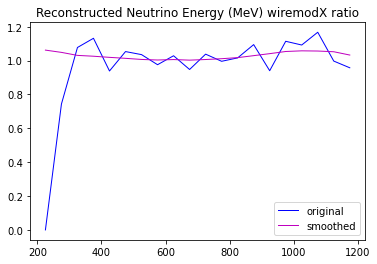

--------------------------  Hi There --------------------
5816.775019183393
5816.775087143396
5928.564524596883
5928.56459327188
Enu_1m1p [3.82792647e-03 2.35018283e-03 9.43705763e-04 6.64904542e-04
 3.64581032e-04 1.77527885e-04 4.53785326e-05 1.19420400e-05
 3.70330849e-05 6.84335600e-06 4.00929230e-05 1.23613000e-04
 3.05496924e-04 8.49933709e-04 1.67854560e-03 2.88382287e-03
 3.31713894e-03 3.18452701e-03 2.73046748e-03 1.07122514e-03]
Enu_1m1p [0.00000000e+00 6.58404196e-02 5.98454069e-03 1.73507360e-02
 3.77275633e-03 2.83529671e-03 1.24341539e-03 5.91319638e-04
 8.15401800e-04 2.76877118e-03 1.44875767e-03 1.74179302e-05
 2.53704001e-04 8.91397839e-03 3.58220807e-03 1.29943367e-02
 8.45946751e-03 2.80209976e-02 8.36699704e-06 1.80671031e-03]


<ipython-input-12-aca5db941506>:81: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-12-aca5db941506>:82: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-12-aca5db941506>:83: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-12-aca5db941506>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


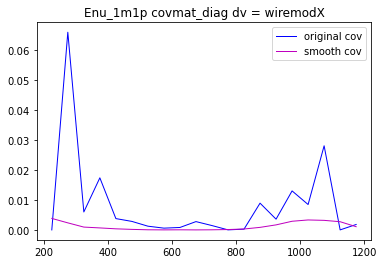

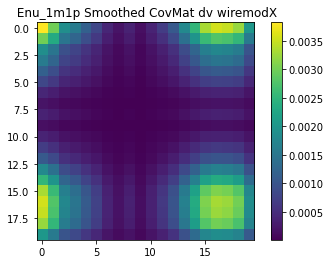

1
cv = 4796  and dv = 7113
cv POT = 898773223801000034304.000000 dv POT = 1310970606080000000000.000000
cv[0] =  400.276123    cv[1] = 1013.727722  rat = 0.283080
bwid = 182.611783 xmax-xmin=1000.000000  sum_cv = 5816.775087
[1.00000000e-06 4.17338815e+01 2.08125317e+02 3.28230789e+02
 5.13549325e+02 4.10790571e+02 5.37653889e+02 5.78517937e+02
 5.19049080e+02 4.48160923e+02 3.85687316e+02 3.73949184e+02
 3.27095085e+02 2.87261209e+02 2.47728790e+02 1.61709012e+02
 1.54455869e+02 1.04581472e+02 9.95524972e+01 8.89429395e+01]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


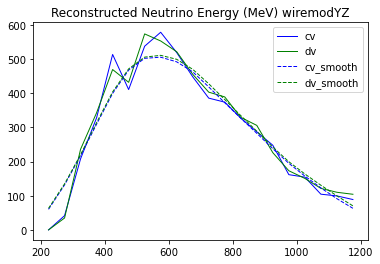

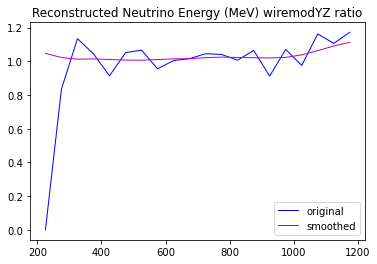

--------------------------  Hi There --------------------
5816.775019183393
5816.775087143396
5932.782778972336
5932.782847737537
Enu_1m1p [2.22330193e-03 5.32683354e-04 1.64379262e-04 2.15068173e-04
 1.23011772e-04 5.69434137e-05 4.98911395e-05 1.14543721e-04
 2.26758083e-04 2.51778801e-04 4.86902151e-04 6.32880933e-04
 5.39247618e-04 4.72942656e-04 4.07627179e-04 5.52843416e-04
 1.50419577e-03 4.04643354e-03 8.30342658e-03 1.27639381e-02]
Enu_1m1p [0.00000000e+00 2.71110069e-02 1.81566802e-02 2.00832832e-03
 7.39668528e-03 2.65843069e-03 4.47987139e-03 1.94808417e-03
 2.24251646e-05 2.70370028e-04 2.05688257e-03 1.66943838e-03
 4.88861151e-05 4.21747468e-03 7.64157609e-03 5.02936163e-03
 5.76141458e-04 2.65094533e-02 1.13760974e-02 2.98589362e-02]


<ipython-input-12-aca5db941506>:81: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-12-aca5db941506>:82: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-12-aca5db941506>:83: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-12-aca5db941506>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


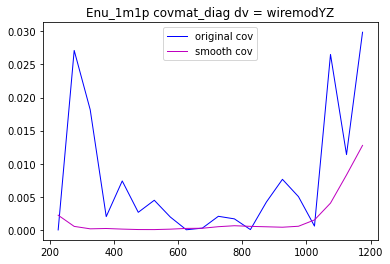

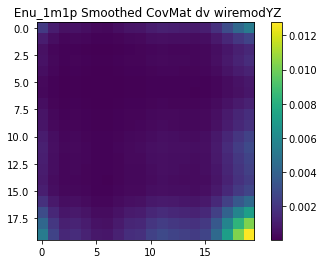

2
cv = 3194  and dv = 3131
cv POT = 609362734189999947776.000000 dv POT = 627484668519000047616.000000
cv[0] =  903.975952    cv[1] = 579.812805  rat = 0.609235
bwid = 195.239637 xmax-xmin=1000.000000  sum_cv = 3642.569950
[1.00000000e-06 1.50689805e+01 1.34878416e+02 2.17964458e+02
 2.06607300e+02 2.72276832e+02 2.94684394e+02 3.18960229e+02
 3.58976095e+02 3.26323573e+02 3.03411727e+02 2.77026582e+02
 2.15139149e+02 1.54184555e+02 1.62480936e+02 9.42184834e+01
 8.56149555e+01 7.79958717e+01 7.18062954e+01 5.49511144e+01]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


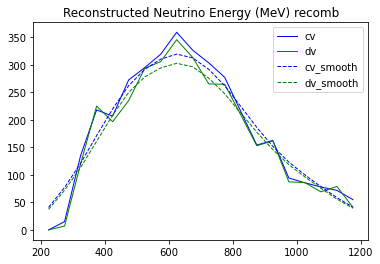

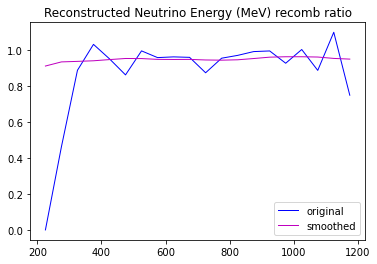

--------------------------  Hi There --------------------
3642.5698977319535
3642.5699496719544
3456.1049832519225
3456.1050336576814
Enu_1m1p [0.007863   0.00431269 0.00394305 0.00353374 0.00278734 0.00217919
 0.00222333 0.00266479 0.00271731 0.00268181 0.00301906 0.00314162
 0.00291052 0.00220296 0.0015472  0.00137183 0.00137091 0.00149212
 0.00214328 0.00251601]
Enu_1m1p [0.00000000e+00 2.88683509e-01 1.26050900e-02 1.01260184e-03
 2.36956250e-03 1.90129739e-02 1.93539059e-05 1.74421595e-03
 1.42564304e-03 1.62919534e-03 1.59083347e-02 2.03276543e-03
 8.65742829e-04 6.92477237e-05 2.26931232e-05 5.33621480e-03
 1.05276221e-05 1.27379028e-02 9.84777278e-03 6.29715490e-02]


<ipython-input-12-aca5db941506>:81: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-12-aca5db941506>:82: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-12-aca5db941506>:83: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-12-aca5db941506>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


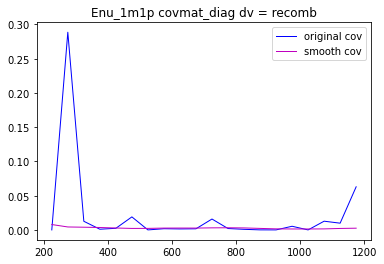

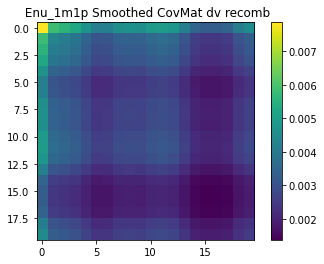

3
cv = 3194  and dv = 3056
cv POT = 609362734189999947776.000000 dv POT = 594452048285999955968.000000
cv[0] =  903.975952    cv[1] = 579.812805  rat = 0.609235
bwid = 195.239637 xmax-xmin=1000.000000  sum_cv = 3642.569950
[1.00000000e-06 1.50689805e+01 1.34878416e+02 2.17964458e+02
 2.06607300e+02 2.72276832e+02 2.94684394e+02 3.18960229e+02
 3.58976095e+02 3.26323573e+02 3.03411727e+02 2.77026582e+02
 2.15139149e+02 1.54184555e+02 1.62480936e+02 9.42184834e+01
 8.56149555e+01 7.79958717e+01 7.18062954e+01 5.49511144e+01]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


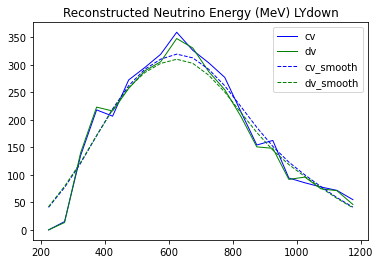

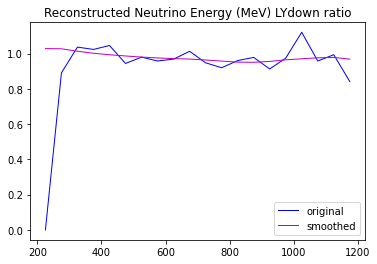

--------------------------  Hi There --------------------
3642.5698977319535
3642.5699496719544
3548.7245017415216
3548.724553068061
Enu_1m1p [7.70369868e-04 7.18913084e-04 1.70483207e-04 2.02810118e-06
 4.90741010e-05 1.95192356e-04 4.06017463e-04 6.26687604e-04
 8.49204332e-04 9.87779070e-04 1.34791490e-03 1.85388807e-03
 2.38293966e-03 2.46938241e-03 2.01907177e-03 1.27797781e-03
 8.86441059e-04 5.97474773e-04 4.86720431e-04 1.01624190e-03]
Enu_1m1p [0.00000000e+00 1.20047041e-02 1.32276820e-03 5.34622756e-04
 2.06133315e-03 3.18292693e-03 4.20833733e-04 1.79983207e-03
 1.01630659e-03 1.61997214e-04 2.77309286e-03 6.51531095e-03
 1.60654831e-03 4.85100701e-04 7.68357546e-03 6.90392137e-04
 1.45355785e-02 1.81316395e-03 4.52903527e-05 2.52576747e-02]


<ipython-input-12-aca5db941506>:81: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-12-aca5db941506>:82: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-12-aca5db941506>:83: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-12-aca5db941506>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


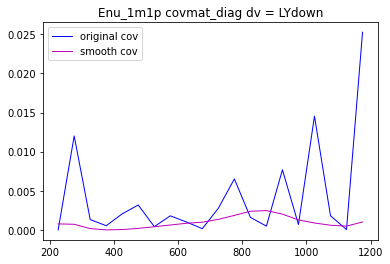

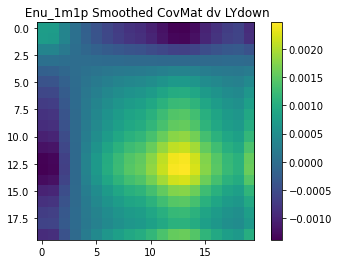

4
cv = 3194  and dv = 3376
cv POT = 609362734189999947776.000000 dv POT = 621993777142999941120.000000
cv[0] =  903.975952    cv[1] = 579.812805  rat = 0.609235
bwid = 195.239637 xmax-xmin=1000.000000  sum_cv = 3642.569950
[1.00000000e-06 1.50689805e+01 1.34878416e+02 2.17964458e+02
 2.06607300e+02 2.72276832e+02 2.94684394e+02 3.18960229e+02
 3.58976095e+02 3.26323573e+02 3.03411727e+02 2.77026582e+02
 2.15139149e+02 1.54184555e+02 1.62480936e+02 9.42184834e+01
 8.56149555e+01 7.79958717e+01 7.18062954e+01 5.49511144e+01]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


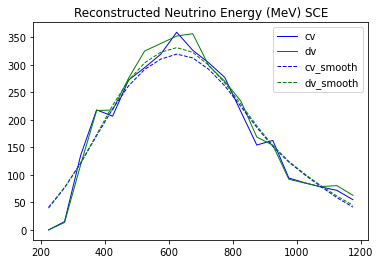

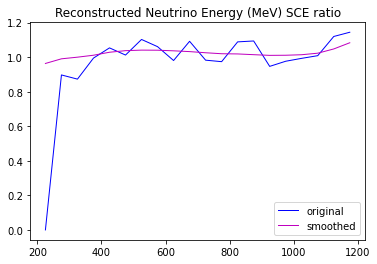

--------------------------  Hi There --------------------
3642.5698977319535
3642.5699496719544
3737.219500012404
3737.2195530868285
Enu_1m1p [1.31526321e-03 8.73645570e-05 2.55356143e-08 1.30207577e-04
 8.24328815e-04 1.43138632e-03 1.68073254e-03 1.63744171e-03
 1.36492890e-03 1.04920935e-03 6.63905779e-04 4.03153035e-04
 3.56617480e-04 2.13238123e-04 1.13247548e-04 1.27276877e-04
 2.05671825e-04 5.38767121e-04 2.28321700e-03 6.99145264e-03]
Enu_1m1p [0.00000000e+00 1.05482569e-02 1.61137384e-02 2.68145070e-05
 2.91244171e-03 1.54443879e-04 1.05528330e-02 3.72331393e-03
 3.70000888e-04 8.47843915e-03 2.95773194e-04 6.68571143e-04
 7.87361284e-03 8.82192263e-03 2.82323396e-03 5.47158301e-04
 4.30121932e-05 7.80304713e-05 1.43960927e-02 2.08784275e-02]


<ipython-input-12-aca5db941506>:81: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-12-aca5db941506>:82: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-12-aca5db941506>:83: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-12-aca5db941506>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


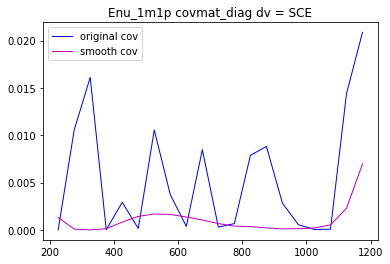

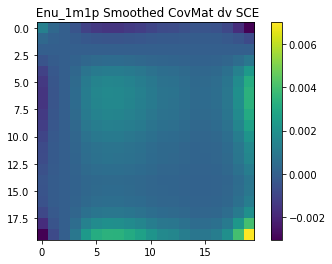

5
cv = 4796  and dv = 6885
cv POT = 898773223801000034304.000000 dv POT = 1264027045189999919104.000000
cv[0] =  400.276123    cv[1] = 1013.727722  rat = 0.283080
bwid = 182.611783 xmax-xmin=1000.000000  sum_cv = 5816.775087
[1.00000000e-06 4.17338815e+01 2.08125317e+02 3.28230789e+02
 5.13549325e+02 4.10790571e+02 5.37653889e+02 5.78517937e+02
 5.19049080e+02 4.48160923e+02 3.85687316e+02 3.73949184e+02
 3.27095085e+02 2.87261209e+02 2.47728790e+02 1.61709012e+02
 1.54455869e+02 1.04581472e+02 9.95524972e+01 8.89429395e+01]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


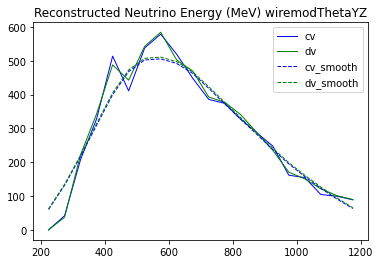

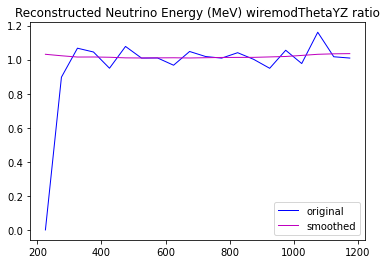

--------------------------  Hi There --------------------
5816.775019183393
5816.775087143396
5897.895686186869
5897.895755141947
Enu_1m1p [9.80069374e-04 5.13148776e-04 2.29598997e-04 2.38562839e-04
 1.93070894e-04 1.06598984e-04 9.38783159e-05 1.06117330e-04
 1.18293912e-04 9.38634845e-05 1.26277661e-04 1.60967994e-04
 1.69803021e-04 1.77213000e-04 2.50764840e-04 3.40175871e-04
 6.09368728e-04 9.75457242e-04 1.16276354e-03 1.24321918e-03]
Enu_1m1p [0.00000000e+00 1.06276373e-02 4.49769025e-03 2.00293683e-03
 2.55134455e-03 5.98303446e-03 8.17472705e-05 9.44101490e-05
 1.08115296e-03 2.28261820e-03 3.32196250e-04 7.75263723e-05
 1.65172738e-03 2.64851126e-06 2.59110206e-03 3.02587585e-03
 5.31065229e-04 2.58472468e-02 2.82009689e-04 8.47541677e-05]


<ipython-input-12-aca5db941506>:81: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-12-aca5db941506>:82: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-12-aca5db941506>:83: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-12-aca5db941506>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


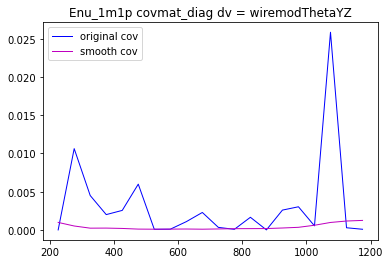

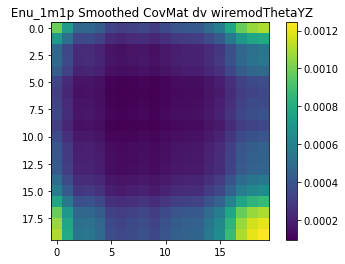

6
cv = 4796  and dv = 6945
cv POT = 898773223801000034304.000000 dv POT = 1296977725840000024576.000000
cv[0] =  400.276123    cv[1] = 1013.727722  rat = 0.283080
bwid = 182.611783 xmax-xmin=1000.000000  sum_cv = 5816.775087
[1.00000000e-06 4.17338815e+01 2.08125317e+02 3.28230789e+02
 5.13549325e+02 4.10790571e+02 5.37653889e+02 5.78517937e+02
 5.19049080e+02 4.48160923e+02 3.85687316e+02 3.73949184e+02
 3.27095085e+02 2.87261209e+02 2.47728790e+02 1.61709012e+02
 1.54455869e+02 1.04581472e+02 9.95524972e+01 8.89429395e+01]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


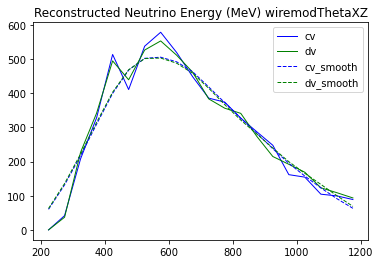

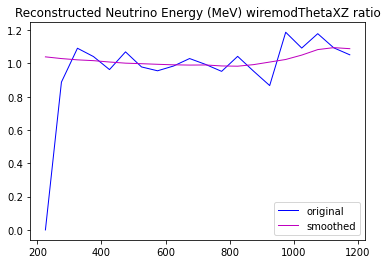

--------------------------  Hi There --------------------
5816.775019183393
5816.775087143396
5848.17287457793
5848.172942705052
Enu_1m1p [1.57656779e-03 8.65616353e-04 4.70272472e-04 2.86312517e-04
 7.61434090e-05 3.44317711e-06 1.94101098e-06 2.52173558e-05
 6.58426405e-05 9.40957188e-05 8.10702534e-05 2.21983818e-04
 2.68967474e-04 4.80355399e-05 7.17691364e-05 5.74437810e-04
 2.52928721e-03 6.94417578e-03 9.04628528e-03 7.89444563e-03]
Enu_1m1p [0.00000000e+00 1.25417334e-02 8.37181137e-03 1.71771402e-03
 1.35307938e-03 4.86210088e-03 4.35267473e-04 1.93597005e-03
 2.32341231e-04 8.75786272e-04 3.36136383e-05 2.25058740e-03
 1.82452488e-03 2.18400981e-03 1.76255374e-02 3.51828367e-02
 8.56214217e-03 3.20290492e-02 8.80843288e-03 2.70581679e-03]


<ipython-input-12-aca5db941506>:81: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-12-aca5db941506>:82: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-12-aca5db941506>:83: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-12-aca5db941506>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


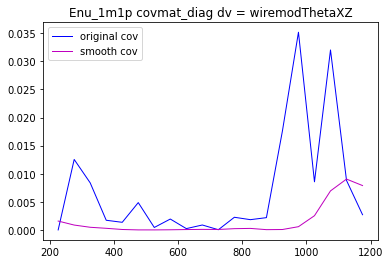

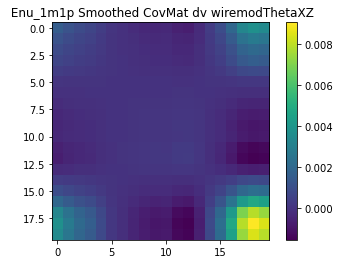

7
cv = 4796  and dv = 7138
cv POT = 898773223801000034304.000000 dv POT = 1308303170610000035840.000000
cv[0] =  400.276123    cv[1] = 1013.727722  rat = 0.283080
bwid = 182.611783 xmax-xmin=1000.000000  sum_cv = 5816.775087
[1.00000000e-06 4.17338815e+01 2.08125317e+02 3.28230789e+02
 5.13549325e+02 4.10790571e+02 5.37653889e+02 5.78517937e+02
 5.19049080e+02 4.48160923e+02 3.85687316e+02 3.73949184e+02
 3.27095085e+02 2.87261209e+02 2.47728790e+02 1.61709012e+02
 1.54455869e+02 1.04581472e+02 9.95524972e+01 8.89429395e+01]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


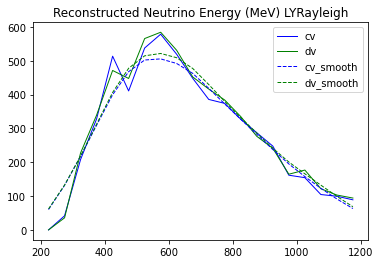

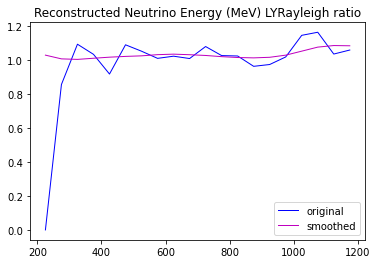

--------------------------  Hi There --------------------
5816.775019183393
5816.775087143396
5967.834338187138
5967.834407223508
Enu_1m1p [8.35654294e-04 4.79781984e-05 1.50955882e-05 1.11101973e-04
 2.85857382e-04 4.59968683e-04 6.13508329e-04 1.00470177e-03
 1.20356728e-03 9.87090686e-04 7.26304049e-04 4.00889150e-04
 2.24130780e-04 1.64246594e-04 2.62737772e-04 8.30792043e-04
 2.74132899e-03 5.79009958e-03 7.28762734e-03 7.05696304e-03]
Enu_1m1p [0.00000000e+00 2.06898242e-02 8.68984960e-03 1.13213357e-03
 6.78074948e-03 8.05595524e-03 2.71101750e-03 9.89619357e-05
 5.14650334e-04 7.94020493e-05 6.32910219e-03 6.91780170e-04
 5.73024273e-04 1.36596365e-03 6.91051735e-04 3.32397823e-04
 2.11686275e-02 2.67885765e-02 1.24607885e-03 3.47751277e-03]


<ipython-input-12-aca5db941506>:81: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(hCV))
<ipython-input-12-aca5db941506>:82: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(CV_smooth))
<ipython-input-12-aca5db941506>:83: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(h0))
<ipython-input-12-aca5db941506>:84: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(DV_smooth))


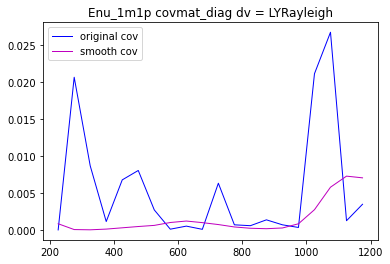

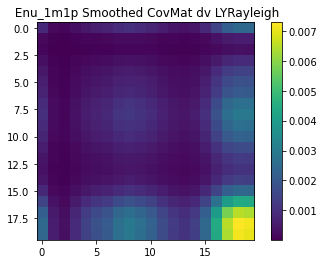

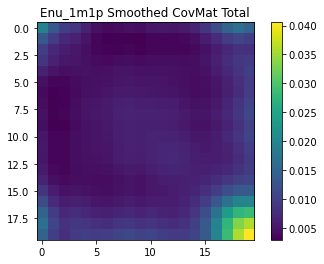

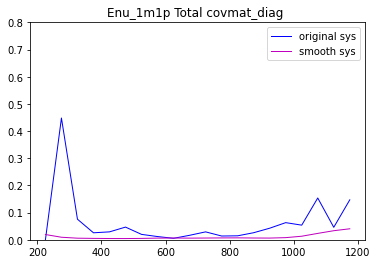

In [12]:
histOut = '/home/itran/SLAC_Work/ML/covmat_studies/HistsForCov/numu/%s/mu0%d'%(tag,bdtscore)


nbins = 20

if not os.path.exists(plotfolder):
    os.makedirs(plotfolder)
if not os.path.exists(covfolder):
    os.makedirs(covfolder)

    
#for dist in varListSel: #[9:10]
#for _,dist in varListSel.items(): # loop over all variables 
#    var = dist.myname
    #for i in range():
for var in (['Enu_1m1p']):#,'Q3_1m1p','Q0_1m1p','Q2_1m1p']):
    plotfolder_tmp = plotfolder+'/'+var
    if not os.path.exists(plotfolder_tmp):
        os.makedirs(plotfolder_tmp)
        print(plotfolder_tmp)
    covfolder_tmp = covfolder+'/'+var

    if not os.path.exists(covfolder_tmp):
        os.makedirs(covfolder_tmp)
#    dist = varListSel['Enu_1m1p']
    
    dist = varListSel[var]
    nbins = dist.nbins

    cov = np.zeros((nbins,nbins))
    cov_smooth = np.zeros((nbins,nbins))

    
    print(len(a_df_sys))
    for sysi in range(len(a_df_sys)): # loop over all detvars
#    for sysi in range(1):
#        sysi = 3
#        myvardf = a_df_sys[sysi].query('Enu_1m1p > 0 and Enu_1m1p_cv > 0')
        print(sysi)
        myvardf = a_df_sys[sysi].query('Enu_1m1p > 0')
        
        var_sys = myvardf.query(s_cuts)[dist.myname]
        var_cv = myvardf.query(s_cuts_cv)[dist.myname]
        print('cv = %d  and dv = %d'%(var_cv.shape[0],var_sys.shape[0]))

        pot_cv=myvardf.query("isCV==True").iloc[0]["POT"]
        pot_dv=myvardf.query("isCV==False").iloc[0]["POT"]
        print("cv POT = %f dv POT = %f"%(pot_cv,pot_dv))

        
        # get cv and detvar lists and apply weights
        var_cv_list = np.array(var_cv.astype(float).values.tolist())
        var_sys_list = np.array(var_sys.astype(float).values.tolist())
        cv_weights = np.array(myvardf.query(s_cuts_cv)['xsec_corr_weight'].astype(float).values.tolist())
        dv_weights = np.array(myvardf.query(s_cuts)['xsec_corr_weight'].astype(float).values.tolist())
        ratio = pot_cv / pot_dv

#        var_cv_list = var_cv_list * cv_weights 

#        var_sys_list = var_sys_list * sys_weights 
        
        
        
        CV_smooth,DV_smooth = smooth(var_cv_list,var_sys_list,dist.myrange[0],dist.myrange[1],names[sysi],cv_weights=cv_weights,dv_weights=dv_weights,nbin=nbins,ratio=ratio)
        #CV_smooth,DV_smooth = smooth(var_cv_list,var_sys_list,dist.myrange[0],dist.myrange[1],names[sysi],cv_weights=1,dv_weights=1,nbin=nbins,ratio=ratio)
        np.save('%s/1Dhist_Enu_1m1p_run1_%s_CV_smooth.npy'%(histOut,names[sysi]), CV_smooth)
        np.save('%s/1Dhist_Enu_1m1p_run1_%s_DV_smooth.npy'%(histOut,names[sysi]), DV_smooth)


        
#        print(cv_weights)
        hCV,binedges = np.histogram(var_cv_list,bins=nbins,range=dist.myrange,weights= cv_weights)#cv_scale)
        h0,_ = np.histogram(var_sys_list,bins=nbins,range=dist.myrange,weights=dv_weights)#cv_scale)
        bincenters = np.diff(binedges)/2 + binedges[:-1] 
        h0 = h0 *ratio
        
        np.save('%s/1Dhist_Enu_1m1p_run1_%s_CV_reg.npy'%(histOut,names[sysi]), hCV)
        np.save('%s/1Dhist_Enu_1m1p_run1_%s_DV_reg.npy'%(histOut,names[sysi]),h0)
        
        print('--------------------------  Hi There --------------------')
        print(sum(hCV))
        print(sum(CV_smooth))
        print(sum(h0))
        print(sum(DV_smooth))
    

        cov_tmp = np.zeros((nbins,nbins))
        cov_smooth_tmp = np.zeros((nbins,nbins))            
        for i in range(nbins):
            for j in range(nbins):
                if (hCV[i]*hCV[j])<1e-5:
                    cov_tmp[i][j]=0
                else:
    #               print('%d,%d'%(h0[i],hCV[j]))
                    cov_tmp[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(hCV[i]*hCV[j])
    #               print('result is: %d*%d/%d'%(h0[i]-hCV[i],h0[j]-hCV[j],hCV[i]*hCV[j]))
    #    print(dist.myname,cov.diagonal())
        for i in range(nbins):
            for j in range(nbins):
                if (CV_smooth[i]*CV_smooth[j])<1e-5:
                    cov_smooth_tmp[i][j]=0
                else:
    #               print('%d,%d'%(h0[i],hCV[j]))
                    cov_smooth_tmp[i][j] += (DV_smooth[i]-CV_smooth[i])*(DV_smooth[j]-CV_smooth[j])/(CV_smooth[i]*CV_smooth[j])
    #               print('result is: %d*%d/%d'%(h0[i]-hCV[i],h0[j]-hCV[j],hCV[i]*hCV[j]))
        print(dist.myname,cov_smooth_tmp.diagonal())
        print(dist.myname,cov_tmp.diagonal())
        
        offset = (dist.myrange[1] - dist.myrange[0] )/(2*nbins)
        x= np.linspace(dist.myrange[0]+offset,dist.myrange[1]-offset,nbins)
        
        plt.plot(x,cov_tmp.diagonal(),linewidth=1, linestyle="-", c="b",label='original cov')
        plt.plot(x,cov_smooth_tmp.diagonal(),linewidth=1, linestyle="-", c="m",label='smooth cov')
        plt.legend()
        plt.title('%s covmat_diag dv = %s'%(dist.myname,names[sysi]))
        plt.savefig(plotfolder_tmp+'/detsys_%s_%s_%s_cov_diag.png'%(dist.myname, run,names[sysi]),dpi=120,bbox_inches='tight')
        
        plt.show()
        
        plt.imshow(cov_smooth_tmp, interpolation='none')
        plt.colorbar(orientation='vertical')
        plt.title(' %s Smoothed CovMat dv %s'%(dist.myname,names[sysi]))

        plt.savefig(plotfolder_tmp+'/detsys_%s_%s_%s_cov.png'%(dist.myname, run,names[sysi]), dpi=120,bbox_inches='tight')
        plt.show()

        cov = cov+ cov_tmp
        cov_smooth = cov_smooth + cov_smooth_tmp
        np.savetxt(covfolder_tmp+'/detsys_%s_%s_%s_cov.csv'%(dist.myname, run,names[sysi]),cov_smooth_tmp, delimiter=',')

    plt.imshow(cov_smooth, interpolation='none')
    plt.colorbar(orientation='vertical')
    plt.title('%s Smoothed CovMat Total'%dist.myname)

    plt.savefig(plotfolder_tmp+'/detsys_%s_%s_cov.png'%(dist.myname, run),dpi=120,bbox_inches='tight')

    plt.show()
    np.savetxt(covfolder_tmp+'/detsys_%s_%s_cov.csv'%(dist.myname, run),cov_smooth, delimiter=',')
    

    
    plt.plot(x,cov.diagonal(),linewidth=1, linestyle="-", c="b",label='original sys')
    plt.plot(x,cov_smooth.diagonal(),linewidth=1, linestyle="-", c="m",label='smooth sys')
    plt.legend()
    plt.ylim([0,0.8])
    plt.title('%s Total covmat_diag '%dist.myname)
    plt.savefig(plotfolder_tmp+'/Tot_sys_%s_%s_cov.png'%(dist.myname,run),dpi=120,bbox_inches='tight')



[0.04570905 0.02201351 0.00877197 0.00517569 0.00497656 0.00496769
 0.00571425 0.00657584 0.00677864 0.00624649 0.00593719 0.00647112
 0.00668586 0.0065698  0.00887976 0.01381442 0.0216801  0.03464969
 0.04436907 0.04605291]


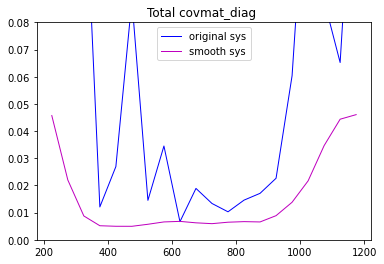

In [35]:
plt.plot(x,cov.diagonal(),linewidth=1, linestyle="-", c="b",label='original sys')
plt.plot(x,cov_smooth.diagonal(),linewidth=1, linestyle="-", c="m",label='smooth sys')
plt.legend()
plt.ylim([0,0.08])
plt.title('Total covmat_diag ')
print(cov_smooth.diagonal())

Text(0.5, 1.0, 'Q2_1m1p Smoothed CovMat Total')

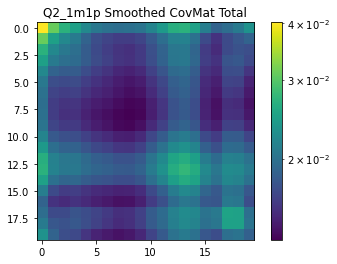

In [27]:
from matplotlib.colors import LogNorm

#f,ax = plt.subplots(1,1)
plt.imshow(cov_smooth, interpolation='none',norm=LogNorm())
plt.colorbar(orientation='vertical')
plt.title('%s Smoothed CovMat Total'%dist.myname)
plt.show()

wiremodX
6.767481725635091e-06
[1.05624516e-02 3.71392241e-03 1.01742918e-03 3.63174841e-04
 5.72340874e-04 5.92233991e-04 6.24672740e-04 6.79882706e-04
 5.39380110e-04 3.80114395e-04 1.61721776e-05 8.47465080e-05
 3.98223930e-04 1.08966308e-03 2.06828998e-03 3.54632915e-03
 4.43753687e-03 4.69534758e-03 4.06027909e-03 2.18184532e-03]


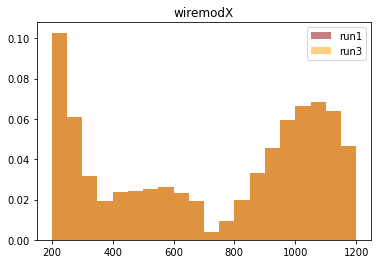

wiremodYZ
5.802018635080213e-05
[1.63198760e-02 1.01248650e-02 4.17105417e-03 1.67588550e-03
 1.04320327e-03 5.20638159e-04 1.70836706e-04 5.46554141e-05
 3.65840865e-05 2.19520849e-05 2.06127098e-05 1.23983989e-04
 2.44559498e-04 6.33413471e-04 1.57578822e-03 3.28536578e-03
 5.61877332e-03 9.43082998e-03 1.42239125e-02 1.63118601e-02]


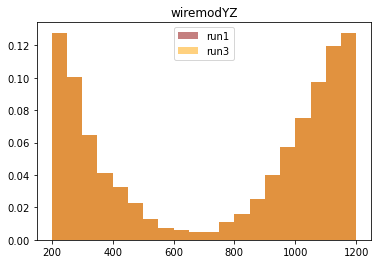

recomb
0.00033158060466039965
[9.75327382e-03 3.24361951e-03 5.43683867e-04 1.84094553e-05
 8.51966066e-05 4.58648643e-04 7.75047469e-04 7.21786900e-04
 3.12008132e-04 1.84111980e-05 7.87377379e-05 5.14613080e-04
 1.07861907e-03 1.31414768e-03 1.24477200e-03 1.28289579e-03
 1.09885849e-03 9.92153734e-04 7.81356133e-04 5.67558440e-04]


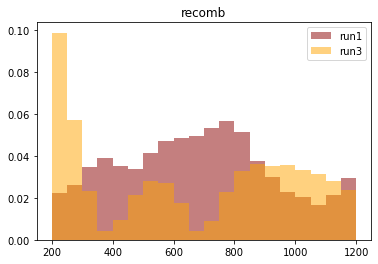

LYdown
0.0002444347496699101
[9.63467506e-03 5.56373004e-03 1.30576204e-03 3.67439560e-04
 2.17740603e-04 1.58742582e-04 1.65136430e-04 1.88463753e-04
 2.83486054e-04 4.40605613e-04 4.04510668e-04 4.17755835e-04
 2.93629985e-04 1.47620310e-04 5.92269507e-05 1.25540430e-05
 3.63202942e-04 7.80155015e-04 5.06459461e-04 1.35034130e-04]


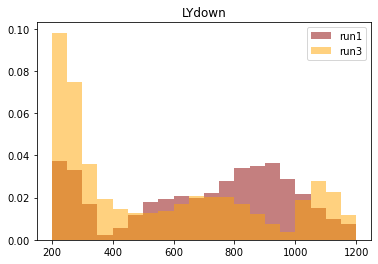

SCE
0.00017943981675736783
[1.36437621e-02 3.63859455e-03 1.56990326e-03 1.06017727e-03
 5.34286841e-04 1.95963374e-04 2.24870904e-05 2.93569880e-05
 1.58800351e-04 5.83590108e-04 1.24818816e-03 1.77406742e-03
 2.30899340e-03 2.89200305e-03 2.92412396e-03 3.51132224e-03
 3.62764778e-03 3.71408138e-03 3.21308862e-03 2.15577118e-03]


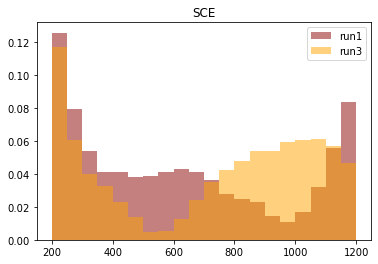

wiremodThetaYZ
1.5386665228824437e-06
[2.66235851e-03 4.03866293e-04 3.96867686e-05 5.60176096e-05
 2.15843216e-04 3.16412031e-04 2.90109862e-04 3.89115290e-04
 4.19833926e-04 2.92750855e-04 7.58121866e-05 3.41450738e-06
 1.40456495e-05 1.15974463e-04 5.33046230e-04 9.89728760e-04
 1.42518645e-03 1.71496041e-03 1.68948537e-03 1.47060402e-03]


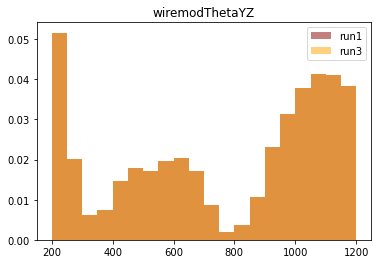

wiremodThetaXZ
0.00026859719922571376
[1.15310020e-02 7.69168559e-03 3.27675248e-03 1.96226403e-03
 2.04149367e-03 1.98838697e-03 1.58553828e-03 1.53802680e-03
 1.70808999e-03 1.69122497e-03 1.17038228e-03 1.17373554e-03
 9.01577552e-04 3.01193000e-04 3.22495888e-05 8.74695959e-04
 3.03356381e-03 7.11633942e-03 8.39372048e-03 4.85181856e-03]


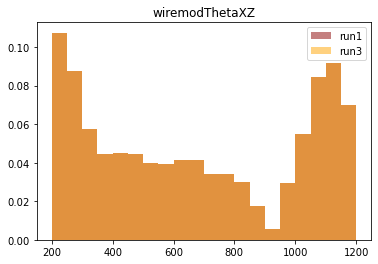

LYRayleigh
0.0001250841503952704
[4.13261505e-03 1.66565559e-03 2.75245110e-04 1.49208089e-06
 6.87234890e-05 2.50346656e-04 4.60675379e-04 5.13372508e-04
 3.96048900e-04 2.12013197e-04 8.09183222e-05 1.49658365e-06
 2.82408460e-05 2.21403063e-05 1.27290382e-05 2.92838885e-04
 1.35490692e-03 3.24659488e-03 4.16999555e-03 3.87019095e-03]


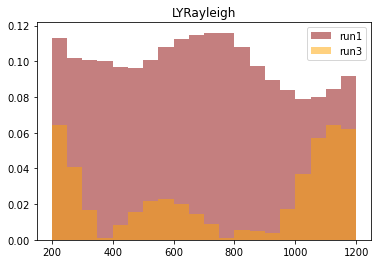

0.0014242704757110292
[0.09203467 0.04573467 0.01659256 0.00684007 0.00516796 0.00460771
 0.00411195 0.00411534 0.00386224 0.00381658 0.00343963 0.00443017
 0.00550049 0.00661945 0.00845493 0.0142927  0.02219156 0.03287441
 0.03797567 0.03186277]


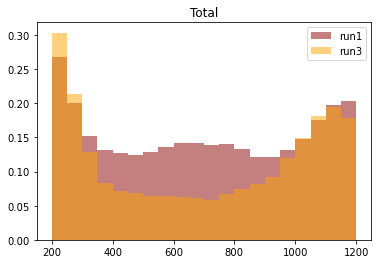

In [28]:
from numpy import genfromtxt

for sysi in range(len(a_df_sys)):
#for sysi in range(1):
    print(names[sysi])
    run3 = genfromtxt('/home/itran/SLAC_Work/ML/1L1PSelection/outputs/covMatrix2021-02-24/Enu_1m1p/detsys_Enu_1m1p_run3_%s_cov.csv'%names[sysi], delimiter=',')
    run1 = genfromtxt('/home/itran/SLAC_Work/ML/1L1PSelection/outputs/covMatrix2021-02-24/Enu_1m1p/detsys_Enu_1m1p_run1_%s_cov.csv'%names[sysi], delimiter=',')
    #print(np.average(run1))
    print(np.average(run3))


    #print(run1.diagonal())
    print(run3.diagonal())
    plt.bar(x, np.sqrt(run1.diagonal()), width = 50,
            color = 'darkred', linewidth = 0, alpha = 0.5,label="run1")
    plt.bar(x, np.sqrt(run3.diagonal()), width = 50,
            color = 'orange', linewidth = 0, alpha = 0.5,label="run3")
    plt.legend()
    plt.title(names[sysi])
    plt.show()
#print(np.sqrt(run3.diagonal()))
#bla = run3-run1
#print(100*bla.diagonal()/run3.diagonal())

run3 = genfromtxt('/home/itran/SLAC_Work/ML/1L1PSelection/outputs/covMatrix2021-02-24/Enu_1m1p/detsys_Enu_1m1p_run3_cov.csv', delimiter=',')
run1 = genfromtxt('/home/itran/SLAC_Work/ML/1L1PSelection/outputs/covMatrix2021-02-24/Enu_1m1p/detsys_Enu_1m1p_run1_cov.csv', delimiter=',')
#print(np.average(run1))
print(np.average(run3))


#print(run1.diagonal())
print(run3.diagonal())
plt.bar(x, np.sqrt(run1.diagonal()), width = 50,
        color = 'darkred', linewidth = 0, alpha = 0.5,label="run1")
plt.bar(x, np.sqrt(run3.diagonal()), width = 50,
        color = 'orange', linewidth = 0, alpha = 0.5,label="run3")
plt.legend()
plt.title('Total')
plt.show()

wiremodX
-3.350800393342968e-05
[ 0.01842157  0.00859834  0.00189521  0.00111419  0.00060856  0.00053494
  0.0005942   0.00056564  0.00049152  0.00037589  0.00012198 -0.00015306
 -0.00012234  0.00030968  0.00093974  0.00190481  0.00287053  0.0035426
  0.00308907  0.00101035]


<ipython-input-14-8da765d944c4>:17: RuntimeWarning: invalid value encountered in sqrt
  plt.bar(x, np.sqrt(run1.diagonal()), width = 50,
<ipython-input-14-8da765d944c4>:19: RuntimeWarning: invalid value encountered in sqrt
  plt.bar(x, np.sqrt(run3.diagonal()), width = 50,


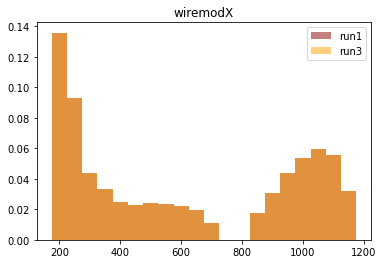

wiremodYZ
-2.416012790858716e-05
[ 8.60260270e-03  1.27385986e-02  6.05443281e-03  3.25262814e-03
  1.57769800e-03  7.93836477e-04  3.53760591e-04  1.30356362e-04
  4.22694373e-05  8.53679238e-06 -1.78176062e-05 -1.77012901e-05
  9.35458816e-05  3.48502481e-04  7.56472371e-04  1.60457616e-03
  3.01497693e-03  4.68779529e-03  5.33550479e-03  3.59382197e-03]


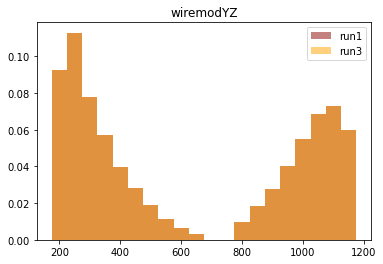

recomb
0.00022711912239799974
[ 9.45245394e-04  5.77061267e-03  1.34659361e-03  9.07018574e-05
 -1.71984928e-04 -3.85024627e-05  2.27827463e-04  4.32412725e-04
  3.21198407e-04  7.39519597e-05 -1.32266896e-04 -6.71749058e-05
  2.82596446e-04  7.66022200e-04  1.15070328e-03  1.46050653e-03
  1.08695565e-03  5.93823117e-04  4.12816444e-07 -2.41659111e-04]


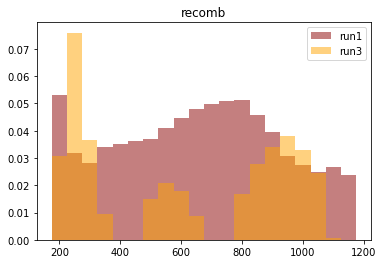

LYdown
0.00044871784670744933
[ 1.54159322e-02  6.90286454e-03  2.46465114e-03  1.08478412e-03
  4.06866037e-04  2.49382579e-04  1.94351394e-04  1.72985356e-04
  1.83645532e-04  2.43852925e-04  2.92499300e-04  3.64654546e-04
  3.15224753e-04  1.89666611e-04  8.61062267e-05 -3.04350787e-05
 -7.83700111e-05  5.10900822e-05  9.80184613e-05 -1.83100415e-04]


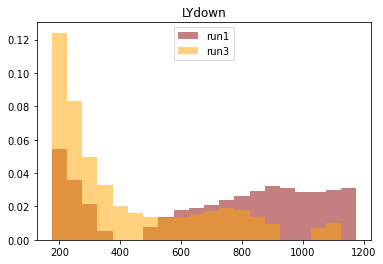

SCE
-1.1990811370199003e-05
[ 1.09382725e-02  6.21867177e-03  3.40042817e-03  1.28227480e-03
  6.92563221e-04  3.08336778e-04  3.50672193e-05 -9.36028608e-05
 -3.03454053e-05  2.10896208e-04  5.96082312e-04  1.06153599e-03
  1.78128532e-03  2.39442560e-03  2.84017671e-03  3.36366612e-03
  3.07271271e-03  2.26148166e-03  1.11285236e-03  9.49416312e-05]


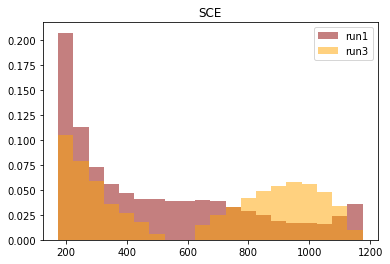

wiremodThetaYZ
1.6326363126470007e-06
[ 1.72782861e-03  1.35581167e-03  1.52126490e-04  1.44751130e-04
  7.26107844e-05  1.68949656e-04  2.38210629e-04  2.94787573e-04
  2.84412491e-04  2.80493723e-04  1.66581009e-04  1.02653459e-05
 -4.86777615e-05 -7.07906247e-06  1.18177996e-04  3.45416077e-04
  8.29412313e-04  1.20286351e-03  8.25807853e-04 -5.33369032e-05]


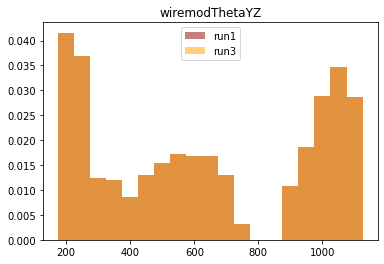

wiremodThetaXZ
0.0005127420152909616
[ 0.01141608  0.01021022  0.00486202  0.00358878  0.00231057  0.00203631
  0.00183771  0.00173782  0.00156734  0.00155697  0.0014787   0.00130783
  0.00097136  0.00051248 -0.00011844 -0.00043215  0.00021669  0.00186796
  0.00339638  0.00312401]


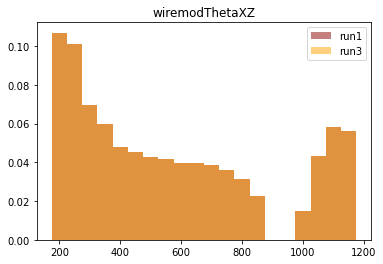

LYRayleigh
-4.640943932851062e-06
[ 5.90122742e-03  2.61606832e-03  4.23509016e-04 -1.30803688e-04
 -8.45517054e-05  6.95078957e-05  2.26286495e-04  3.85192264e-04
  4.56905241e-04  3.65528218e-04  1.92475672e-04  6.51650503e-05
 -1.19070013e-05 -4.00168649e-06 -8.90485083e-06 -1.81146540e-05
  2.20482867e-04  7.80652217e-04  1.14928876e-03  7.04290294e-04]


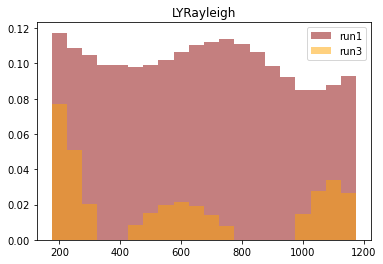

0.0014764724312441337
[0.0800232  0.06482902 0.02646357 0.01301767 0.00634902 0.0044598
 0.0037823  0.00362051 0.00332616 0.00311143 0.00273207 0.00273597
 0.00344672 0.00461532 0.0057361  0.00806748 0.01130582 0.0154577
 0.01505132 0.0075397 ]


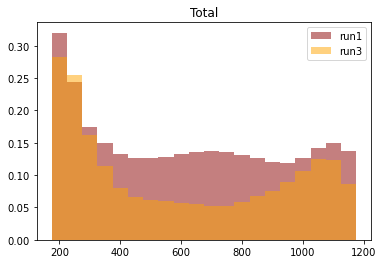

In [14]:
from numpy import genfromtxt
x= np.arange(200,1200,50)
for sysi in range(len(a_df_sys)):
#for sysi in range(1):
    print(names[sysi])
    run3 = genfromtxt('/home/itran/SLAC_Work/ML/1L1PSelection/outputs/covMatrix2021-02-24/Enu_1m1p/detsys_Enu_1m1p_run3_%s_cov.csv'%names[sysi], delimiter=',')
    run1 = genfromtxt('/home/itran/SLAC_Work/ML/1L1PSelection/outputs/covMatrix2021-02-24/Enu_1m1p/detsys_Enu_1m1p_run1_%s_cov.csv'%names[sysi], delimiter=',')
    run3 = run3[2:]
    run1 = run1[2:]

    #print(np.average(run1))
    print(np.average(run3))


    #print(run1.diagonal())
    print(run3.diagonal())
    plt.bar(x, np.sqrt(run1.diagonal()), width = 50,
            color = 'darkred', linewidth = 0, alpha = 0.5,label="run1")
    plt.bar(x, np.sqrt(run3.diagonal()), width = 50,
            color = 'orange', linewidth = 0, alpha = 0.5,label="run3")
    plt.legend()
    plt.title(names[sysi])
    plt.show()
#print(np.sqrt(run3.diagonal()))
#bla = run3-run1
#print(100*bla.diagonal()/run3.diagonal())

run3 = genfromtxt('/home/itran/SLAC_Work/ML/1L1PSelection/outputs/covMatrix2021-02-24/Enu_1m1p/detsys_Enu_1m1p_run3_cov.csv', delimiter=',')
run1 = genfromtxt('/home/itran/SLAC_Work/ML/1L1PSelection/outputs/covMatrix2021-02-24/Enu_1m1p/detsys_Enu_1m1p_run1_cov.csv', delimiter=',')
run3 = run3[2:]
run1 = run1[2:]
#print(np.average(run1))
print(np.average(run3))


#print(run1.diagonal())
print(run3.diagonal())
plt.bar(x, np.sqrt(run1.diagonal()), width = 50,
        color = 'darkred', linewidth = 0, alpha = 0.5,label="run1")
plt.bar(x, np.sqrt(run3.diagonal()), width = 50,
        color = 'orange', linewidth = 0, alpha = 0.5,label="run3")
plt.legend()
plt.title('Total')
plt.show()

# Combined

In [8]:
run = 'run3'
f_scaleslist = []
s_detsyslist = []
names = ['wiremodX','wiremodYZ','recomb','LYdown','SCE','wiremodThetaYZ','wiremodThetaXZ','LYRayleigh','LYAtt']
#names = ['wiremodThetaXZ']

for name in names:
    s_detsyslist.append(name)

a_df_sys3 = []
a_df_sys1 = []

RSE = ['run','subrun','event']
i=0
for sys in s_detsyslist:
#    print('111')
    df_sys3 = pd.read_parquet('%s/pickles/%s_run3_%s.parquet'%(datafolder,sys,tag))
#    print(df_sys.shape[0])
    a_df_sys3.append(df_sys3)
    print("total %d, cv = %d dv = %d"%(df_sys3.shape[0],df_sys3.query("isCV==True").shape[0],df_sys3.query("isCV==False").shape[0]))

#    if(sys=='LYAtt'):continue
    df_sys1 = pd.read_parquet('%s/pickles/%s_run1_%s.parquet'%(datafolder,sys,tag))
    a_df_sys1.append(df_sys1)

    
    print("total %d, cv = %d dv = %d"%(df_sys1.shape[0],df_sys1.query("isCV==True").shape[0],df_sys1.query("isCV==False").shape[0]))
    i+=1

    #    print(df_sys.shape[0])

#df_numu_run3_presel = pd.read_parquet('../../data/pickles/numu_run1_nodupesMay1.parquet')
#print((list(a_df_sys[7])))

total 71256, cv = 58791 dv = 12465
total 71256, cv = 58791 dv = 12465
total 71341, cv = 58791 dv = 12550
total 71341, cv = 58791 dv = 12550
total 12286, cv = 5919 dv = 6367
total 13548, cv = 6823 dv = 6725
total 70231, cv = 58791 dv = 11440
total 13344, cv = 6823 dv = 6521
total 12061, cv = 5919 dv = 6142
total 13973, cv = 6823 dv = 7150
total 70893, cv = 58791 dv = 12102
total 70893, cv = 58791 dv = 12102
total 70891, cv = 58791 dv = 12100
total 70891, cv = 58791 dv = 12100
total 71362, cv = 58791 dv = 12571
total 13664, cv = 6823 dv = 6841
total 70238, cv = 58791 dv = 11447
total 70238, cv = 58791 dv = 11447


../outputs/PlotDumpsComb2021-04-02/sigprobavg
0
cv = 4796  and dv = 7090
cv = 4796  and dv = 7090
cv POT = 898773223801000034304.000000 dv POT = 1309153192370000101376.000000
cv POT = 898773223801000034304.000000 dv POT = 1309153192370000101376.000000
cv[0] =  0.715825    cv[1] = 0.721842  rat = 0.497908
bwid = 0.091306 xmax-xmin=0.500000  sum_cv = 5816.775072
[1286.38633705 1336.80366791 1550.48140826 1390.10159858  253.00206035]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


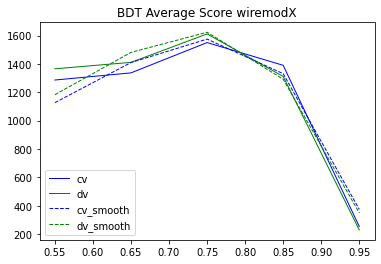

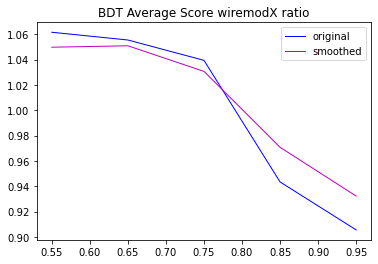

cv[0] =  0.715825    cv[1] = 0.721842  rat = 0.497908
bwid = 0.091306 xmax-xmin=0.500000  sum_cv = 5816.775072
[1286.38633705 1336.80366791 1550.48140826 1390.10159858  253.00206035]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


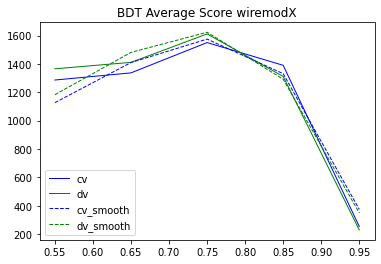

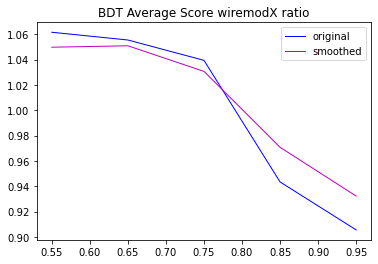

sigprobavg [0.00247495 0.00258786 0.00093996 0.00085591 0.00458653]


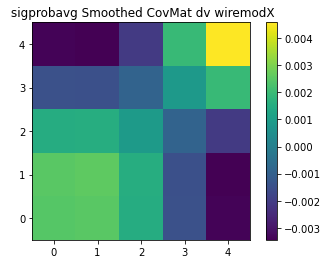

1
cv = 4796  and dv = 7113
cv = 4796  and dv = 7113
cv POT = 898773223801000034304.000000 dv POT = 1310970606080000000000.000000
cv POT = 898773223801000034304.000000 dv POT = 1310970606080000000000.000000
cv[0] =  0.715825    cv[1] = 0.721842  rat = 0.497908
bwid = 0.091306 xmax-xmin=0.500000  sum_cv = 5816.775072
[1286.38633705 1336.80366791 1550.48140826 1390.10159858  253.00206035]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


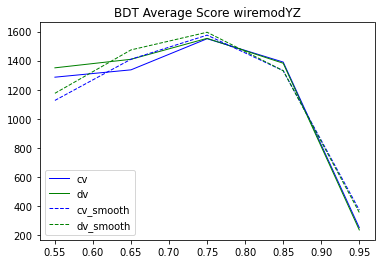

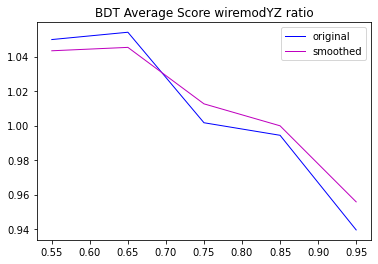

cv[0] =  0.715825    cv[1] = 0.721842  rat = 0.497908
bwid = 0.091306 xmax-xmin=0.500000  sum_cv = 5816.775072
[1286.38633705 1336.80366791 1550.48140826 1390.10159858  253.00206035]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


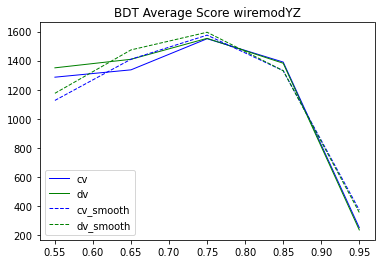

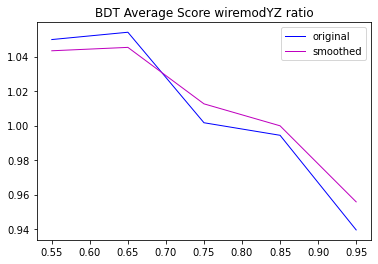

sigprobavg [1.88379321e-03 2.05927454e-03 1.58975169e-04 1.78306324e-08
 1.95868005e-03]


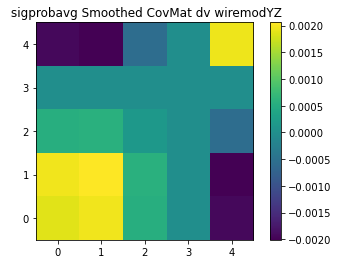

2
cv = 3446  and dv = 3728
cv = 3194  and dv = 3131
cv POT = 579534847420999991296.000000 dv POT = 637062455184000024576.000000
cv POT = 609362734189999947776.000000 dv POT = 627484668519000047616.000000
cv[0] =  0.647346    cv[1] = 0.921657  rat = 0.412584
bwid = 0.096606 xmax-xmin=0.500000  sum_cv = 3918.778615
[ 895.44239024  939.55917178 1025.26016964  914.65475719  143.86212592]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


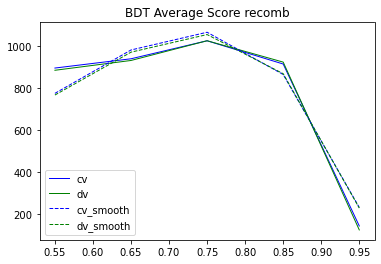

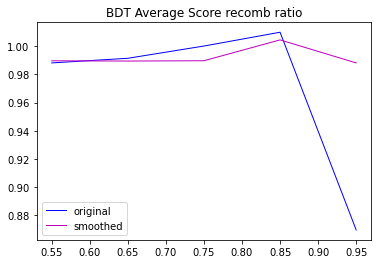

cv[0] =  0.737776    cv[1] = 0.706460  rat = 0.510842
bwid = 0.097620 xmax-xmin=0.500000  sum_cv = 3642.569935
[865.15411    934.94524108 961.54205373 791.74174369  89.18678617]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


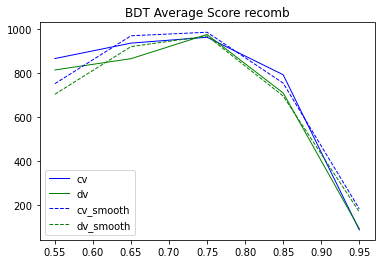

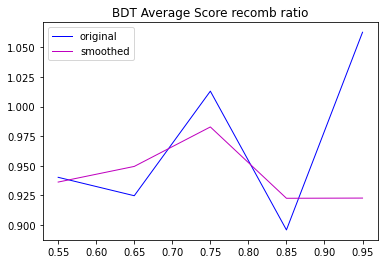

sigprobavg [0.00053928 0.00041249 0.00014187 0.00018789 0.00064535]


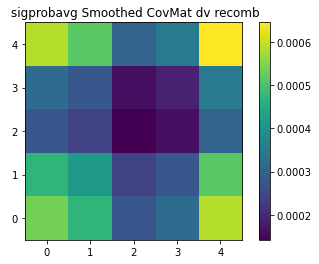

3
cv = 4796  and dv = 6515
cv = 3194  and dv = 3056
cv POT = 898773223801000034304.000000 dv POT = 1218083168320000098304.000000
cv POT = 609362734189999947776.000000 dv POT = 594452048285999955968.000000
cv[0] =  0.715825    cv[1] = 0.721842  rat = 0.497908
bwid = 0.091306 xmax-xmin=0.500000  sum_cv = 5816.775072
[1286.38633705 1336.80366791 1550.48140826 1390.10159858  253.00206035]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


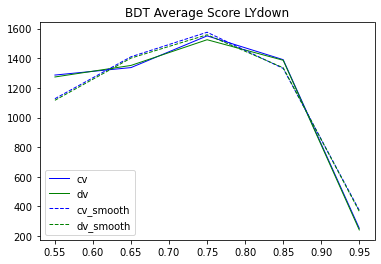

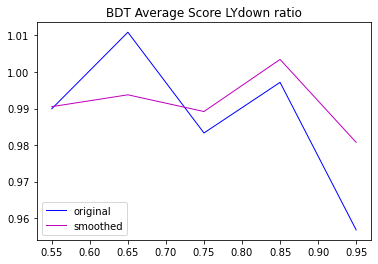

cv[0] =  0.737776    cv[1] = 0.706460  rat = 0.510842
bwid = 0.097620 xmax-xmin=0.500000  sum_cv = 3642.569935
[865.15411    934.94524108 961.54205373 791.74174369  89.18678617]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


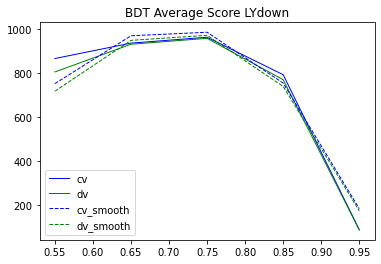

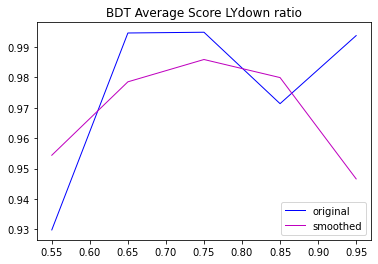

sigprobavg [3.46874427e-04 1.03534046e-04 1.34759513e-04 3.29686325e-06
 6.81077580e-04]


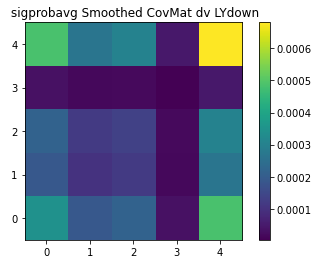

4
cv = 3446  and dv = 3593
cv = 3194  and dv = 3376
cv POT = 579534847420999991296.000000 dv POT = 589862945463999987712.000000
cv POT = 609362734189999947776.000000 dv POT = 621993777142999941120.000000
cv[0] =  0.647346    cv[1] = 0.921657  rat = 0.412584
bwid = 0.096606 xmax-xmin=0.500000  sum_cv = 3918.778615
[ 895.44239024  939.55917178 1025.26016964  914.65475719  143.86212592]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


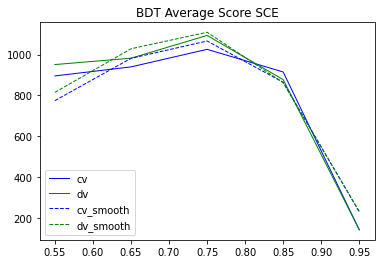

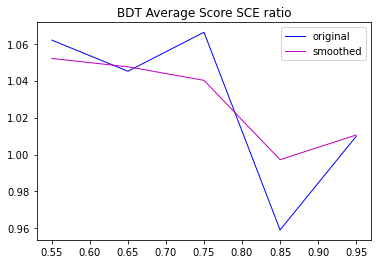

cv[0] =  0.737776    cv[1] = 0.706460  rat = 0.510842
bwid = 0.097620 xmax-xmin=0.500000  sum_cv = 3642.569935
[865.15411    934.94524108 961.54205373 791.74174369  89.18678617]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


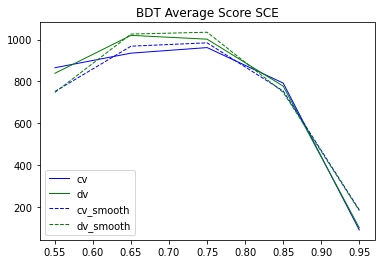

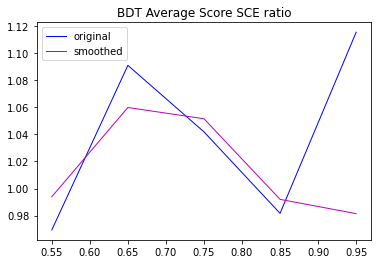

sigprobavg [1.44591294e-03 2.55309729e-03 1.83294257e-03 1.55446401e-05
 2.04653467e-05]


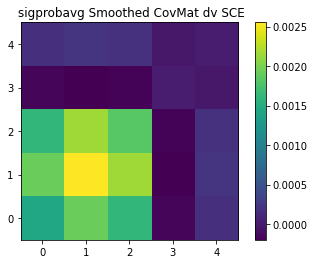

5
cv = 4796  and dv = 6885
cv = 4796  and dv = 6885
cv POT = 898773223801000034304.000000 dv POT = 1264027045189999919104.000000
cv POT = 898773223801000034304.000000 dv POT = 1264027045189999919104.000000
cv[0] =  0.715825    cv[1] = 0.721842  rat = 0.497908
bwid = 0.091306 xmax-xmin=0.500000  sum_cv = 5816.775072
[1286.38633705 1336.80366791 1550.48140826 1390.10159858  253.00206035]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


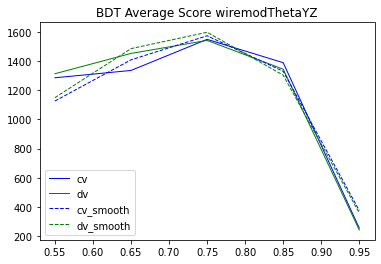

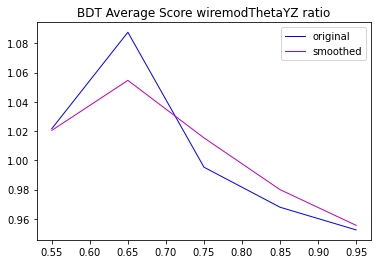

cv[0] =  0.715825    cv[1] = 0.721842  rat = 0.497908
bwid = 0.091306 xmax-xmin=0.500000  sum_cv = 5816.775072
[1286.38633705 1336.80366791 1550.48140826 1390.10159858  253.00206035]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


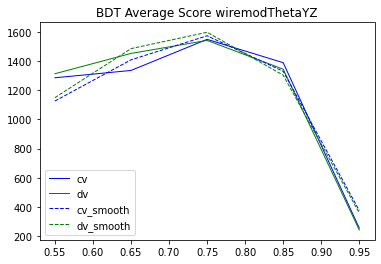

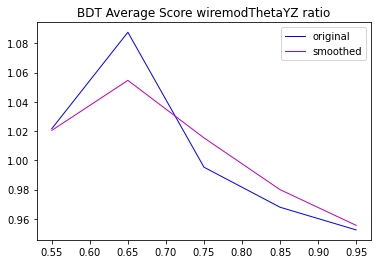

sigprobavg [0.0004194  0.00298859 0.0002368  0.00040078 0.00197233]


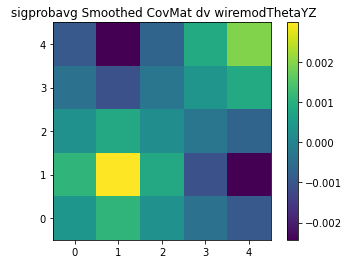

6
cv = 4796  and dv = 6945
cv = 4796  and dv = 6945
cv POT = 898773223801000034304.000000 dv POT = 1296977725840000024576.000000
cv POT = 898773223801000034304.000000 dv POT = 1296977725840000024576.000000
cv[0] =  0.715825    cv[1] = 0.721842  rat = 0.497908
bwid = 0.091306 xmax-xmin=0.500000  sum_cv = 5816.775072
[1286.38633705 1336.80366791 1550.48140826 1390.10159858  253.00206035]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


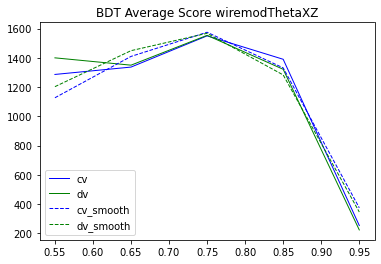

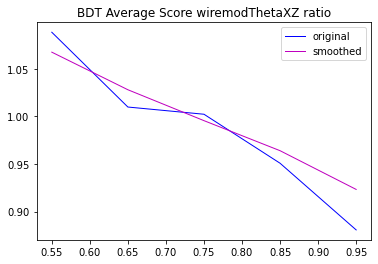

cv[0] =  0.715825    cv[1] = 0.721842  rat = 0.497908
bwid = 0.091306 xmax-xmin=0.500000  sum_cv = 5816.775072
[1286.38633705 1336.80366791 1550.48140826 1390.10159858  253.00206035]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


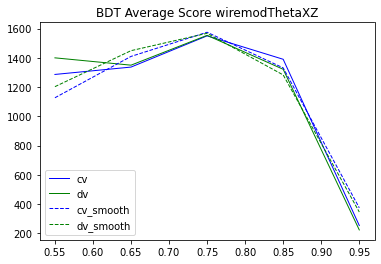

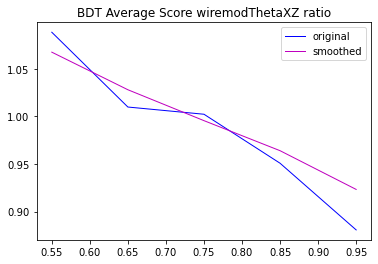

sigprobavg [4.54096480e-03 7.79105820e-04 2.05675392e-05 1.30228895e-03
 5.89056258e-03]


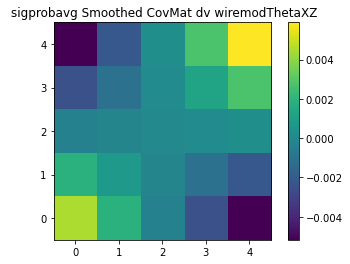

7
cv = 4796  and dv = 7138
cv = 3194  and dv = 3203
cv POT = 898773223801000034304.000000 dv POT = 1308303170610000035840.000000
cv POT = 609362734189999947776.000000 dv POT = 674276740521999990784.000000
cv[0] =  0.715825    cv[1] = 0.721842  rat = 0.497908
bwid = 0.091306 xmax-xmin=0.500000  sum_cv = 5816.775072
[1286.38633705 1336.80366791 1550.48140826 1390.10159858  253.00206035]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


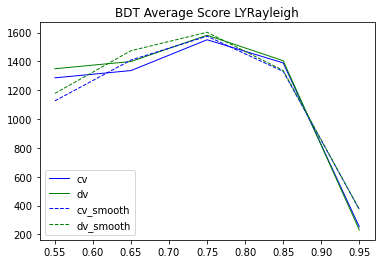

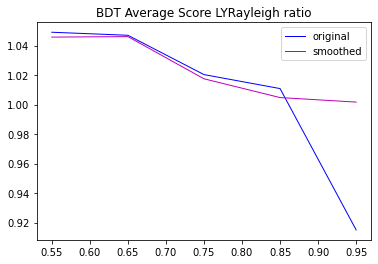

cv[0] =  0.737776    cv[1] = 0.706460  rat = 0.510842
bwid = 0.097620 xmax-xmin=0.500000  sum_cv = 3642.569935
[865.15411    934.94524108 961.54205373 791.74174369  89.18678617]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


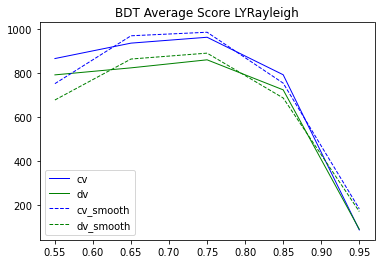

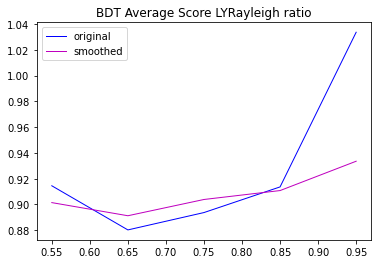

sigprobavg [8.58246322e-05 3.68530162e-05 9.72434118e-05 2.62799523e-04
 1.43016891e-04]


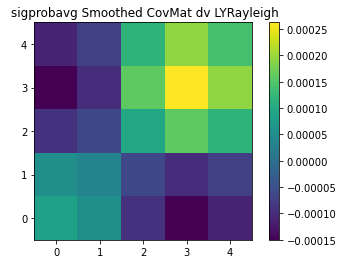

8
cv = 4796  and dv = 6518
cv = 4796  and dv = 6518
cv POT = 898773223801000034304.000000 dv POT = 1212833087030000091136.000000
cv POT = 898773223801000034304.000000 dv POT = 1212833087030000091136.000000
cv[0] =  0.715825    cv[1] = 0.721842  rat = 0.497908
bwid = 0.091306 xmax-xmin=0.500000  sum_cv = 5816.775072
[1286.38633705 1336.80366791 1550.48140826 1390.10159858  253.00206035]


<ipython-input-6-3c22a64d32b0>:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.7*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-6-3c22a64d32b0>:88: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print('bwid = %f xmax-xmin=%f  sum_cv = %f'%(bwid,xmax-xmin,sum(cv_hist)))
<ipython-input-6-3c22a64d32b0>:137: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-6-3c22a64d32b0>:150: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


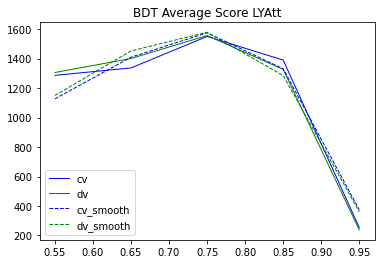

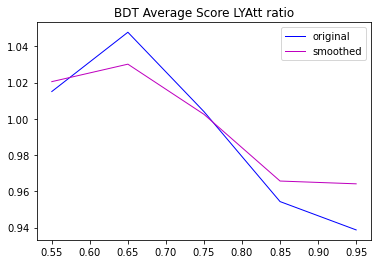

sigprobavg [4.20837068e-04 9.09130901e-04 6.17637015e-06 1.17632387e-03
 1.28393047e-03]


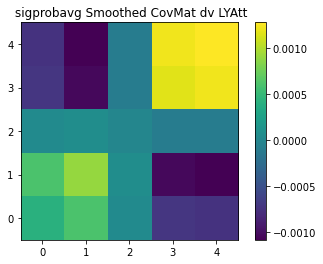

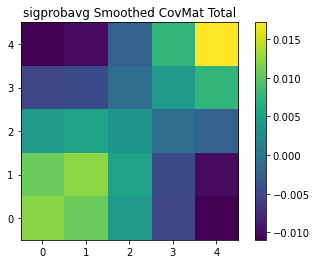

--------------------------
[[ 0.01215784  0.01075812  0.00416242 -0.00495458 -0.01096934]
 [ 0.01075812  0.01242994  0.00538482 -0.00463094 -0.0101666 ]
 [ 0.00416242  0.00538482  0.0035693  -0.00095286 -0.00214158]
 [-0.00495458 -0.00463094 -0.00095286  0.00420485  0.0074466 ]
 [-0.01096934 -0.0101666  -0.00214158  0.0074466   0.01718195]]
../outputs/covMatrixComb2021-04-02/sigprobavg/detsys_sigprobavg_run13_cov.csv


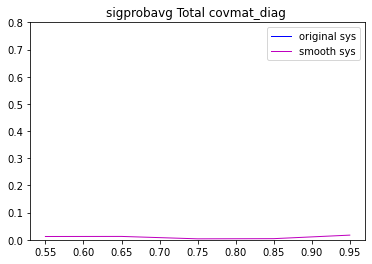

In [18]:
#histOut = '/home/itran/SLAC_Work/ML/covmat_studies/HistsForCov/numu/%s/mu0%d'%(tag,bdtscore)

normFactor=6e21
nbins = 20

if not os.path.exists(plotfolder):
    os.makedirs(plotfolder)
if not os.path.exists(covfolder):
    os.makedirs(covfolder)

    
#for dist in varListSel: #[9:10]
#for _,dist in varListSel.items(): # loop over all variables 
#    var = dist.myname
    #for i in range():
for var in (['sigprobavg']):#,'Q3_1m1p','Q0_1m1p','Q2_1m1p']):
    plotfolder_tmp = plotfolder+'/'+var
    if not os.path.exists(plotfolder_tmp):
        os.makedirs(plotfolder_tmp)
        print(plotfolder_tmp)
    covfolder_tmp = covfolder+'/'+var

    if not os.path.exists(covfolder_tmp):
        os.makedirs(covfolder_tmp)
#    dist = varListSel['Enu_1m1p']
    
    dist = varListSel[var]
    nbins = dist.nbins

    cov = np.zeros((nbins,nbins))
    cov_smooth = np.zeros((nbins,nbins))

    
    for sysi in range(len(a_df_sys3)): # loop over all detvars
#    for sysi in range(1):
#        sysi = 3
#        myvardf = a_df_sys[sysi].query('Enu_1m1p > 0 and Enu_1m1p_cv > 0')
        print(sysi)
        myvardf3 = a_df_sys3[sysi].query('Enu_1m1p > 0')
        myvardf1 = a_df_sys1[sysi].query('Enu_1m1p > 0')

        var_sys3 = myvardf3.query(s_cuts)[dist.myname]
        var_cv3 = myvardf3.query(s_cuts_cv)[dist.myname]
        print('cv = %d  and dv = %d'%(var_cv3.shape[0],var_sys3.shape[0]))

        var_sys1 = myvardf1.query(s_cuts)[dist.myname]
        var_cv1 = myvardf1.query(s_cuts_cv)[dist.myname]
        print('cv = %d  and dv = %d'%(var_cv1.shape[0],var_sys1.shape[0]))
        
        
        pot_cv3=myvardf3.query("isCV==True").iloc[0]["POT"]
        pot_dv3=myvardf3.query("isCV==False").iloc[0]["POT"]
        print("cv POT = %f dv POT = %f"%(pot_cv3,pot_dv3))

                
        pot_cv1=myvardf1.query("isCV==True").iloc[0]["POT"]
        pot_dv1=myvardf1.query("isCV==False").iloc[0]["POT"]
        print("cv POT = %f dv POT = %f"%(pot_cv1,pot_dv1))
        
        
        # get cv and detvar lists and apply weights
        var_cv_list3 = np.array(var_cv3.astype(float).values.tolist())
        var_sys_list3 = np.array(var_sys3.astype(float).values.tolist())
        cv_weights3 = np.array(myvardf3.query(s_cuts_cv)['xsec_corr_weight'].astype(float).values.tolist())
        dv_weights3 = np.array(myvardf3.query(s_cuts)['xsec_corr_weight'].astype(float).values.tolist())
        ratio3 = pot_cv3 / pot_dv3
        norm3 = normFactor/ pot_cv3

        
        # get cv and detvar lists and apply weights
        var_cv_list1 = np.array(var_cv1.astype(float).values.tolist())
        var_sys_list1 = np.array(var_sys1.astype(float).values.tolist())
        cv_weights1 = np.array(myvardf1.query(s_cuts_cv)['xsec_corr_weight'].astype(float).values.tolist())
        dv_weights1 = np.array(myvardf1.query(s_cuts)['xsec_corr_weight'].astype(float).values.tolist())
        ratio1 = pot_cv1 / pot_dv1
        norm1 = normFactor/ pot_cv1
#        var_cv_list = var_cv_list * cv_weights 

#        var_sys_list = var_sys_list * sys_weights 
        
        
        
        CV_smooth3,DV_smooth3 = smooth(var_cv_list3,var_sys_list3,dist.myrange[0],dist.myrange[1],names[sysi],cv_weights=cv_weights3,dv_weights=dv_weights3,nbin=nbins,ratio=ratio3)
        CV_smooth3 = CV_smooth3*norm3
        DV_smooth3 = DV_smooth3*norm3        

        if sysi!=8:
            CV_smooth1,DV_smooth1 = smooth(var_cv_list1,var_sys_list1,dist.myrange[0],dist.myrange[1],names[sysi],cv_weights=cv_weights1,dv_weights=dv_weights1,nbin=nbins,ratio=ratio1)
            CV_smooth1 = CV_smooth1*norm1
            DV_smooth1 = DV_smooth1*norm1
        else:
            CV_smooth1=DV_smooth1 = np.zeros(nbins)


        CV_smooth_tot = 0.256*CV_smooth1 +0.744*CV_smooth3
        DV_smooth_tot = 0.256*DV_smooth1 +0.744*DV_smooth3
        
        cov_smooth_tmp = np.zeros((nbins,nbins))            
        for i in range(nbins):
            for j in range(nbins):
                if (CV_smooth_tot[i]*CV_smooth_tot[j])<1e-5:
                    cov_smooth_tmp[i][j]+=0
                else:
    #               print('%d,%d'%(h0[i],hCV[j]))
                    cov_smooth_tmp[i][j] += (DV_smooth_tot[i]-CV_smooth_tot[i])*(DV_smooth_tot[j]-CV_smooth_tot[j])/(CV_smooth_tot[i]*CV_smooth_tot[j])
    #               print('result is: %d*%d/%d'%(h0[i]-hCV[i],h0[j]-hCV[j],hCV[i]*hCV[j]))
        print(dist.myname,cov_smooth_tmp.diagonal())
        
        offset = (dist.myrange[1] - dist.myrange[0] )/(2*nbins)
        x= np.linspace(dist.myrange[0]+offset,dist.myrange[1]-offset,nbins)
  
        plt.imshow(cov_smooth_tmp, interpolation='none',origin='lower')
        plt.colorbar(orientation='vertical')
        plt.title(' %s Smoothed CovMat dv %s'%(dist.myname,names[sysi]))

#        plt.savefig(plotfolder_tmp+'/detsys_%s_%s_%s_cov.png'%(dist.myname, run,names[sysi]), dpi=120,bbox_inches='tight')
        plt.show()

        cov_smooth = cov_smooth + cov_smooth_tmp
        np.savetxt(covfolder_tmp+'/detsys_%s_%s_%s_cov.csv'%(dist.myname, run,names[sysi]),cov_smooth_tmp, delimiter=',')

    plt.imshow(cov_smooth, interpolation='none',origin='lower')
    plt.colorbar(orientation='vertical')
    plt.title('%s Smoothed CovMat Total'%dist.myname)

    plt.savefig(plotfolder_tmp+'/detsys_%s_%s_cov.png'%(dist.myname, run),dpi=120,bbox_inches='tight')

    plt.show()
    np.savetxt(covfolder_tmp+'/detsys_%s_run13_cov.csv'%(dist.myname),cov_smooth, delimiter=',')
    print('--------------------------')
    print(cov_smooth)
    print(covfolder_tmp+'/detsys_%s_run13_cov.csv'%(dist.myname))

    
    plt.plot(x,cov.diagonal(),linewidth=1, linestyle="-", c="b",label='original sys')
    plt.plot(x,cov_smooth.diagonal(),linewidth=1, linestyle="-", c="m",label='smooth sys')
    plt.legend()
    plt.ylim([0,0.8])
    plt.title('%s Total covmat_diag '%dist.myname)
    plt.savefig(plotfolder_tmp+'/Tot_sys_%s_%s_cov.png'%(dist.myname,run),dpi=120,bbox_inches='tight')
    


In [31]:
dvar = varListSel['Xreco']
nbins = 14
cov = np.zeros((nbins,nbins))
flatsys = 0.0

for sysi in range(len(a_df_sys)):
    myvardf = a_overlap_sys[sysi].query(s_cuts)
    myvarcv = a_cv_sys[sysi].query(s_cuts_cv)
        
    var_sys = myvardf[dvar.myname]
    var_cv = myvarcv[dvar.myname+'_cv']
          
    hCV,binedges = np.histogram(var_cv,bins=nbins,range=dvar.myrange)
    h0,_ = np.histogram(var_sys,bins=nbins,range=dvar.myrange)
    bincenters = np.diff(binedges)/2 + binedges[:-1]
        
    # polyfit
    polyterms = 4
    polyCV = np.polyfit(bincenters, hCV, polyterms)
    fCV = np.poly1d(polyCV)    
    poly0 = np.polyfit(bincenters, h0, polyterms)
    f0 = np.poly1d(poly0)    
    
    hCV_fit = fCV(bincenters)
    h0_fit = f0(bincenters)
    
    #Savitsky Golay
    window_length = 7
    little_poly_t = 3
    hCV_sgfit = signal.savgol_filter(hCV, window_length, little_poly_t)
    h0_sgfit = signal.savgol_filter(h0, window_length, little_poly_t)
        
    
    fig,ax = plt.subplots(figsize=(16,11))
        
    dvarLinspace = np.linspace(dvar.myrange[0],dvar.myrange[1],40)
    #plt.plot(dvarLinspace,fCV(dvarLinspace),label='CV Fit (%f)'%chi2_cv)
    #plt.plot(dvarLinspace,f0(dvarLinspace),label='Variation Fit (%f)'%chi2_h0)
    #plt.scatter(bincenters,hCV_sgfit,label='CV SG Fit (%f)'%chi2_cv_sgfit,marker='o',s=120)
    #plt.scatter(bincenters,h0_sgfit,label='Variation SG Fit (%f)'%chi2_h0_sgfit,marker='o')
    ax.set_title(s_detsyslist[sysi],fontsize=30)
    ax.set_xlabel(dvar.mylabel,fontsize=20)
    ax.legend(fontsize=15)
    
    
    for i in range(nbins):
        for j in range(nbins):
            cov[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(hCV[i]*hCV[j])
            #cov[i][j] += (h0_fit[i]-hCV_fit[i])*(h0_fit[j]-hCV_fit[j])/(hCV_fit[i]*hCV_fit[j])
            #cov[i][j] += (h0_sgfit[i]-hCV_sgfit[i])*(h0_sgfit[j]-hCV_sgfit[j])/(hCV_sgfit[i]*hCV_sgfit[j])
    flatsys += np.power(h0.sum()-hCV.sum(),2)/float(h0.sum()*hCV.sum())
            
            
print('flat sys:',np.sqrt(flatsys),flatsys)
print(dvar.myname,cov[0][0],cov[7][7])
X, Y = np.meshgrid(binedges,binedges)

fig,ax = plt.subplots(figsize=(10,10))
crat = ax.pcolormesh(X, Y,cov.T,cmap='cool')#,vmin=-2,vmax=3)
cbar = fig.colorbar(crat)
ax.set_title('Fractional Covariance Matrix',fontsize=30)
ax.set_ylabel(dvar.mylabel,fontsize=20)
ax.set_xlabel(dvar.mylabel,fontsize=20)
#np.savetxt('/home/dcianci/Downloads/detsys_enu_sgfit_cov.csv',cov,delimiter=',')

#cov = np.zeros((nbins,nbins))
#for i in range(nbins):
#    cov[i][i] = flatsys
#np.savetxt('/home/dcianci/Downloads/detsys_enu_flat_cov.csv',cov,delimiter=',')



NameError: name 'a_overlap_sys' is not defined

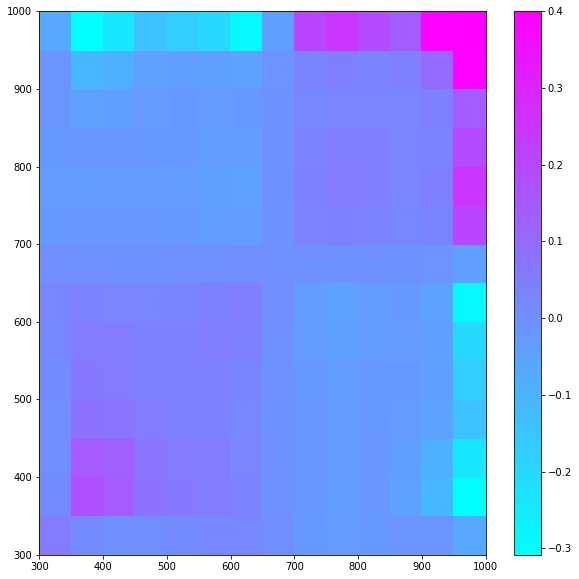

In [138]:
X, Y = np.meshgrid(binedges,binedges)

fig,ax = plt.subplots(figsize=(10,10))
crat = ax.pcolormesh(X, Y,cov,cmap='cool',vmax=.4)
cbar = fig.colorbar(crat)


In [59]:
list(df_sys)

['Proton_CosTheta_cv',
 'Lepton_CosTheta_cv',
 'Proton_CosTheta',
 'Lepton_CosTheta',
 'bkgBDT_run3_cv',
 'bkgBDT_run3',
 'run',
 'subrun',
 'event',
 'vtxid',
 'Xreco',
 'Yreco',
 'Zreco',
 'InFiducial',
 'AnyReco',
 'NTracks',
 'N5cmTracks',
 'PassSimpleCuts',
 'PassShowerReco',
 'PassSecondShower',
 'FailedBoost',
 'FailedBoost_1m1p',
 'FailedBoost_1e1p',
 'Good3DReco',
 'Eta',
 'OpenAng',
 'Thetas',
 'Phis',
 'QCorrectionFactorVertex',
 'ChargeNearTrunk',
 'LongTrackLen',
 'ShortTrackLen',
 'MaxShrFrac',
 'MinShrFrac',
 'CCQEEnergyShift_1m1p',
 'Enu_1m1p',
 'PhiT_1m1p',
 'AlphaT_1m1p',
 'PT_1m1p',
 'PTRat_1m1p',
 'BjX_1m1p',
 'BjY_1m1p',
 'Q2_1m1p',
 'Sph_1m1p',
 'PzEnu_1m1p',
 'Q0_1m1p',
 'Q3_1m1p',
 'OpenAngB_1m1p',
 'ThetasB_1m1p',
 'PhisB_1m1p',
 'PhiTB_1m1p',
 'AlphaTB_1m1p',
 'PTB_1m1p',
 'BjXB_1m1p',
 'BjYB_1m1p',
 'Q2B_1m1p',
 'SphB_1m1p',
 'CCQEEnergyShift_1e1p',
 'Enu_1e1p',
 'PhiT_1e1p',
 'AlphaT_1e1p',
 'PT_1e1p',
 'PTRat_1e1p',
 'BjX_1e1p',
 'BjY_1e1p',
 'Q2_1e1p',
 'S

wiremodX
polyfit degrees: 0 7.19169553120931
sg window_length 7 degrees: 10 7.116065343221028
wiremodYZ
polyfit degrees: 0 14.652654012044271
sg window_length 7 degrees: 10 14.726931889851889
wiremoddEdx
polyfit degrees: 0 8.301823933919271
sg window_length 1 degrees: 10 8.199064095815023
LYdown
polyfit degrees: 0 5.715118010838826
sg window_length 9 degrees: 10 5.694827159245809
SCE
polyfit degrees: 0 14.362505276997885
sg window_length 9 degrees: 10 14.273023923238119
wiremodThetaYZ
polyfit degrees: 0 6.244710286458333
sg window_length 11 degrees: 10 6.2069681485493975
wiremodThetaXZ
polyfit degrees: 0 10.961923917134603
sg window_length 3 degrees: 10 10.499676068623861
flat sys: 0.08959695735944827 0.008027614768070792


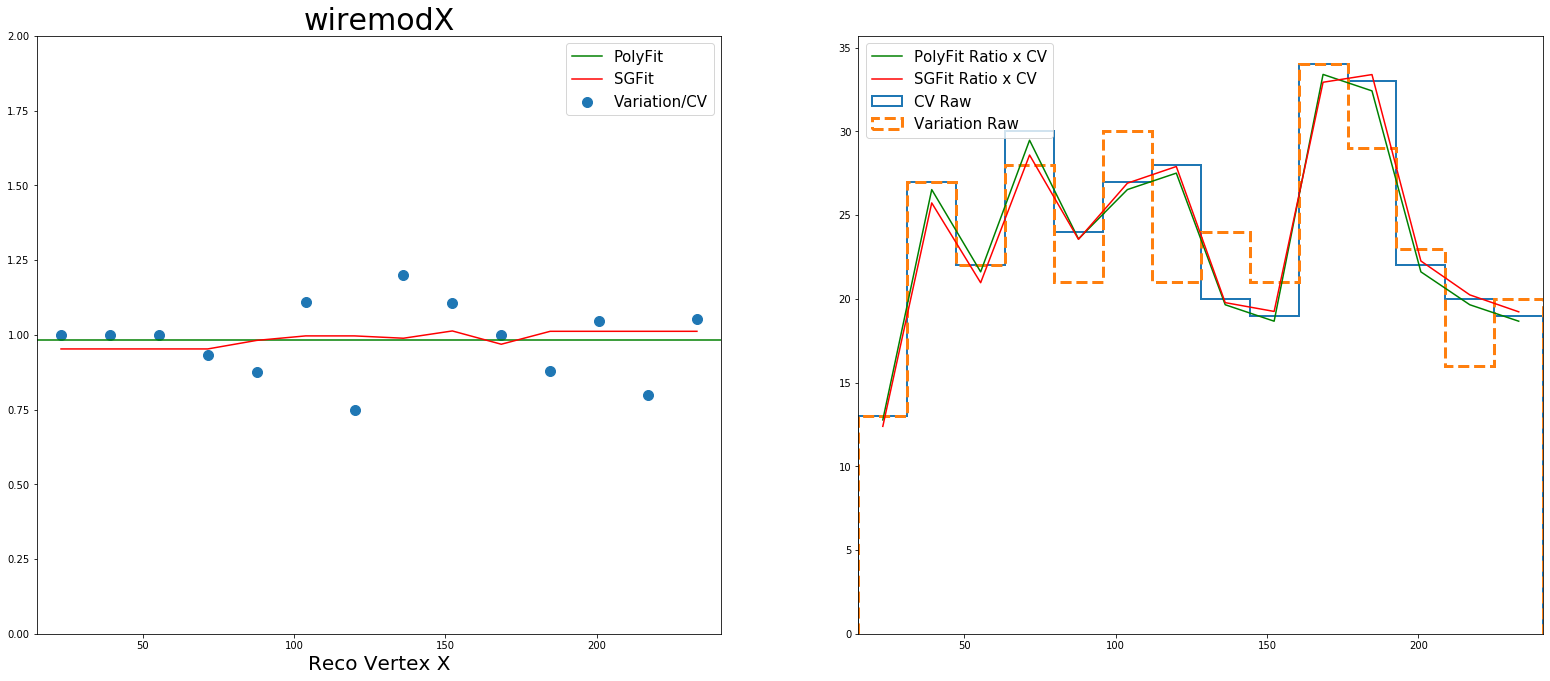

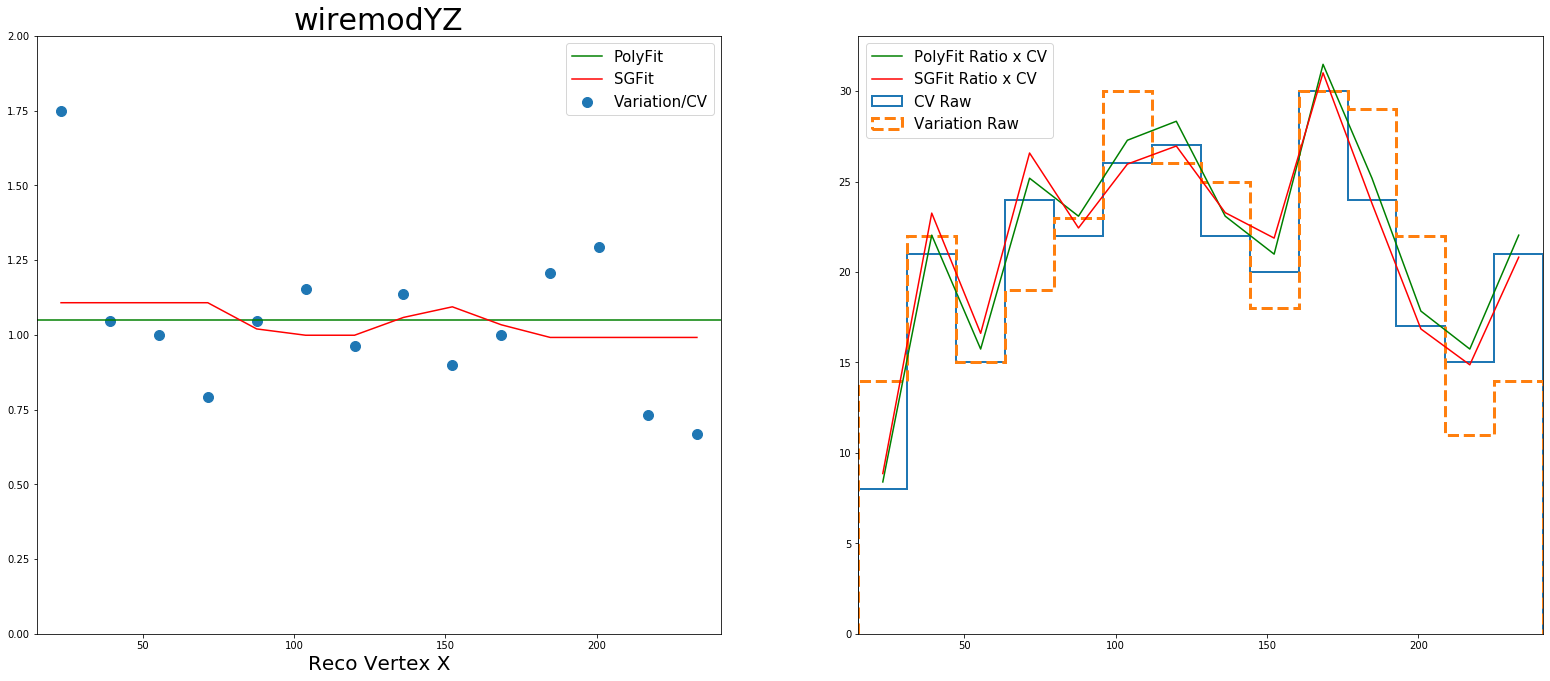

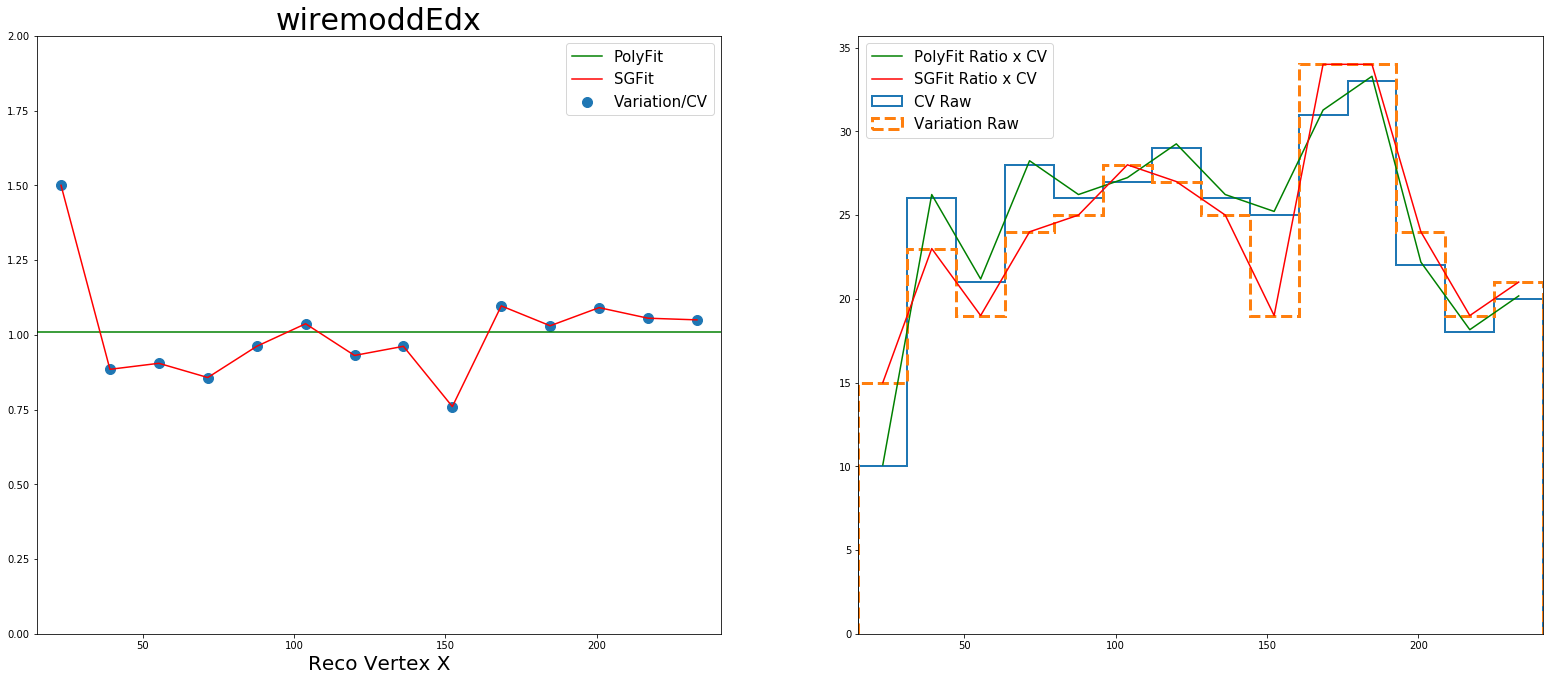

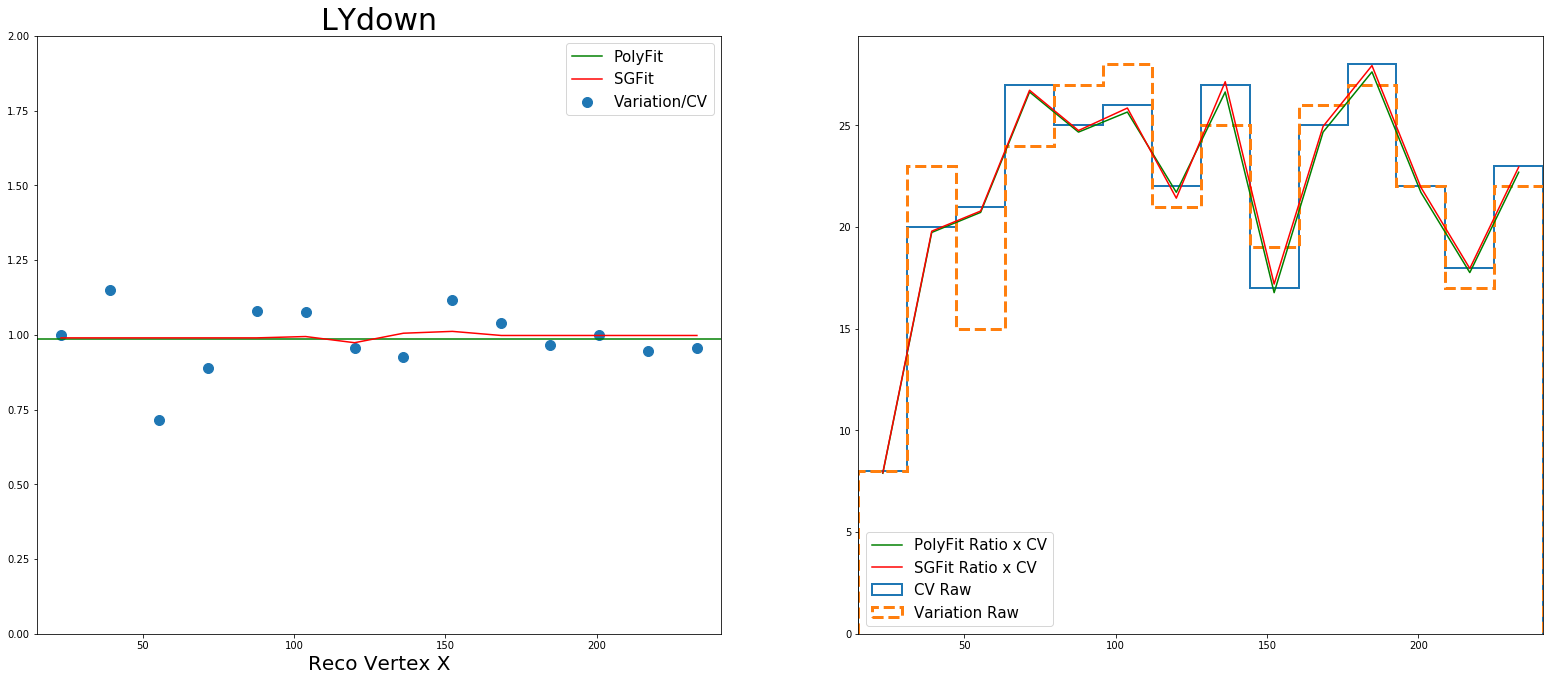

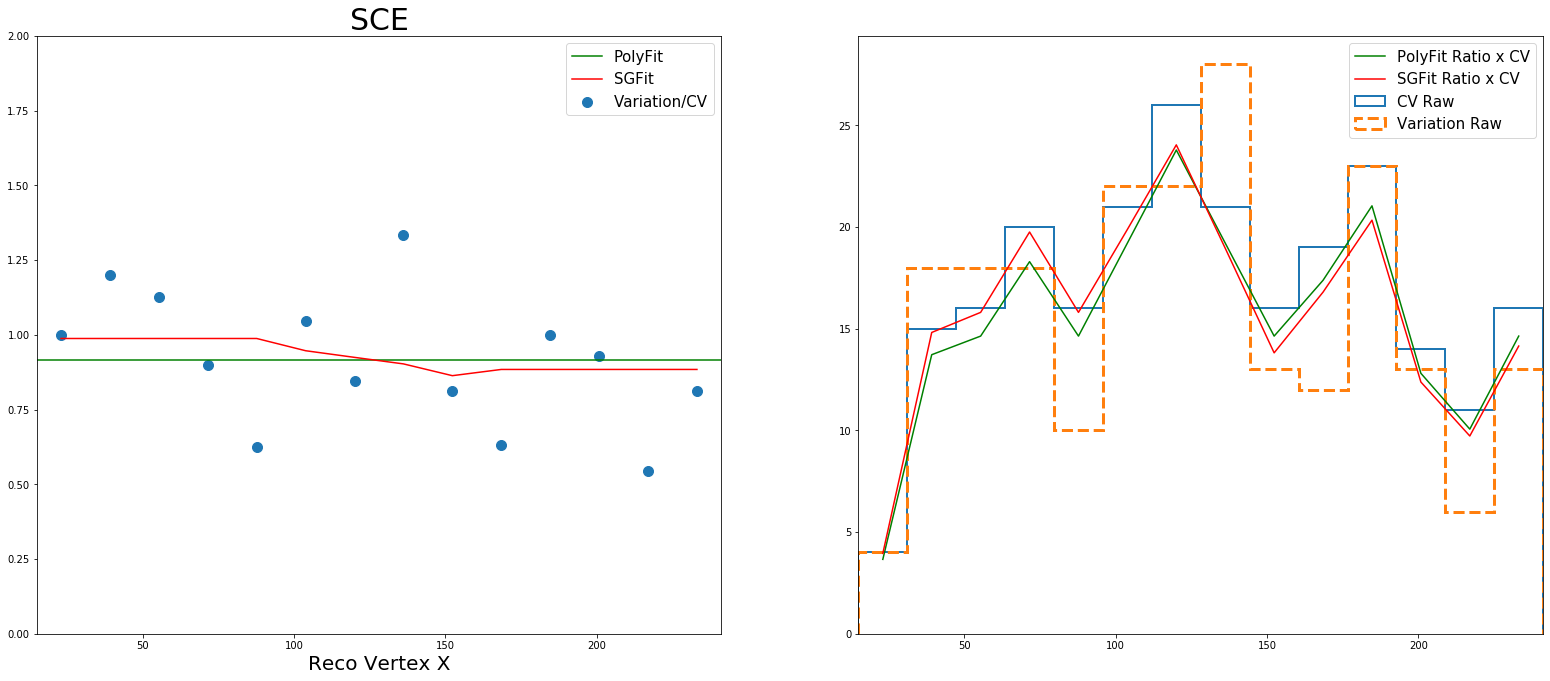

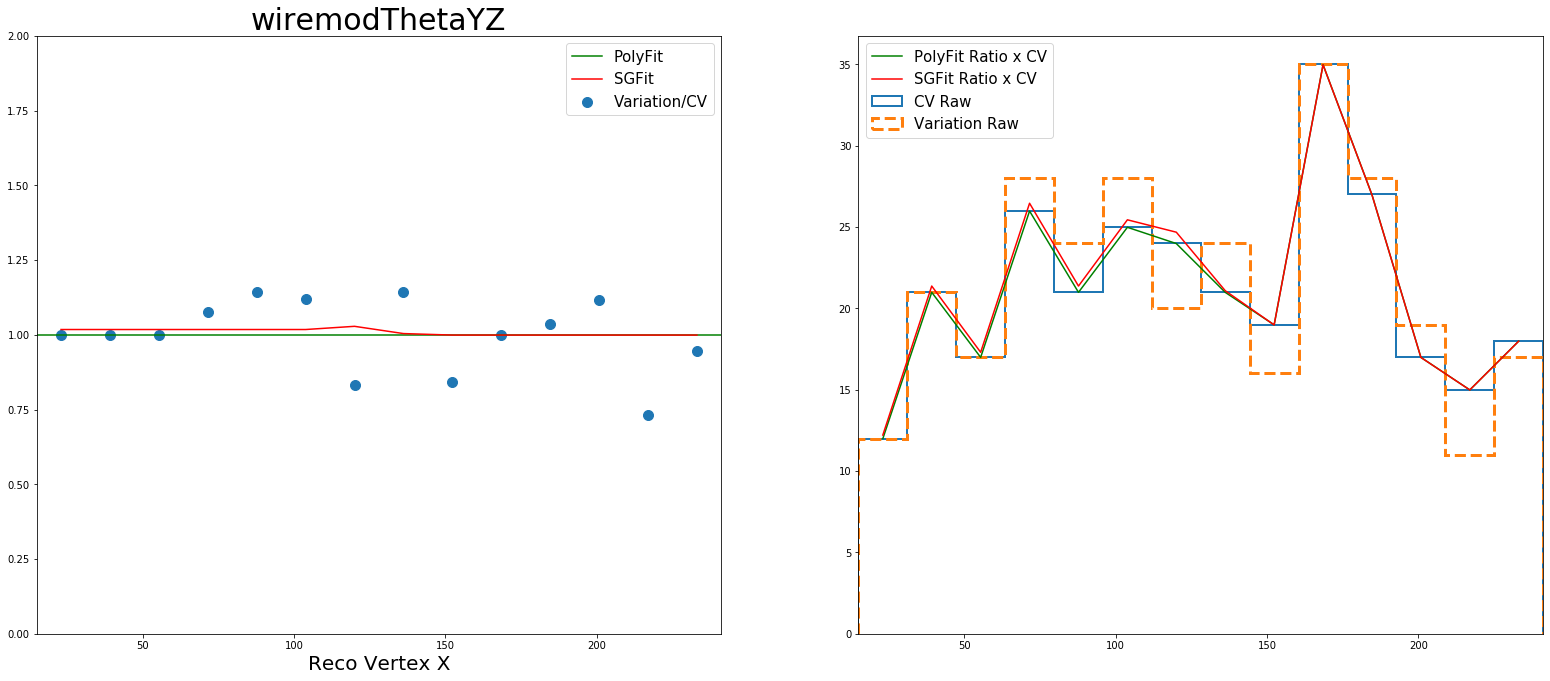

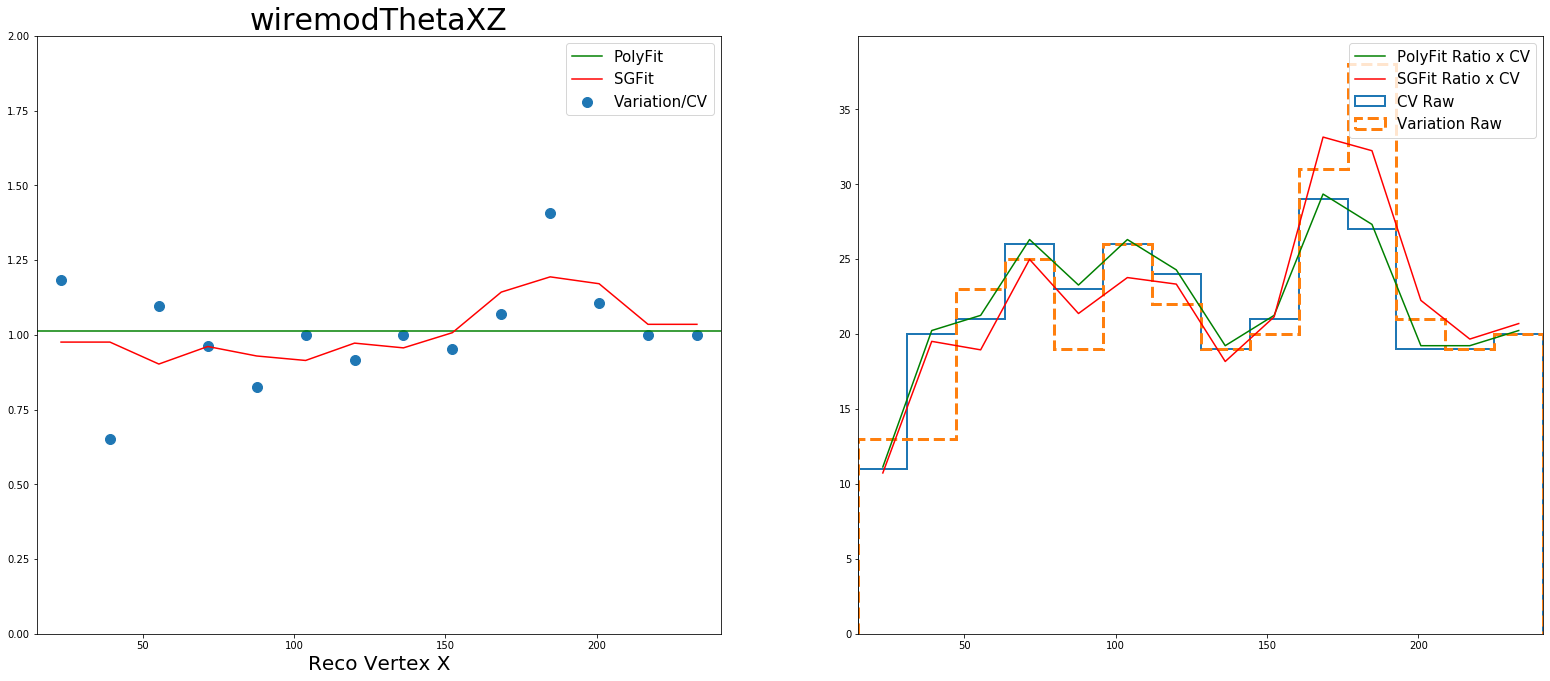

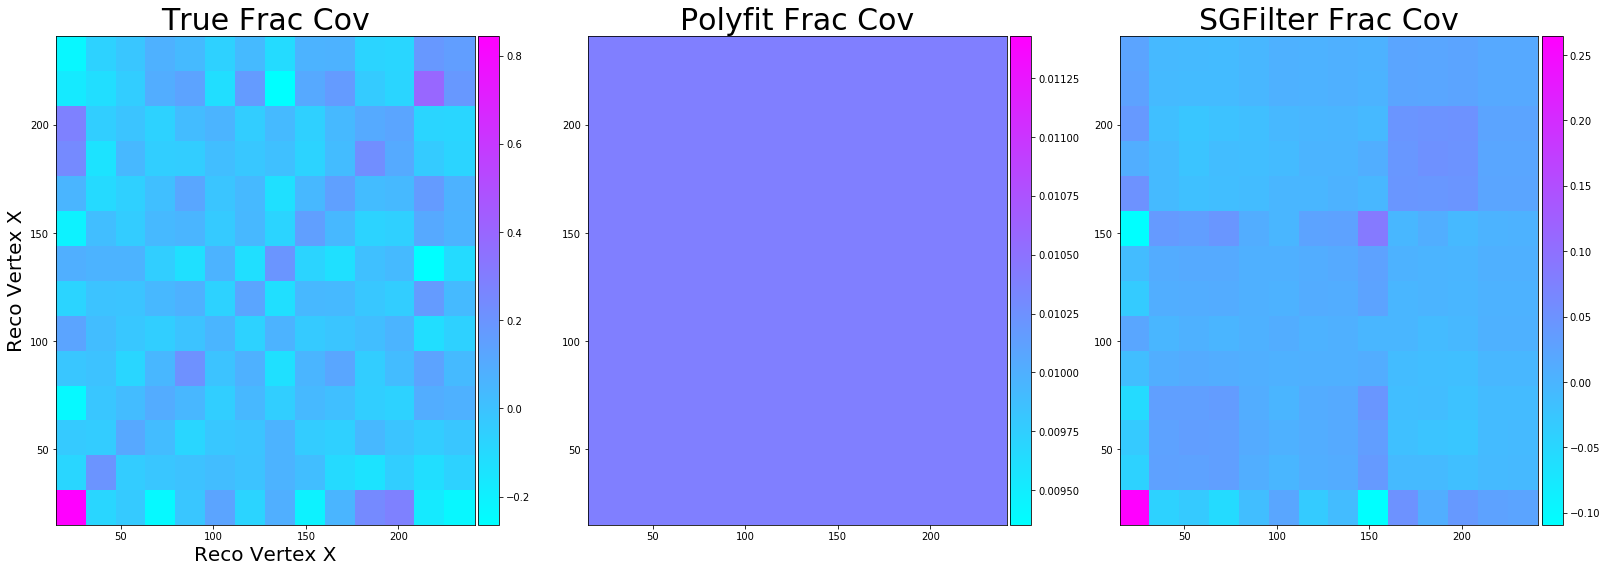

In [153]:
# The same thing with ratios

dvar = varListSel['Xreco']
nbins = 14
cov_tru = np.zeros((nbins,nbins))
cov_poly = np.zeros((nbins,nbins))
cov_sg = np.zeros((nbins,nbins))
flatsys = 0.0

for sysi in range(len(a_df_sys)):
    print(s_detsyslist[sysi])
    myvardf = a_overlap_sys[sysi].query(s_cuts)
    myvarcv = a_cv_sys[sysi].query(s_cuts_cv)
        
    var_sys = myvardf[dvar.myname]
    var_cv = myvarcv[dvar.myname+'_cv']
          
    hCV,binedges = np.histogram(var_cv,bins=nbins,range=dvar.myrange)
    h0,_ = np.histogram(var_sys,bins=nbins,range=dvar.myrange)
    bincenters = np.diff(binedges)/2 + binedges[:-1]

    truRat = np.true_divide(h0,hCV,out=np.ones_like(bincenters),where=hCV!=0)
      
    # get polyfit degs
    aics = []
    degs = []
    for deg in range(min(nbins-2,int(nbins/2))):
        params = deg + 1
        polyRat = np.polyfit(bincenters, truRat, deg)
        fRat = np.poly1d(polyRat)
    
        # now calculate chi2 for fit
        yerr_rat = np.true_divide(np.sqrt(fRat(bincenters)*hCV),hCV,out=np.zeros_like(bincenters),where=hCV!=0)
        chi2_fit = np.power(np.true_divide(fRat(bincenters)-truRat,yerr_rat),2).sum()
        aic = chi2_fit + 2*params + 2*params*(params+1)/float(nbins-params-1)
        aics.append(aic)
        degs.append(deg)
      
    polyterms = degs[np.argmin(aics)]
    print('polyfit degrees:',polyterms,aics[np.argmin(aics)])  
    polyRat = np.polyfit(bincenters, np.true_divide(h0,hCV,where=hCV!=0), polyterms)
    fRat = np.poly1d(polyRat) 
    h0_fit = fRat(bincenters)*hCV
    
    # get sg degs
    aics = []
    degs = []
    wls = []
    for window_length in range(1,nbins-1,2):
        for deg in range(window_length):   
            params = deg + 1
            sgRat = signal.savgol_filter(np.true_divide(h0,hCV,where=hCV!=0), window_length, deg)
            
            # now calculate chi2 for fit
            yerr_rat = np.true_divide(np.sqrt(sgRat*hCV),hCV,out=np.zeros_like(bincenters),where=hCV!=0)
             
            chi2_fit = np.power(np.true_divide(fRat(bincenters)-truRat,yerr_rat,out=np.zeros_like(bincenters),where=yerr_rat!=0),2).sum()
            aic = chi2_fit + 2*params + 2*params*(params+1)/float(nbins-params-1)
            aics.append(aic)
            degs.append(deg)
            wls.append(window_length)
           
    #Savitsky Golay
    window_length = wls[np.argmin(aics)]
    little_poly_t = degs[np.argmin(aics)]
    print('sg window_length',window_length,'degrees:',deg,aics[np.argmin(aics)])
    sgRat = signal.savgol_filter(np.true_divide(h0,hCV,where=hCV!=0), window_length, little_poly_t)
    h0_sgfit = sgRat*hCV
        
    fig,ax = plt.subplots(figsize=(27,11))    
    gs = gridspec.GridSpec(1, 2)
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])
    
    dvarLinspace = np.linspace(dvar.myrange[0],dvar.myrange[1],40)
    ax0.scatter(bincenters,np.true_divide(h0,hCV,where=hCV!=0),label='Variation/CV',s=100)
    ax0.plot(dvarLinspace,fRat(dvarLinspace),label='PolyFit',color='green')
    ax0.plot(bincenters,sgRat,label='SGFit',color='red')
    
    ax0.set_title(s_detsyslist[sysi],fontsize=30)
    ax0.set_xlabel(dvar.mylabel,fontsize=20)
    ax0.legend(fontsize=15)
    
    ax1.hist(var_cv,nbins,range=dvar.myrange,histtype='step',linewidth=2,label='CV Raw')
    ax1.hist(var_sys,nbins,range=dvar.myrange,histtype='step',linewidth=3,linestyle='--',label='Variation Raw')
    ax1.plot(bincenters,h0_fit,label='PolyFit Ratio x CV',c='green')
    ax1.plot(bincenters,h0_sgfit,label='SGFit Ratio x CV',c='red')
    ax1.legend(fontsize=15)
    ax1.set_xlim(dvar.myrange)
    
    for i in range(nbins):
        for j in range(nbins):
            cov_tru[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(hCV[i]*hCV[j])
            cov_poly[i][j] += (h0_fit[i]-hCV[i])*(h0_fit[j]-hCV[j])/(hCV[i]*hCV[j])
            cov_sg[i][j] += (h0_sgfit[i]-hCV[i])*(h0_sgfit[j]-hCV[j])/(hCV[i]*hCV[j])
    flatsys += np.power(h0.sum()-hCV.sum(),2)/float(h0.sum()*hCV.sum())
    
    ax0.set_xlim(dvar.myrange)
    ax0.set_ylim(0,2)
    
fig,ax = plt.subplots(figsize=(27,9))
gs = gridspec.GridSpec(1, 3)
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])

X, Y = np.meshgrid(binedges,binedges)

crat_tru = ax0.pcolormesh(X, Y,cov_tru,cmap='cool')#,vmin=-2,vmax=3)
crat_poly = ax1.pcolormesh(X, Y,cov_poly,cmap='cool')#,vmin=-2,vmax=3)
crat_sg = ax2.pcolormesh(X, Y,cov_sg,cmap='cool')#,vmin=-2,vmax=3)

divider0 = make_axes_locatable(ax0)
divider1 = make_axes_locatable(ax1)
divider2 = make_axes_locatable(ax2)

cax0 = divider0.append_axes('right', size='5%', pad=0.05)
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
cax2 = divider2.append_axes('right', size='5%', pad=0.05)

cbar = fig.colorbar(crat_tru,cax0)
cbar = fig.colorbar(crat_poly,cax1)
cbar = fig.colorbar(crat_sg,cax2)

ax0.set_title('True Frac Cov',fontsize=30)
ax1.set_title('Polyfit Frac Cov',fontsize=30)
ax2.set_title('SGFilter Frac Cov',fontsize=30)

ax0.set_ylabel(dvar.mylabel,fontsize=20)
ax0.set_xlabel(dvar.mylabel,fontsize=20)

print('flat sys:',np.sqrt(flatsys),flatsys)
np.savetxt('/home/dcianci/Downloads/detsys_%s_nom_cov.csv'%dvar.myname,cov_tru,delimiter=',')
np.savetxt('/home/dcianci/Downloads/detsys_%s_polyfit_cov.csv'%dvar.myname,cov_poly,delimiter=',')
np.savetxt('/home/dcianci/Downloads/detsys_%s_sg_cov.csv'%dvar.myname,cov_sg,delimiter=',')

cov_flat = np.zeros((nbins,nbins))
for i in range(nbins):
    cov_flat[i][i] = flatsys
np.savetxt('/home/dcianci/Downloads/detsys_%s_flat_cov.csv'%dvar.myname,cov_flat,delimiter=',')


## Let's find a good fit

testneg,testzero: [3.57341932 5.14984534 4.6486157  5.42841363 4.85532075 5.14984534
 5.2443458  4.43228117 4.3200533  5.77898761 5.69336824 4.6486157
 4.43228117 4.3200533 ] [13 27 22 30 24 27 28 20 19 34 33 22 20 19]
degree: 0 chi2: 4.858361287099476 AIC: 7.191694620432809
testneg,testzero: [3.58460323 5.16348664 4.65869297 5.43756843 4.86117103 5.1535693
 5.24561031 4.43121234 4.31692725 5.77201615 5.68375055 4.63851669
 4.42050956 4.30649029] [13 27 22 30 24 27 28 20 19 34 33 22 20 19]
degree: 1 chi2: 4.85521127016807 AIC: 9.94612036107716
testneg,testzero: [3.5606019  5.14488139 4.6538984  5.44316405 4.87367964 5.17214315
 5.2672318  4.44949474 4.33253077 5.7869404  5.6896391  4.63370125
 4.40441123 4.27729037] [13 27 22 30 24 27 28 20 19 34 33 22 20 19]
degree: 2 chi2: 4.8453018282503555 AIC: 13.245301828250357
testneg,testzero: [3.59961408 5.14921655 4.6303984  5.4024315  4.83840441 5.14579844
 5.25763767 4.45759211 4.35454975 5.82872384 5.7321843  4.6571843
 4.40065667 4.229296

/home/dcianci/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/dcianci/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/dcianci/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/dcianci/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


(0, 2)

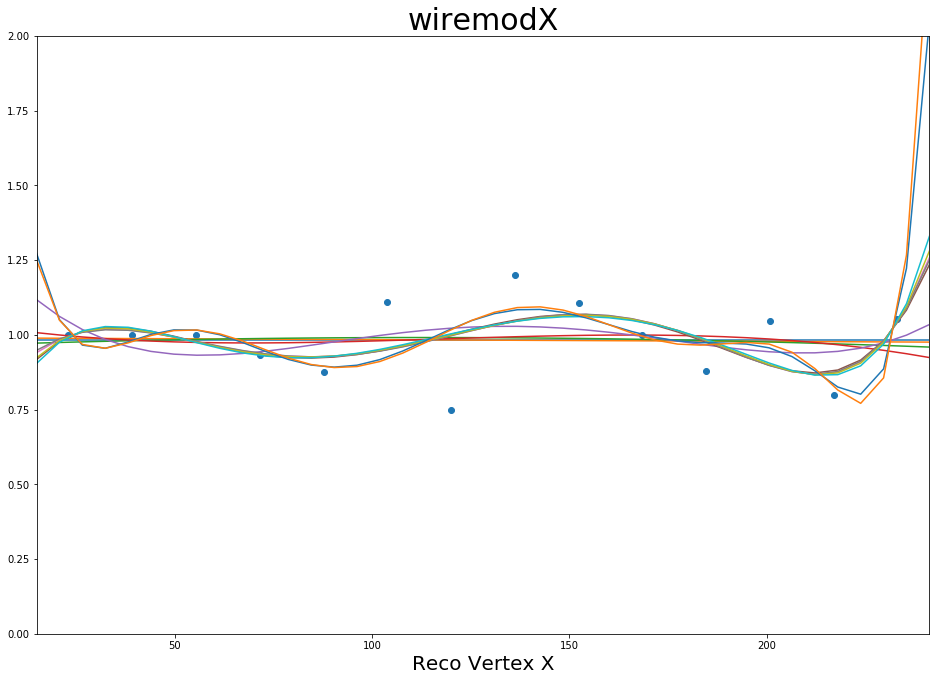

In [117]:
# The same thing with ratios

dvar = varListSel['Xreco']
nbins = 14
cov = np.zeros((nbins,nbins))
flatsys = 0.0

sysi = 0

myvardf = a_overlap_sys[sysi].query(s_cuts)
myvarcv = a_cv_sys[sysi].query(s_cuts_cv)
        
var_sys = myvardf[dvar.myname]
var_cv = myvarcv[dvar.myname+'_cv']
          
hCV,binedges = np.histogram(var_cv,bins=nbins,range=dvar.myrange)
h0,_ = np.histogram(var_sys,bins=nbins,range=dvar.myrange)
bincenters = np.diff(binedges)/2 + binedges[:-1]
truRat = np.true_divide(h0,hCV)

fig,ax = plt.subplots(figsize=(16,11))    
dvarLinspace = np.linspace(dvar.myrange[0],dvar.myrange[1],40)
plt.scatter(bincenters,np.true_divide(h0,hCV),label='Variation/CV')

# polyfit
aics = []
degs = []
for deg in range(nbins-2):
        
    params = deg + 1
    polyRat = np.polyfit(bincenters, truRat, deg)
    fRat = np.poly1d(polyRat)
    h0_fit = fRat(bincenters)*hCV
    
    # now calculate chi2 for fit
    print('testneg,testzero:',np.sqrt(h0_fit),hCV)
    yerr_rat = np.true_divide(np.sqrt(h0_fit),hCV)
    chi2_fit = np.power(np.true_divide(fRat(bincenters)-truRat,yerr_rat),2).sum()
    aic = chi2_fit + 2*params + 2*params*(params+1)/float(nbins-params-1)
    print('degree:',deg,'chi2:',chi2_fit,'AIC:',aic)
    plt.plot(dvarLinspace,fRat(dvarLinspace),label='PolyFit (%i)'%polyterms)
    aics.append(aic)
    degs.append(deg)
    

print(degs[np.argmin(aics)])

ax.set_title(s_detsyslist[sysi],fontsize=30)
ax.set_xlabel(dvar.mylabel,fontsize=20)
#ax.legend(fontsize=15)
      
ax.set_xlim(dvar.myrange)
ax.set_ylim(0,2)


window_length 1 degree: 0 chi2: 9.263592560412054 AIC: 11.596925893745388
window_length 3 degree: 0 chi2: 8.873041047947478 AIC: 11.206374381280812
window_length 3 degree: 1 chi2: 8.625229458693235 AIC: 13.716138549602327
window_length 3 degree: 2 chi2: 9.26359256041205 AIC: 17.66359256041205
window_length 5 degree: 0 chi2: 8.878586485910798 AIC: 11.211919819244132
window_length 5 degree: 1 chi2: 8.618203262808063 AIC: 13.709112353717153
window_length 5 degree: 2 chi2: 8.762149528124052 AIC: 17.16214952812405
window_length 5 degree: 3 chi2: 8.827626905939193 AIC: 21.272071350383634
window_length 5 degree: 4 chi2: 9.26359256041205 AIC: 26.76359256041205
window_length 7 degree: 0 chi2: 8.958226898628284 AIC: 11.291560231961618
window_length 7 degree: 1 chi2: 8.568924482314452 AIC: 13.659833573223544
window_length 7 degree: 2 chi2: 8.704847251526996 AIC: 17.104847251526994
window_length 7 degree: 3 chi2: 8.82672819886712 AIC: 21.271172643311566
window_length 7 degree: 4 chi2: 8.8252614464

(0, 2)

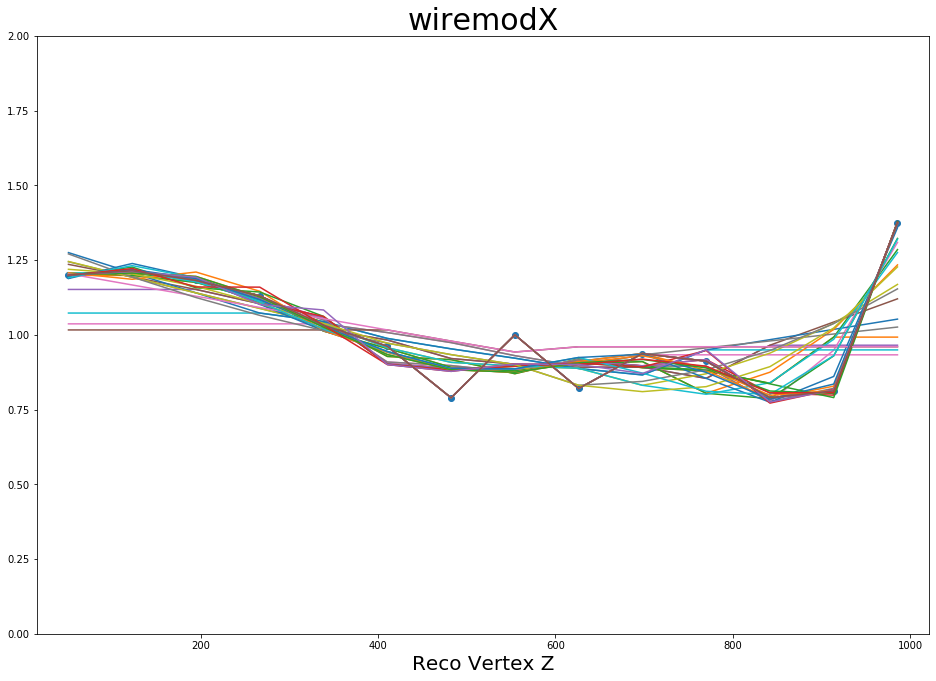

In [77]:
# The same thing with ratios

dvar = varListSel['Zreco']
nbins = 14
cov = np.zeros((nbins,nbins))
flatsys = 0.0

sysi = 0

myvardf = a_overlap_sys[sysi].query(s_cuts)
myvarcv = a_cv_sys[sysi].query(s_cuts_cv)
        
var_sys = myvardf[dvar.myname]
var_cv = myvarcv[dvar.myname+'_cv']
          
hCV,binedges = np.histogram(var_cv,bins=nbins,range=dvar.myrange)
h0,_ = np.histogram(var_sys,bins=nbins,range=dvar.myrange)
bincenters = np.diff(binedges)/2 + binedges[:-1]
truRat = np.true_divide(h0,hCV)

fig,ax = plt.subplots(figsize=(16,11))    
dvarLinspace = np.linspace(dvar.myrange[0],dvar.myrange[1],40)
plt.scatter(bincenters,np.true_divide(h0,hCV),label='Variation/CV')

# polyfit
for window_length in range(1,nbins-1,2):
    for deg in range(window_length):
        
        params = deg + 1
        sgRat = signal.savgol_filter(np.true_divide(h0,hCV), window_length, deg)
        h0_fit = sgRat*hCV
     
         # now calculate chi2 for fit
        yerr_rat = np.true_divide(np.sqrt(h0_fit),hCV)
        chi2_fit = np.power(np.true_divide(fRat(bincenters)-truRat,yerr_rat),2).sum()
        aic = chi2_fit + 2*params + 2*params*(params+1)/float(nbins-params-1)
        print('window_length',window_length,'degree:',deg,'chi2:',chi2_fit,'AIC:',aic)
        plt.plot(bincenters,sgRat,label='Sigfit (%i)'%polyterms)
    
ax.set_title(s_detsyslist[sysi],fontsize=30)
ax.set_xlabel(dvar.mylabel,fontsize=20)
#ax.legend(fontsize=15)
      
ax.set_xlim(dvar.myrange)
ax.set_ylim(0,2)

In [ ]:


if not os.path.exists(dumphole):
    os.makedirs(dumphole)

for dist in varlistSel:
    
    fig,ax = plt.subplots(figsize=(16,11))
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, .75])
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])
    hSys =  []
    
    for i in range(len(s_detsyslist)):
        var_sys = a_df_sys[i].query(s_cuts)[dist.myname]
        sys_scale = np.ones(len(var_sys))*totalscale/f_scaleslist[i]
        h0,_ = np.histogram(var_sys,range=dist.myrange,bins=dumpbins,weights=sys_scale)
        h1,_,_ = ax0.hist(var_sys,range=dist.myrange,bins=dumpbins,histtype='step',label=s_detsyslist[i]+' (%i)'%h0.sum(),linewidth=2,weights=sys_scale)
        hSys.append(h1)
    
    var_cv = df_cv.query(s_cuts)[dist.myname]
    cv_scale = np.ones(len(var_cv))*totalscale/scaleCV
    h0,_ = np.histogram(var_cv,range=dist.myrange,bins=dumpbins,weights=cv_scale)
    hCV,binedges,_ = ax0.hist(var_cv,range=dist.myrange,bins=dumpbins,histtype='step',label='CV (%i)'%h0.sum(),linewidth=3,color='black',linestyle='--',weights=cv_scale)       
    
    ax0.set_ylabel('Events in 5e19 POT',fontsize=20)
    ax0.set_xlabel(dist.mylabel,fontsize=25)
    ax0.set_title('BNB Overlay w/ Detsys',fontsize=15)
    ax0.set_xlim(dist.myrange)
    ax1.set_xlim(dist.myrange)
    ax1.set_ylim(0,2.5)
    ax0.legend(fontsize=15)
    
    for i in range(len(hSys)):
        ydots = np.true_divide(hSys[i],hCV,where=hCV!=0)
        xdots = binedges[:-1] + (binedges[1]-binedges[0])/float(len(hSys)) * i
        ax1.scatter(xdots,ydots)
    
    ax1.axhline(1,linestyle=':',color='maroon')
    
    for j in range(len(hCV)):
        ax1.axvline(binedges[j+1],linestyle=':',color='gray') 
    
    plt.savefig(dumphole+'/'+dist.myname+'.png')
    plt.close(fig)

## Smearing

In [51]:
dumphole = 'DetSysSmear'
dumpfolder = '../PlotDumps'

dumphole = '%s/%s'%(dumpfolder,dumphole)
if not os.path.exists(dumphole):
    os.makedirs(dumphole)
if not os.path.exists(dumphole):
    os.makedirs(dumphole)

for dist in varlistSel:

    fig,ax = plt.subplots(figsize=(16,11))
    binwidth = (dvar.myrange[1]-dvar.myrange[0])/float(14)
    myrange = (-3*binwidth,3*binwidth)
    nbins = 15

    for sysi in range(len(a_df_sys)):
        myvardf = a_overlap_sys[sysi].query(s_cuts)
        myvarcv = a_cv_sys[sysi].query(s_cuts_cv)
        
        var_sys = myvardf[dvar.myname]
        var_cv = myvarcv[dvar.myname+'_cv']
        
        h0,binedges,_ = plt.hist((var_cv-var_sys),bins=nbins,range=myrange,histtype='step',label=s_detsyslist[sysi],linewidth=3) 
    
    ax.axvline(binwidth,label='+1 Binwidth',linestyle=':')
    ax.axvline(-binwidth,label='-1 Binwidth',linestyle=':')
    ax.set_title('(CV - Detsys)',fontsize=30)
    ax.set_xlabel(r'$\Delta$'+dvar.mylabel,fontsize=20)
    ax.legend(fontsize=25)
    plt.savefig(dumphole+'/'+dvar.myname+'.png')
    plt.close(fig)
    

NameError: name 'varlistSel' is not defined

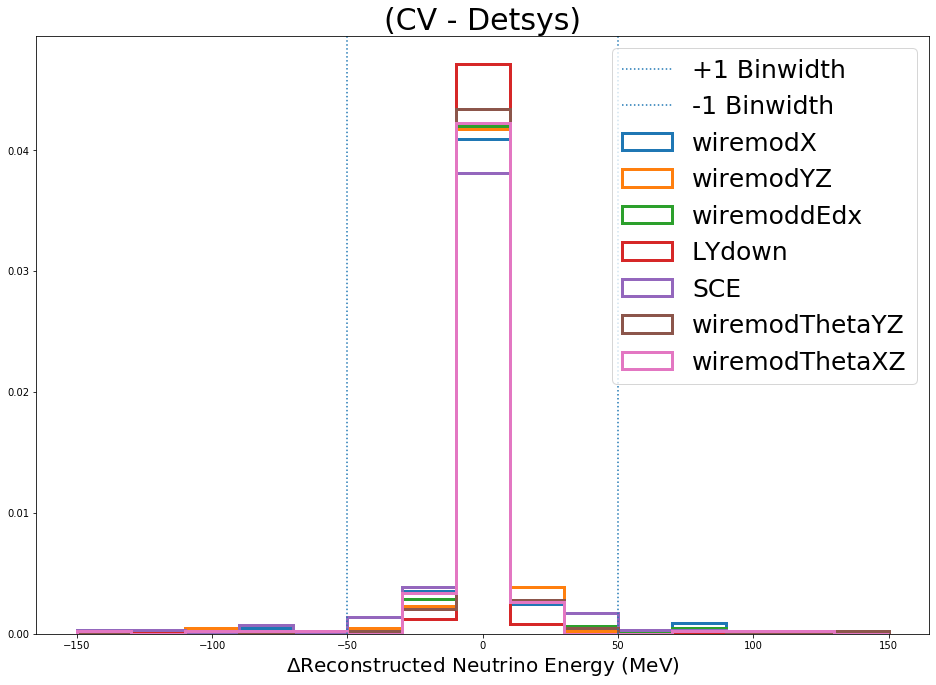

In [150]:
dvar = varListSel['Enu_1m1p']

fig,ax = plt.subplots(figsize=(16,11))
binwidth = (dvar.myrange[1]-dvar.myrange[0])/float(14)
myrange = (-3*binwidth,3*binwidth)
nbins = 15

for sysi in range(len(a_df_sys)):
    myvardf = a_overlap_sys[sysi].query(s_cuts)
    myvarcv = a_cv_sys[sysi].query(s_cuts_cv)
        
    var_sys = myvardf[dvar.myname]
    var_cv = myvarcv[dvar.myname+'_cv']
        
    h0,binedges,_ = plt.hist((var_cv-var_sys),bins=nbins,range=myrange,histtype='step',label=s_detsyslist[sysi],linewidth=3,density=1) 
    
ax.axvline(binwidth,label='+1 Binwidth',linestyle=':')
ax.axvline(-binwidth,label='-1 Binwidth',linestyle=':')
ax.set_title('(CV - Detsys)',fontsize=30)
ax.set_xlabel(r'$\Delta$'+dvar.mylabel,fontsize=20)
ax.legend(fontsize=25)

## Extras

In [83]:
dumpbins = 18
dumphole = '/home/dcianci/Downloads/detsys_may18_presel' # where are we dumping these?

if not os.path.exists(dumphole):
    os.makedirs(dumphole)

for dist in varlistSel:
    
    fig,ax = plt.subplots(figsize=(16,11))
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, .75])
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])
    hSys =  []
    
    for i in range(len(s_detsyslist)):
        var_sys = a_df_sys[i][dist.myname]
        sys_scale = np.ones(len(var_sys))*totalscale/f_scaleslist[i]
        h0,_ = np.histogram(var_sys,range=dist.myrange,bins=dumpbins,weights=sys_scale)
        h1,_,_ = ax0.hist(var_sys,range=dist.myrange,bins=dumpbins,histtype='step',label=s_detsyslist[i]+' (%.4f)'%h0.sum(),linewidth=2,weights=sys_scale)
        hSys.append(h1)
    
    var_cv = df_cv[dist.myname]
    cv_scale = np.ones(len(var_cv))*totalscale/scaleCV
    h0,_ = np.histogram(var_cv,range=dist.myrange,bins=dumpbins,weights=cv_scale)
    hCV,binedges,_ = ax0.hist(var_cv,range=dist.myrange,bins=dumpbins,histtype='step',label='CV (%.4f)'%h0.sum(),linewidth=3,color='black',linestyle='--',weights=cv_scale)
    
    ax0.set_ylabel('Events in 5e19 POT',fontsize=20)
    ax0.set_xlabel(dist.mylabel,fontsize=25)
    ax0.set_title('BNB Overlay w/ Detsys',fontsize=15)
    ax0.set_xlim(dist.myrange)
    ax1.set_xlim(dist.myrange)
    ax0.legend(fontsize=15)
    ax1.set_ylim(0,2.5)
    
    for i in range(len(hSys)):
        ydots = np.true_divide(hSys[i],hCV,where=hCV!=0)
        xdots = binedges[:-1] + (binedges[1]-binedges[0])/float(len(hSys)) * i
        ax1.scatter(xdots,ydots)
    
    ax1.axhline(1,linestyle=':',color='maroon')
    
    for j in range(len(hCV)):
        ax1.axvline(binedges[j+1],linestyle=':',color='gray') 
    
    plt.savefig(dumphole+'/'+dist.myname+'.png')
    plt.close(fig)

/home/dcianci/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dcianci/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
